# Week 9 - Multivariate Analysis, part 2

# 1. Lesson - no lesson this week

# 2. Weekly graph question

The graph below plots the first two principal component scores in a scatter plot.  What can be said about the three outliers in the upper left corner of the graph?  Is their first principal component score high or low?  What about their second principal component score?  What does that mean about their values in series_1, series_2, and series_3?  It seems to me that you can say something about series_3 (what can you say?) but you may have a harder time saying something about series_1 and series_2, and an almost impossible time saying anything about the relative values of series_1 and series_2.  Why is that?  How are series_1 and series_2 related, according to how they were created?  If you like, try drawing a pairplot for all three series and see what you get.

Overall, what are the advantages and disadvantages of the graph below?  Does it show anything interesting?

[0.79916477 0.18990532 0.01092991]
[[ 0.26541493  0.30096233  0.91595665]
 [ 0.60337553  0.6891417  -0.40127506]
 [ 0.75199261 -0.65917023 -0.00131519]]


Text(0, 0.5, 'Second Principal Component Score')

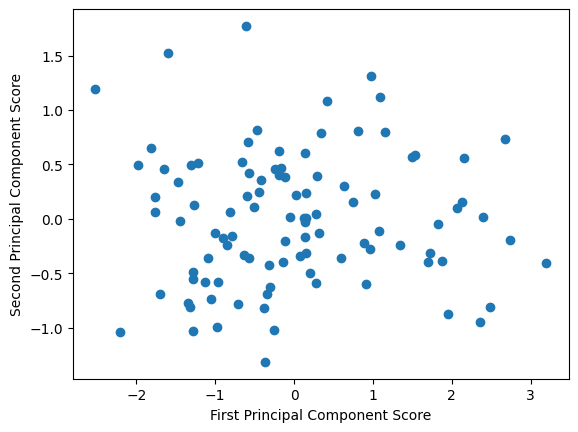

In [1]:
import numpy as np
import pandas as pd
from sklearn import decomposition
import matplotlib.pyplot as plt

np.random.seed(0)
num_points = 100
series_1 = np.random.normal(loc = 2, scale = 0.5, size = num_points)
series_2 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.1, size = num_points))
series_3 = series_1 * (1 + np.random.normal(loc = 0, scale = 0.5, size = num_points))
df = pd.DataFrame({'ser1': series_1, 'ser2': series_2, 'ser3': series_3})
df = df - df.mean() # set mean to zero, so we don't have to subtract mean from the principal component scores

pca3 = decomposition.PCA(n_components = 3)
pca3.fit(df)
print(pca3.explained_variance_ratio_)
print(pca3.components_)

first_principal_component_score = df.dot(pca3.components_[0])
second_principal_component_score = df.dot(pca3.components_[1])
plt.scatter(first_principal_component_score, second_principal_component_score)
plt.xlabel("First Principal Component Score")
plt.ylabel("Second Principal Component Score")

The PCA scatter plot reveals three outliers in the upper left corner, characterized by low scores on the first principal component and high scores on the second. This suggests that these points deviate significantly from the main direction of variance (which is largely driven by the strong correlation between series_1 and series_2) and instead show unusual behavior in series_3. Because series_1 and series_2 were generated to be nearly collinear—series_2 being a noisy version of series_1—they dominate the first principal component, making it difficult to distinguish between them in the PCA plot. The second component, being orthogonal to the first, captures variation mostly attributable to series_3, which explains why the outliers stand out in that direction. A pairplot of the three series confirms the tight relationship between series_1 and series_2 and the broader spread of series_3. Overall, the PCA plot is useful for detecting outliers and understanding variance structure, but it has limitations in interpreting individual variable contributions, especially when variables are highly correlated.

# 3. Working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

Here are some types of analysis you can do:
Draw heatmaps.

Draw bubble plots.

Perform Principal Component Analysis to find out the directions in which the data varies.  Can you represent the data using only its projection onto its first principal component, using the methods described in Week 8?  How much of the variance would this capture?

Try performing linear regression analysis using different sets of features.  Which features seem most likely to be useful to predict other features?

Conclusions:
Explain what conclusions you would draw from this analysis: are the data what you expect? Are the data likely to be usable? If the data are not useable, find some new data!

Do you see any outliers? (Data points that are far from the rest of the data).

Does the Principal Component Analysis suggest a way to represent the data using fewer dimensions than usual - using its first one or two principal component scores, perhaps?

Try using your correlation information from previous weeks to help choose features for linear regression.

# 4. Storytelling With Data plot

Reproduce any graph of your choice in p. 136-150 of the Storytelling With Data book as best you can. ("The power of super-categories" to the end of chapter 5). You do not have to get the exact data values right, just the overall look and feel.

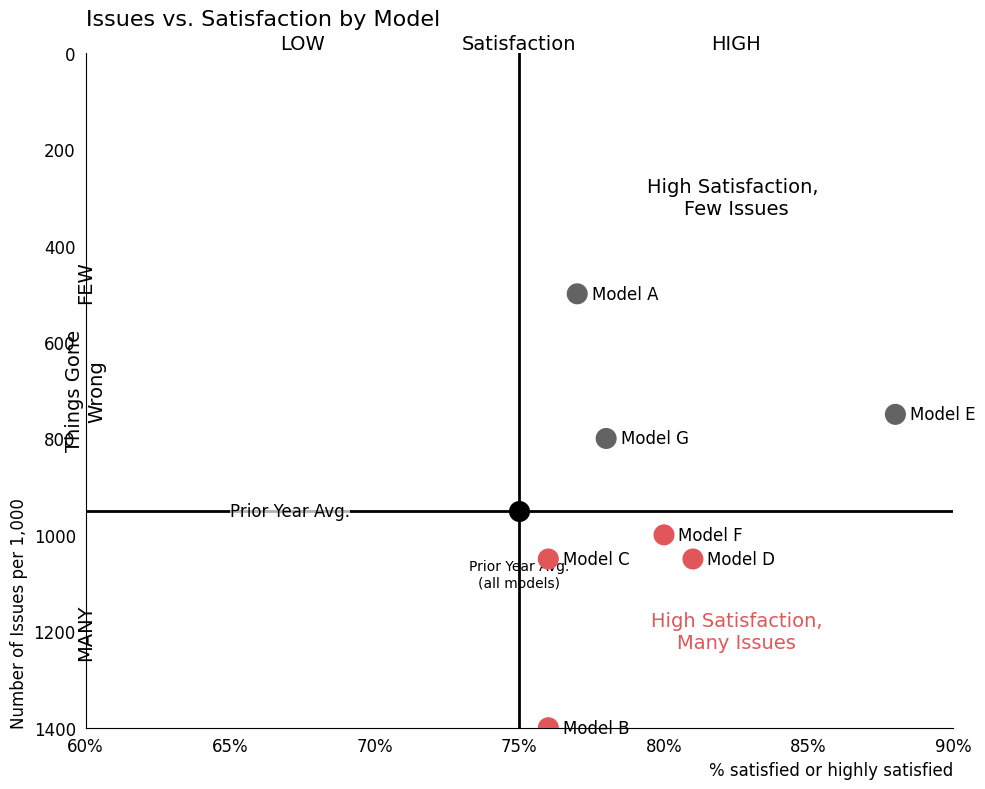

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = {
    'Model': ['Model A', 'Model B', 'Model C', 'Model D', 'Model E', 'Model F', 'Model G'],
    'Satisfaction': [0.77, 0.76, 0.76, 0.81, 0.88, 0.80, 0.78],  # As a percentage (e.g., 77% -> 0.77)
    'Issues': [500, 1400, 1050, 1050, 750, 1000, 800],
    'Color': ['#636363', '#e15759', '#e15759', '#e15759', '#636363', '#e15759', '#636363']
}

df = pd.DataFrame(data)

prior_avg_x = 0.75
prior_avg_y = 950

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(df['Satisfaction'], df['Issues'], color=df['Color'], s=200, zorder=5)

ax.scatter(prior_avg_x, prior_avg_y, color='black', s=200, zorder=5)

ax.axvline(x=prior_avg_x, color='black', linestyle='-', linewidth=2)
ax.axhline(y=prior_avg_y, color='black', linestyle='-', linewidth=2)

ax.invert_yaxis()

ax.set_xlim(0.60, 0.90)
ax.set_ylim(1400, 0)
ax.set_xticks(np.arange(0.60, 0.91, 0.05))
ax.set_xticklabels([f'{int(x*100)}%' for x in np.arange(0.60, 0.91, 0.05)], fontsize=12)
ax.set_yticks(np.arange(0, 1401, 200))
ax.set_yticklabels([f'{int(y)}' for y in np.arange(0, 1401, 200)], fontsize=12)

ax.set_xlabel('% satisfied or highly satisfied', fontsize=12, loc='right')
ax.set_ylabel('Number of Issues per 1,000', fontsize=12, loc='bottom')
ax.set_title('Issues vs. Satisfaction by Model', fontsize=16, loc='left', pad=20)

ax.text(0.675, 0, 'LOW', fontsize=14, ha='center', va='bottom')
ax.text(0.825, 0, 'HIGH', fontsize=14, ha='center', va='bottom')
ax.text(0.825, 300, 'High Satisfaction, \nFew Issues', fontsize=14, color='black', ha='center', va='center')
ax.text(0.825, 1200, 'High Satisfaction,\nMany Issues', fontsize=14, color='#e15759', ha='center', va='center')
ax.text(0.65, 950, 'Prior Year Avg.', fontsize=12, color='black', ha='left', va='center',
        bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='square,pad=0'))

for i in range(len(df)):
    ax.text(df['Satisfaction'][i] + 0.005, df['Issues'][i], df['Model'][i],
            horizontalalignment='left', verticalalignment='center', fontsize=12, color='black')

ax.text(prior_avg_x, prior_avg_y + 100, 'Prior Year Avg.\n(all models)',
        horizontalalignment='center', verticalalignment='top', fontsize=10, color='black')

ax.text(0.60, 475, 'FEW', rotation=90, ha='center', va='center', fontsize=14)
ax.text(0.60, 1200, 'MANY', rotation=90, ha='center', va='center', fontsize=14)
ax.text(0.75, 0, 'Satisfaction', ha='center', va='bottom', fontsize=14)
ax.text(0.60, 700, 'Things Gone\nWrong', ha='center', va='center', fontsize=14, rotation=90, transform=ax.transData)

ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=True)
ax.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

# Project Dataset Work

### Reusable Functions

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from itertools import combinations
from scipy.stats import zscore


def analyze_dataset(df, dataset_name):
    print(f"Analyzing dataset: {dataset_name}")     

    # Separate numeric and categorical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

    # Handle missing values for numeric columns
    cols_with_na = [col for col in numeric_cols if df[col].isna().any()]
    if cols_with_na:
        imputer = SimpleImputer(strategy='mean')
        imputed_array = imputer.fit_transform(df[cols_with_na])
        imputed_df = pd.DataFrame(imputed_array, columns=cols_with_na, index=df.index)
        for col in cols_with_na:
            df[col] = imputed_df[col]

    # PCA
    pca = PCA(n_components=min(3, len(numeric_cols)))
    pca_result = pca.fit(df[numeric_cols])
    pc1_scores = pca.transform(df[numeric_cols])[:, 0]

    print("Explained variance ratio:", pca_result.explained_variance_ratio_)
    print("Principal component vectors:\n", pca_result.components_)

    # Plot histogram of projection onto first principal component
    plt.figure(figsize=(8, 6))
    plt.hist(pc1_scores, bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Projection onto First Principal Component - {dataset_name}')
    plt.xlabel('PC1 Score')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Linear regression for each numeric feature
    r2_scores = {}
    for target in numeric_cols:
        features = [col for col in numeric_cols if col != target]
        if features:
            model = LinearRegression()
            model.fit(df[features], df[target])
            r2_scores[target] = model.score(df[features], df[target])
    sorted_r2 = dict(sorted(r2_scores.items(), key=lambda item: item[1], reverse=True))
    print("R² scores for predicting each numeric feature from others:")
    for k, v in sorted_r2.items():
        print(f"{k}: {v:.4f}")

    # Outlier detection using z-score
    z_scores = np.abs(zscore(df[numeric_cols]))
    outliers = (z_scores > 3).any(axis=1)
    print(f"Number of outliers detected (z-score > 3): {outliers.sum()}")

    # Summary
    print(f"\nSummary for {dataset_name}:")
    print(f"Numeric columns: {len(numeric_cols)}")
    print(f"Categorical columns: {len(categorical_cols)}")
    if sorted_r2:
        print(f"Top R² prediction: {next(iter(sorted_r2))} with R² = {next(iter(sorted_r2.values())):.4f}")
    print(f"First principal component explains {pca_result.explained_variance_ratio_[0]:.2%} of the variance.")




def safe_impute_numeric(df):
    # Identify numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Identify numeric columns with missing values
    cols_with_na = [col for col in numeric_cols if df[col].isna().any()]
    print("Number of numeric columns with missing values:", len(cols_with_na))

    # Exclude columns that are entirely NaN
    cols_with_valid_data = [col for col in cols_with_na if df[col].notna().any()]
    print("Number of columns with at least one non-NaN value:", len(cols_with_valid_data))

    # Impute only columns with at least one non-NaN value
    imputer = SimpleImputer(strategy='mean')
    imputed_array = imputer.fit_transform(df[cols_with_valid_data])
    print("Shape of imputed array:", imputed_array.shape)

    # Assign imputed values back to the DataFrame
    for i, col in enumerate(cols_with_valid_data):
        df[col] = imputed_array[:, i]

    return df


def generate_top_binned_bubble_plots(df, target_variable, bin_method="quantile", bins=5, top_n=20, unique_threshold=10):
    # Select numeric columns excluding the target
    numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(target_variable, errors='ignore')
    
    # Compute correlation with target variable
    correlations = df[numeric_cols].corrwith(df[target_variable]).abs().sort_values(ascending=False)
    top_features = correlations.head(top_n).index.tolist()

    # Generate all unique feature pairs
    feature_pairs = list(combinations(top_features, 2))

    for x_feature, y_feature in feature_pairs:
        temp_df = df[[x_feature, y_feature, target_variable]].dropna()

        # Determine if binning is needed
        def bin_feature(feature):
            if temp_df[feature].nunique() < unique_threshold:
                return temp_df[feature].astype(str)
            if bin_method == "quantile":
                binned = pd.qcut(temp_df[feature], bins, duplicates='drop')
            else:
                binned = pd.cut(temp_df[feature], bins)
            # Format bin labels with comma separators
            binned = binned.map(lambda x: f"{int(x.left):,} to {int(x.right):,}" if pd.notnull(x) else "NaN")
            return binned

        temp_df['x_binned'] = bin_feature(x_feature)
        temp_df['y_binned'] = bin_feature(y_feature)

        # Group by binned values and compute mean target
        grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
        grouped['size'] = grouped[target_variable]

        # Sort bin labels numerically
        def sort_bins(bin_labels):
            def extract_left_edge(label):
                try:
                    return int(label.split(' to ')[0].replace(',', ''))
                except:
                    return float('inf')
            return sorted(bin_labels, key=extract_left_edge)

        x_order = sort_bins(grouped['x_binned'].unique())
        y_order = sort_bins(grouped['y_binned'].unique())

        # Plot
        plt.figure(figsize=(8, 6))
        sns.scatterplot(
            data=grouped,
            x='x_binned',
            y='y_binned',
            size='size',
            sizes=(20, 300),
            legend=False,
            alpha=0.6
        )
        plt.title(f'Bubble Plot: {x_feature} vs {y_feature} (Bubble size = {target_variable})')
        plt.xlabel(x_feature)
        plt.ylabel(y_feature)
        plt.xticks(rotation=45)
        plt.gca().set_xticklabels(x_order, rotation=45)
        plt.gca().set_yticklabels(y_order)
        plt.tight_layout()
        plt.show()




def plot_top_correlated_heatmap(df, target_variable, top_n=20):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include='number')

    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()

    # Get absolute correlations with the target variable
    target_corr = corr_matrix[target_variable].abs().sort_values(ascending=False)

    # Get top correlated features including the target variable
    top_vars = target_corr.head(top_n).index.tolist()

    # Ensure target variable is first in the list
    top_vars = [target_variable] + [var for var in top_vars if var != target_variable]

    # Subset the correlation matrix to top variables
    top_corr_matrix = corr_matrix.loc[top_vars, top_vars]

    # Print top correlated features with the target variable
    print(f"Top {top_n} features most correlated with '{target_variable}':")
    for feature in top_vars[1:]:
        print(f"{feature}: {target_corr[feature]:.4f}")

    # Plot the heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title(f"Top {top_n} Most Correlated Variables with '{target_variable}' Heatmap")
    plt.tight_layout()
    plt.show()







def backward_selection(data, target_variable):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=[np.number]).dropna()
    
    # Ensure the target variable is in the dataset
    if target_variable not in numeric_data.columns:
        raise ValueError(f"Target variable '{target_variable}' not found in numeric columns.")
    
    # Separate features and target
    X = numeric_data.drop(columns=[target_variable])
    y = numeric_data[target_variable]
    
    # Initialize variables
    remaining_features = list(X.columns)
    best_r2 = -np.inf
    best_features = remaining_features.copy()
    history = []

    while len(remaining_features) > 1:
        r2_scores = {}
        for feature in remaining_features:
            trial_features = [f for f in remaining_features if f != feature]
            model = LinearRegression().fit(X[trial_features], y)
            r2 = r2_score(y, model.predict(X[trial_features]))
            r2_scores[feature] = r2
        
        # Find the feature whose removal gives the highest R^2
        worst_feature = min(r2_scores, key=r2_scores.get)
        max_r2 = r2_scores[worst_feature]

        # If R^2 improves, remove the feature
        if max_r2 > best_r2:
            best_r2 = max_r2
            remaining_features.remove(worst_feature)
            best_features = remaining_features.copy()
            history.append((worst_feature, max_r2))
        else:
            break

    # Final model
    final_model = LinearRegression().fit(X[best_features], y)
    final_r2 = r2_score(y, final_model.predict(X[best_features]))

    return {
        "selected_features": best_features,
        "final_r2": final_r2,
        "removal_history": history
    }



## Priceline Dataset

Analyzing dataset: Priceline Dataset
Explained variance ratio: [0.59610385 0.31660697 0.06635799]
Principal component vectors:
 [[ 4.81955976e-01  5.53096352e-02  2.63532884e-02  4.15425642e-04
   2.81791352e-04  8.74050647e-01]
 [ 8.19218106e-01  3.19314405e-01  5.21263806e-02  1.07265916e-03
   2.07115367e-04 -4.73499370e-01]
 [-2.97269233e-01  9.41540614e-01 -1.16115982e-01 -4.45905922e-03
  -5.40009022e-04  1.07838669e-01]]


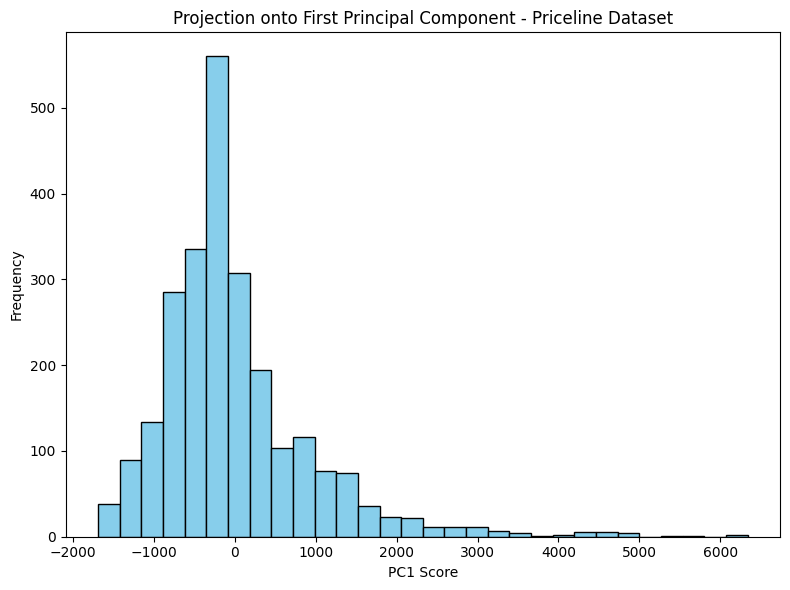

R² scores for predicting each numeric feature from others:
travel_time_minutes: 0.6096
stops: 0.4847
1st_stop_wait_minutes: 0.3545
ticket_price_usd: 0.1557
2nd_stop_wait_minutes: 0.1203
3rd_stop_wait_minutes: 0.0049
Number of outliers detected (z-score > 3): 147

Summary for Priceline Dataset:
Numeric columns: 6
Categorical columns: 7
Top R² prediction: travel_time_minutes with R² = 0.6096
First principal component explains 59.61% of the variance.


In [12]:
df1 = pd.read_csv("priceline_clean_no_encode.csv")
analyze_dataset(df1, "Priceline Dataset")

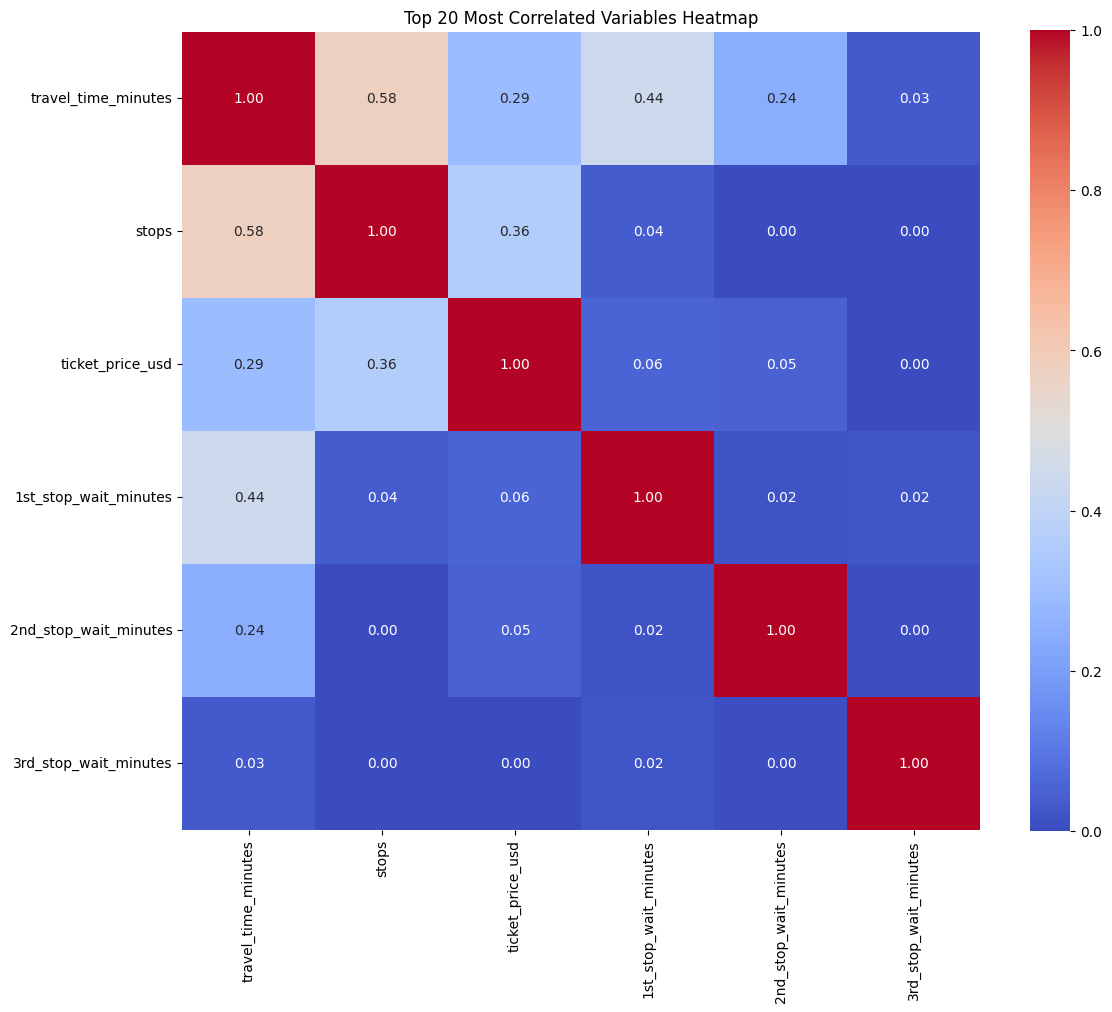

In [12]:
plot_top_correlated_heatmap(df1, 20)

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


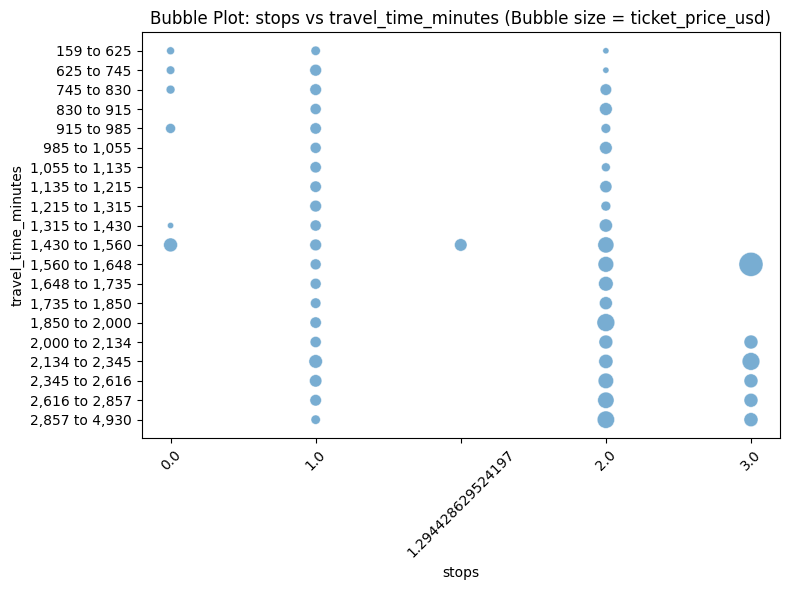

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


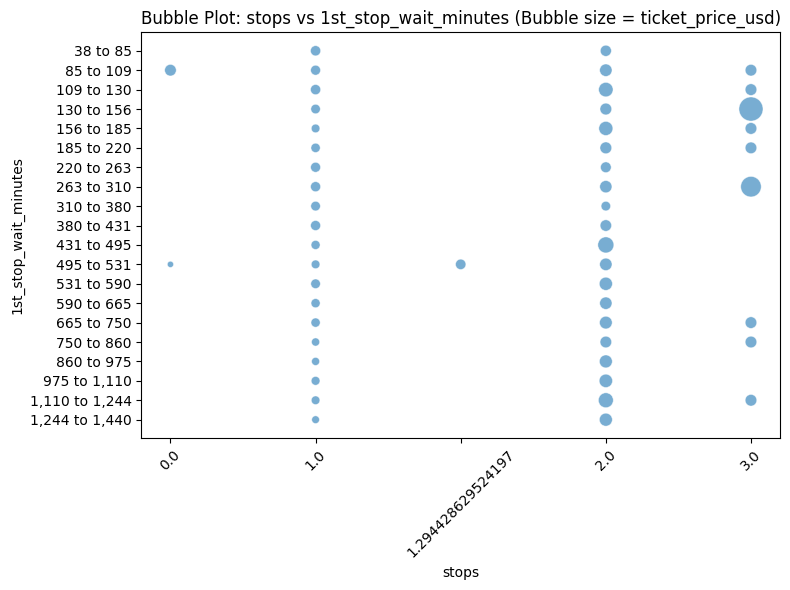

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


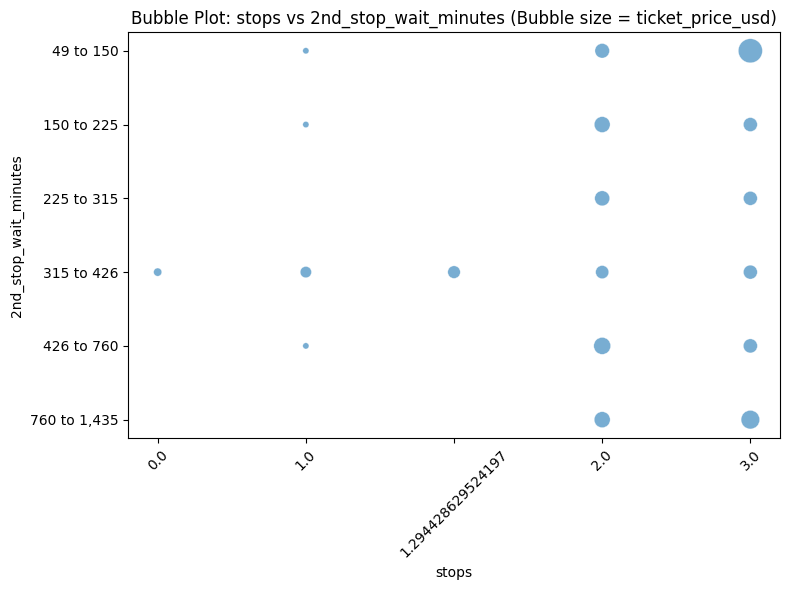

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


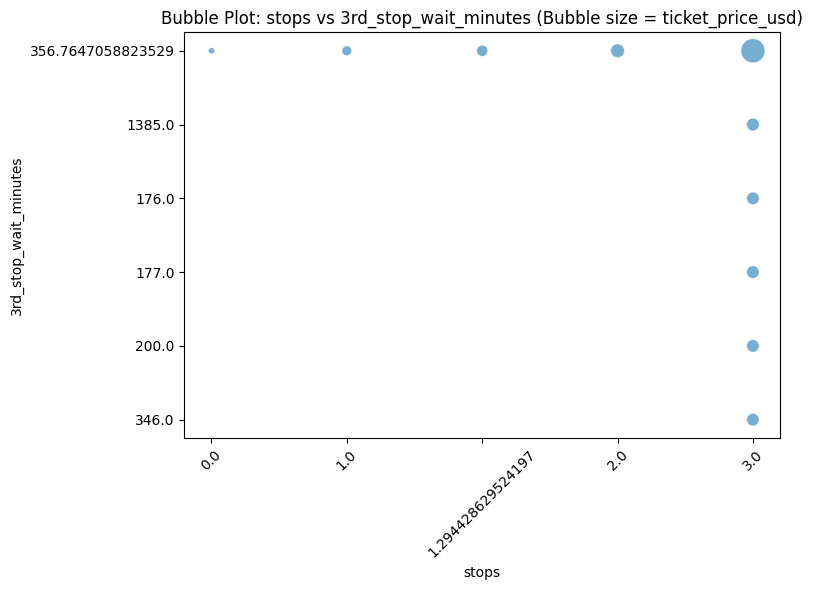

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


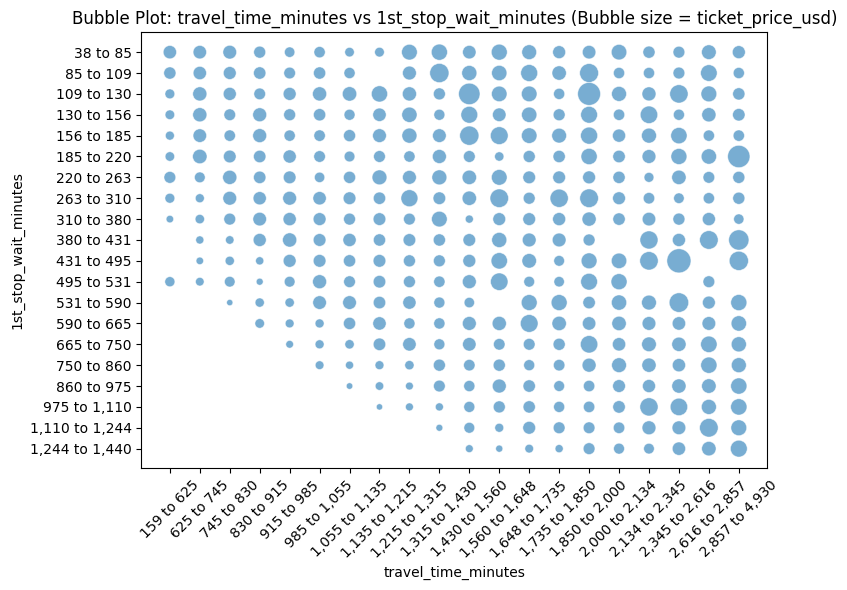

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


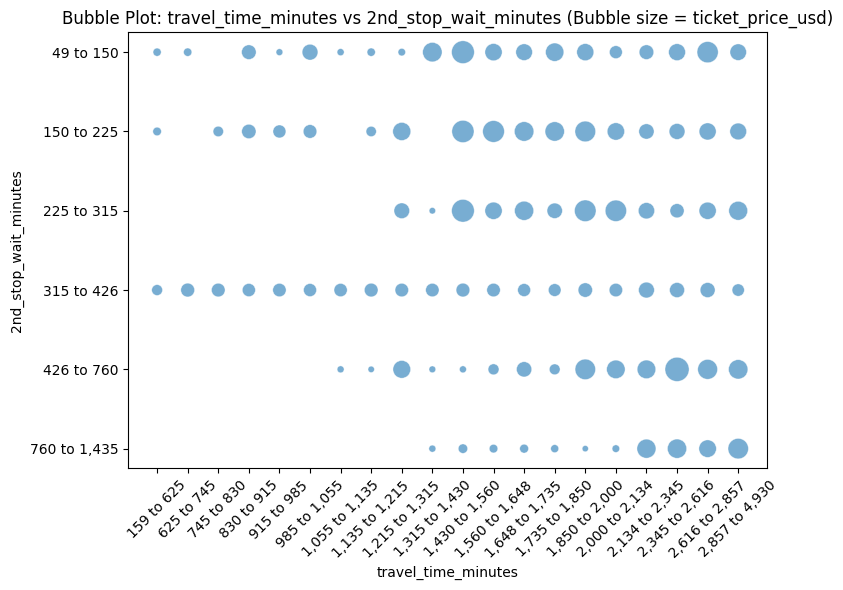

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


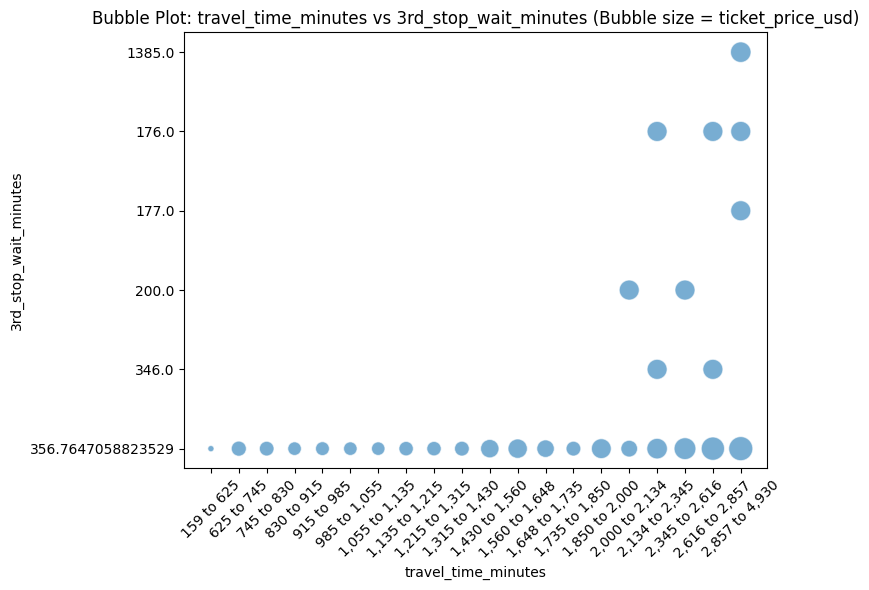

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


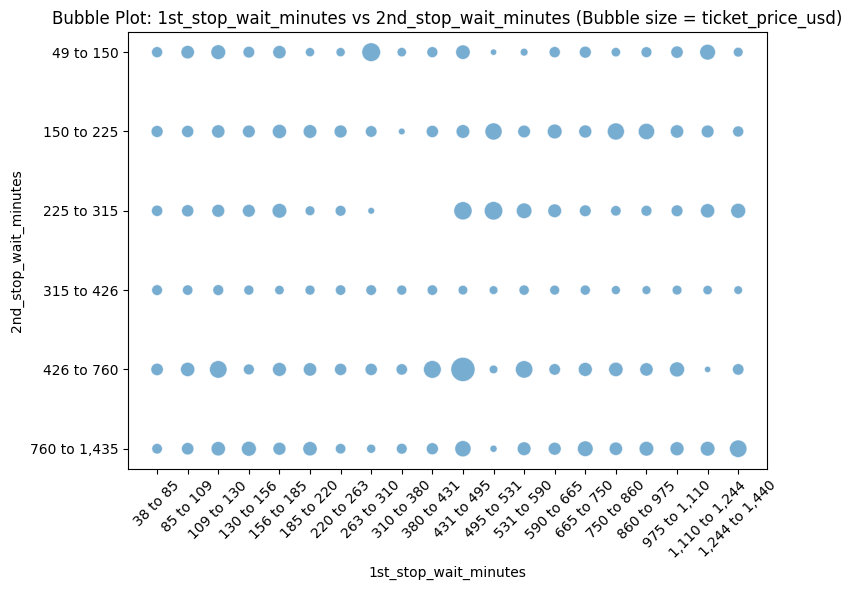

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


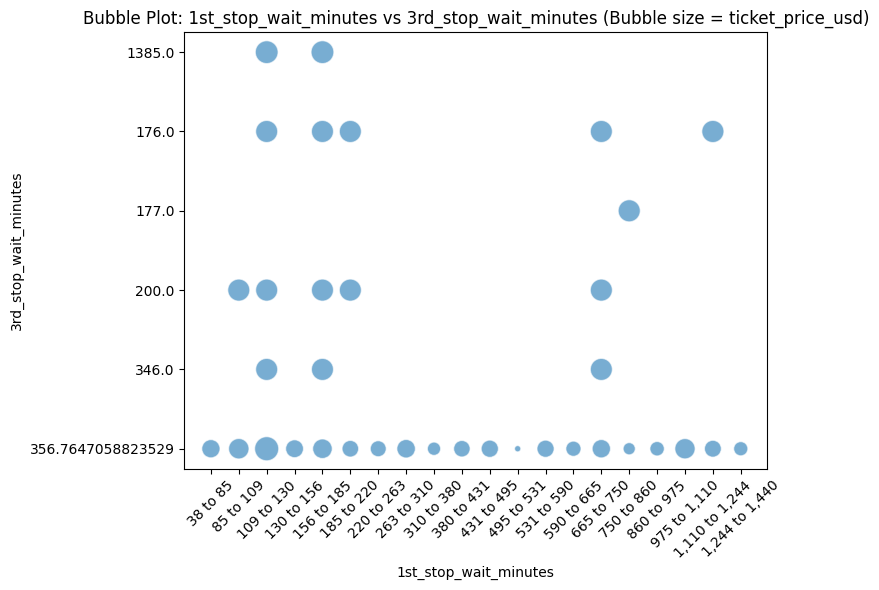

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


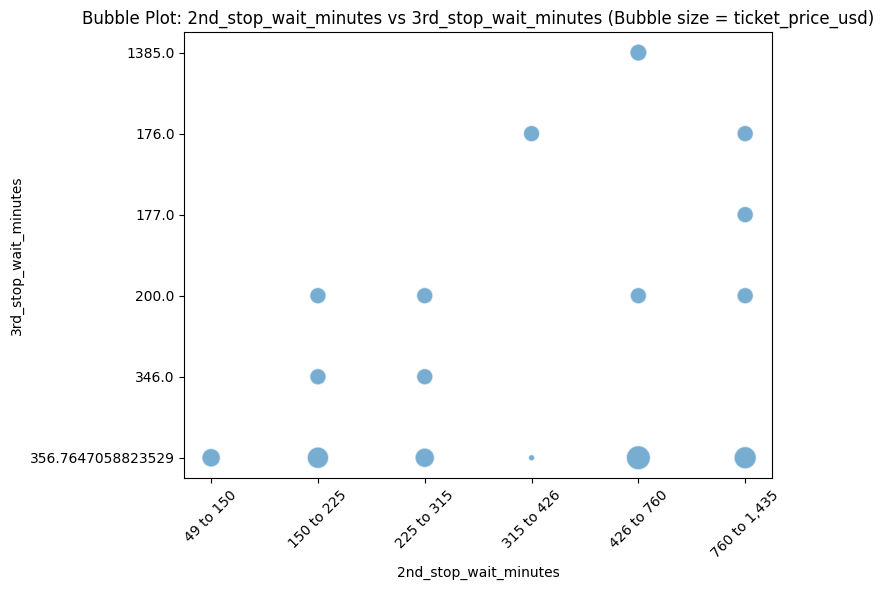

In [25]:
generate_top_binned_bubble_plots(df1, target_variable="ticket_price_usd", bin_method="quantile", bins=20, top_n=20)

In [26]:

result = backward_selection(df1, target_variable="ticket_price_usd")
print(result["selected_features"])
print(result["final_r2"])
print(result["removal_history"])


['travel_time_minutes', '1st_stop_wait_minutes', '2nd_stop_wait_minutes', '3rd_stop_wait_minutes']
0.12814008771746377
[('stops', 0.12814008771746377)]


## Flight Delay Dataset

In [ ]:
df2 = pd.read_csv("delay_data_clean_no_encode.csv")
df2 = df2.drop(columns="arrdelay") # Dropping this column due to data leakage when predicting depdelay
# Generating a random sample of 100k to make the data more manageable.
df2_samp = df2.sample(n=100000, random_state=42)

Analyzing dataset: Flight Delay Dataset
Explained variance ratio: [5.47596626e-01 4.52395030e-01 4.67123298e-06]
Principal component vectors:
 [[ 4.15577476e-08  2.91949352e-09 -2.93733999e-09  2.11143094e-10
  -2.34523814e-10 -1.97684816e-08 -1.17484291e-08  8.79857074e-09
   2.27183400e-08  1.99277584e-08  1.12097126e-08 -8.88043728e-09
  -2.22570337e-08 -2.82564499e-08  1.16981765e-08  9.12065114e-09
   7.43762225e-09  2.83672794e-08 -1.18325829e-08 -8.96653692e-09
  -7.56815954e-09  8.77102679e-10  3.77881287e-09 -8.44480124e-09
   1.90303729e-09  6.50122967e-08 -2.93506691e-05  2.83167729e-05
  -5.78580862e-08 -4.96879912e-12 -1.77697202e-09  5.74296219e-07
   9.14263291e-11 -5.96627461e-08 -2.23729459e-10 -1.05870438e-10
   7.50289045e-10  2.93696637e-09 -7.63557318e-10 -2.41840300e-09
  -1.58547252e-10  7.37138829e-08  1.36823928e-06  1.36414379e-09
   2.71870486e-08 -1.07843962e-10  2.55570467e-10 -5.52613367e-12
  -2.22938910e-10  7.15822801e-01  7.11963744e-04 -6.98281229e-01

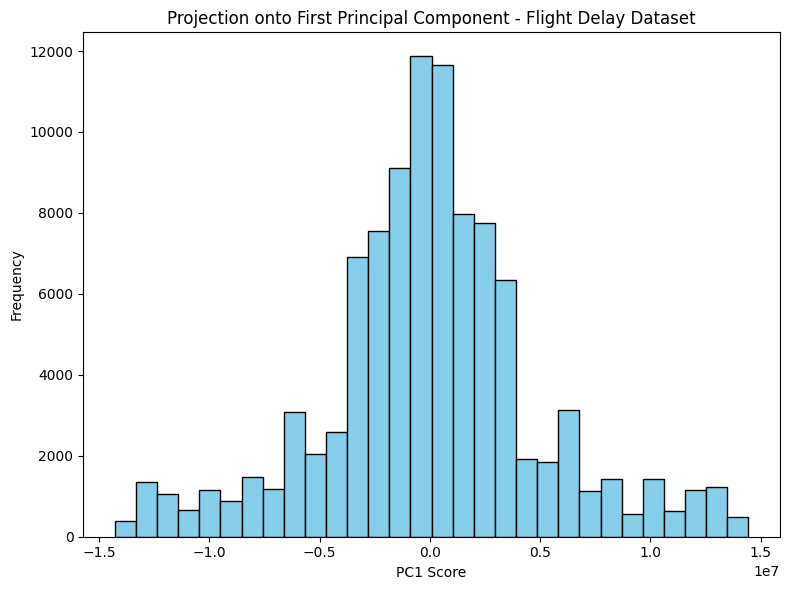

R² scores for predicting each numeric feature from others:
nonhubairportorigin: 1.0000
smallhubairportorigin: 1.0000
mediumhubairportorigin: 1.0000
largehubairportorigin: 1.0000
nonhubairportdest: 1.0000
smallhubairportdest: 1.0000
mediumhubairportdest: 1.0000
largehubairportdest: 1.0000
nonhubairlineorigin: 1.0000
smallhubairlineorigin: 1.0000
mediumhubairlineorigin: 1.0000
largehubairlineorigin: 1.0000
nonhubairlinedest: 1.0000
smallhubairlinedest: 1.0000
mediumhubairlinedest: 1.0000
largehubairlinedest: 1.0000
temp_20_30: 0.9970
temp_10_20: 0.9967
temp_0_10: 0.9950
temp_30_40: 0.9918
temp_n10_0: 0.9868
temperature: 0.9295
temp_ninfty_n10: 0.9144
windspeedsquare: 0.8955
windspeed: 0.8823
temp_40_infty: 0.8385
marketsharedest: 0.7243
marketshareorigin: 0.7194
year: 0.6736
windgustspeed: 0.6325
numflights: 0.6119
hhidest: 0.5951
hhiorigin: 0.5862
windgustdummy: 0.5425
monopolyroute: 0.3768
distance: 0.3551
originmetrogdppercapita: 0.3366
destmetrogdppercapita: 0.3103
loadfactor: 0.3090

In [13]:
analyze_dataset(df2_samp, "Flight Delay Dataset")

Top 15 features most correlated with 'depdelay':
scheduledhour: 0.1403
raindummy: 0.0898
snowdummy: 0.0513
windspeed: 0.0501
windspeedsquare: 0.0470
windgustdummy: 0.0466
originmetropop: 0.0401
numflights: 0.0360
destmetropop: 0.0324
windgustspeed: 0.0316
nonhubairlineorigin: 0.0307
snowtracedummy: 0.0253
nonhubairportorigin: 0.0227
mediumhubairlineorigin: 0.0212


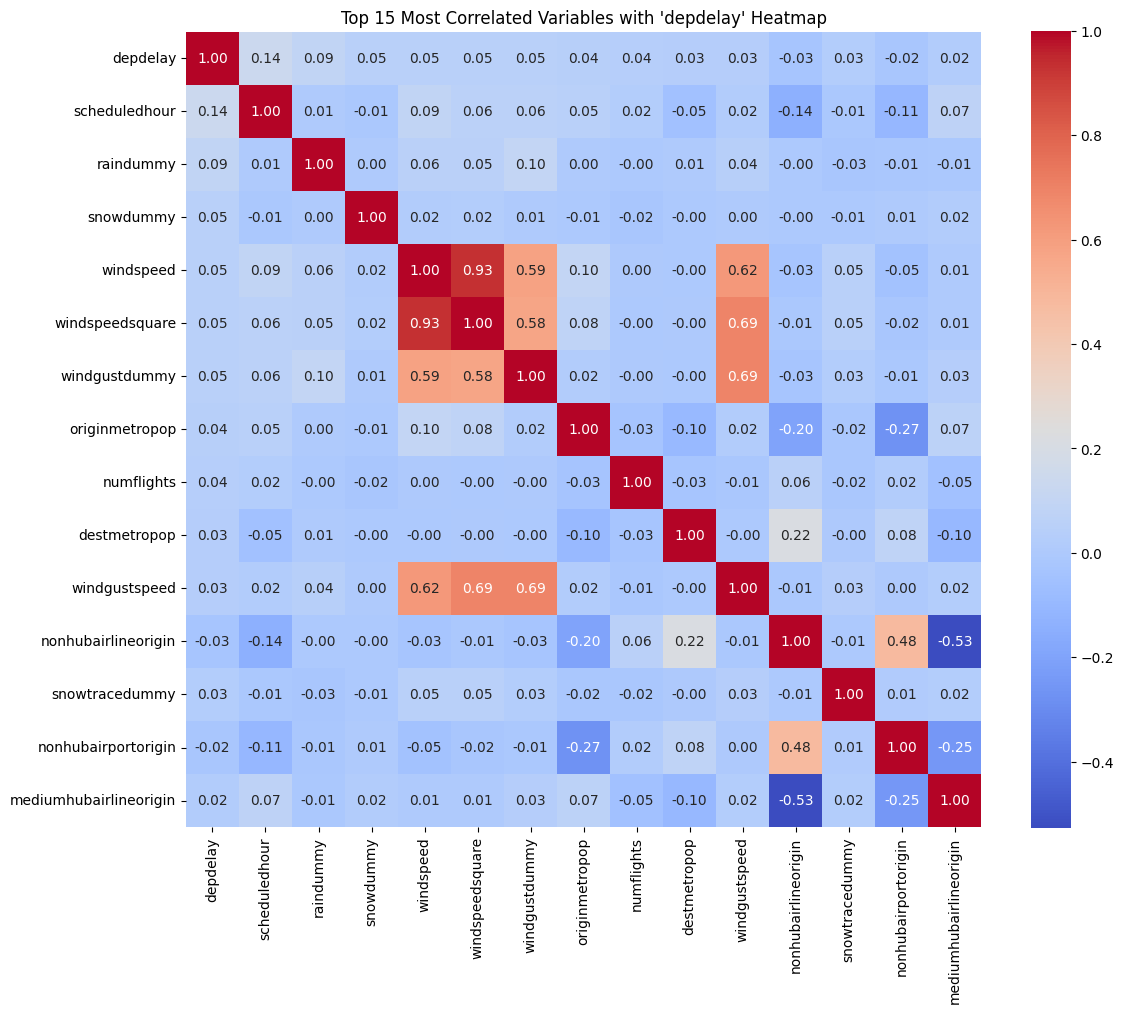

In [27]:
plot_top_correlated_heatmap(df2_samp, 'depdelay', 15)

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


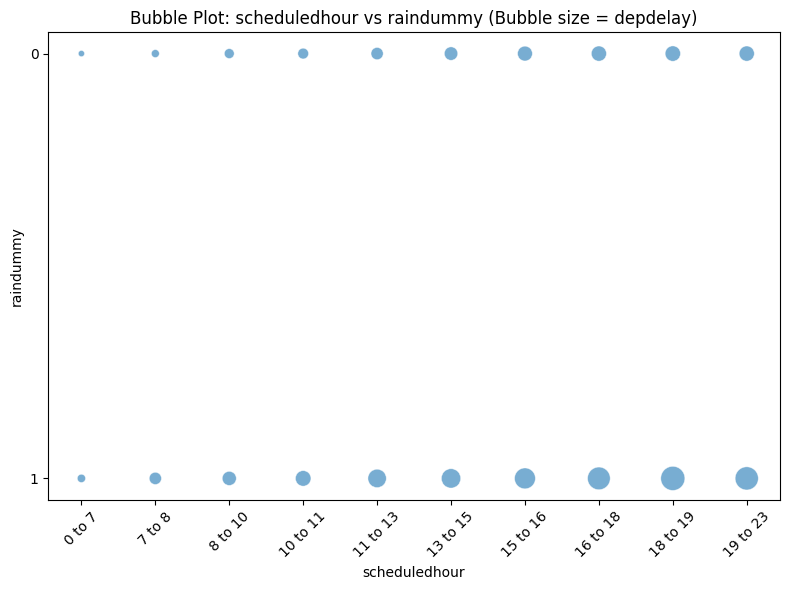

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


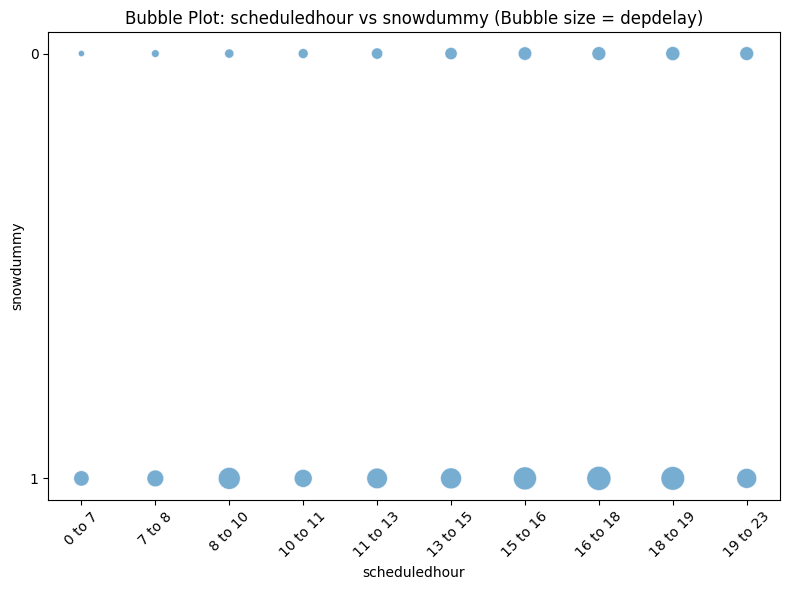

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


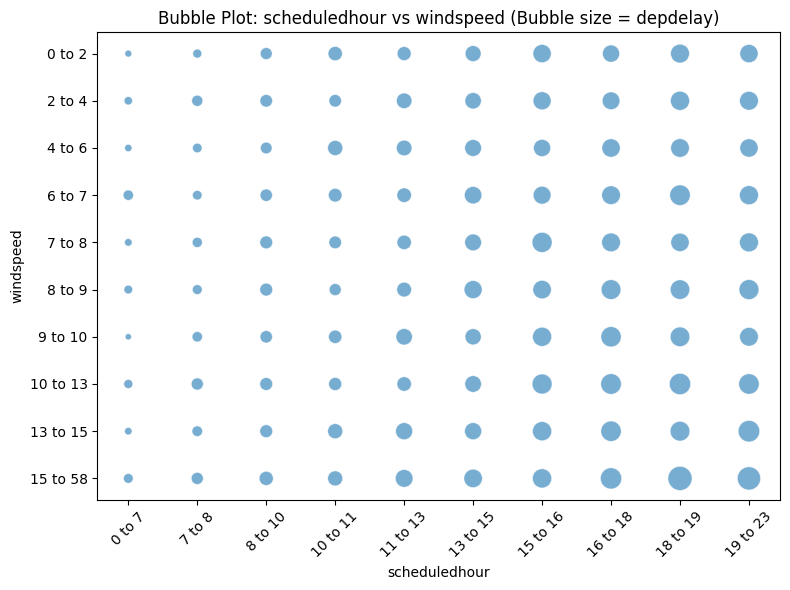

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


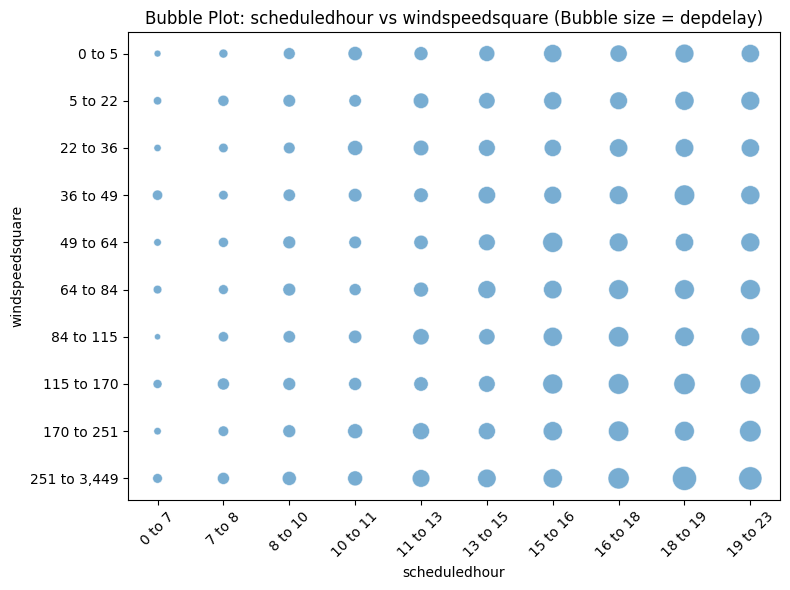

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


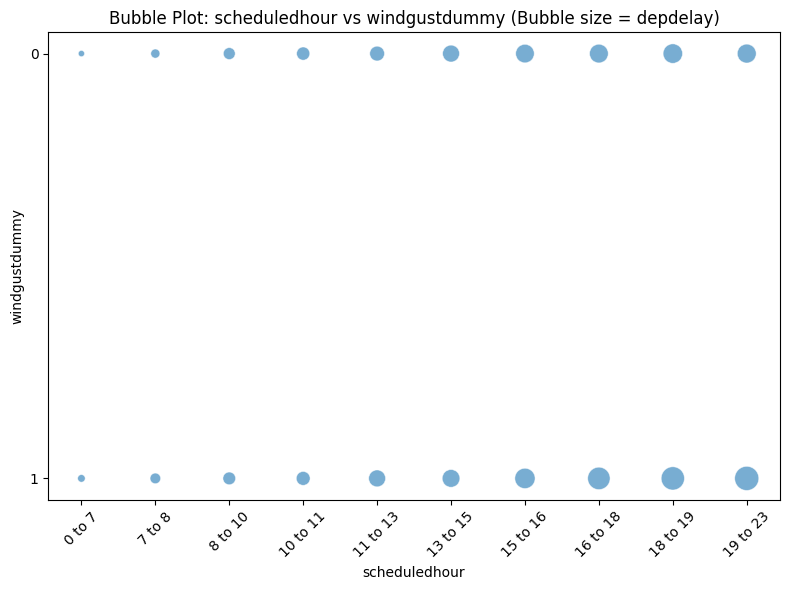

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


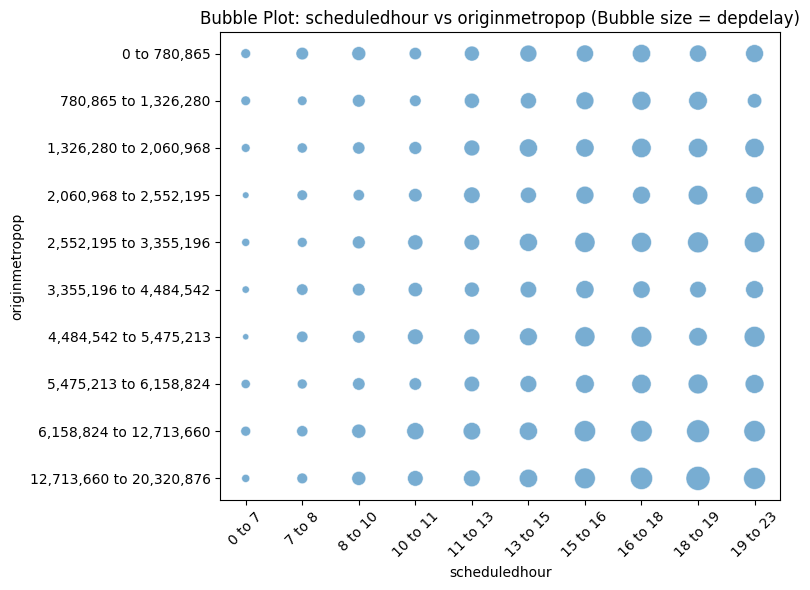

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


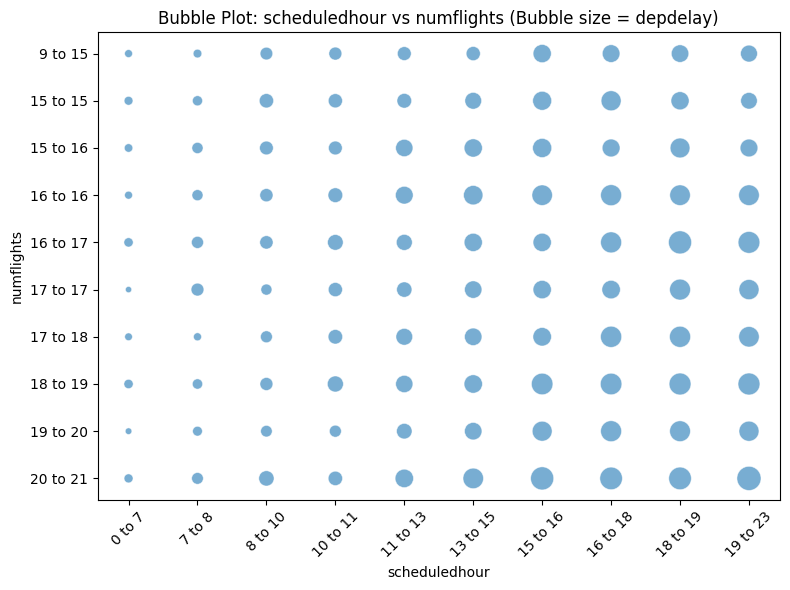

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


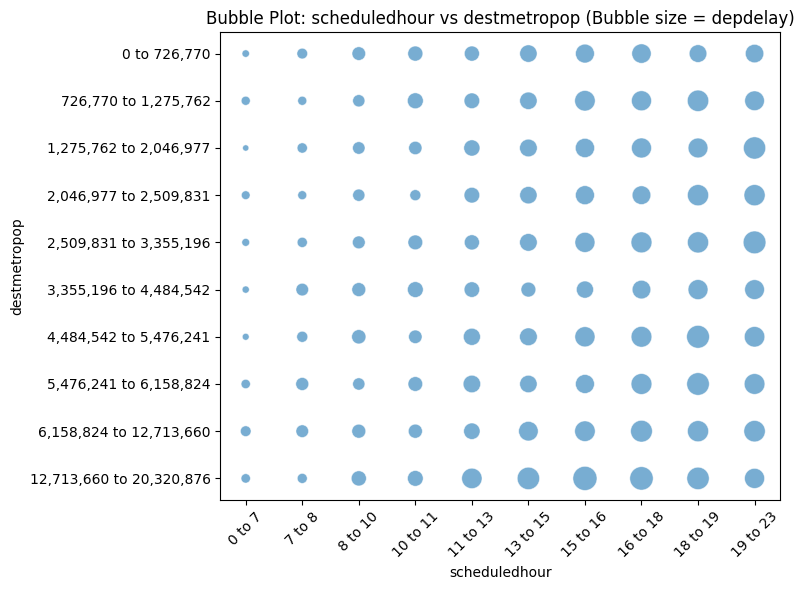

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


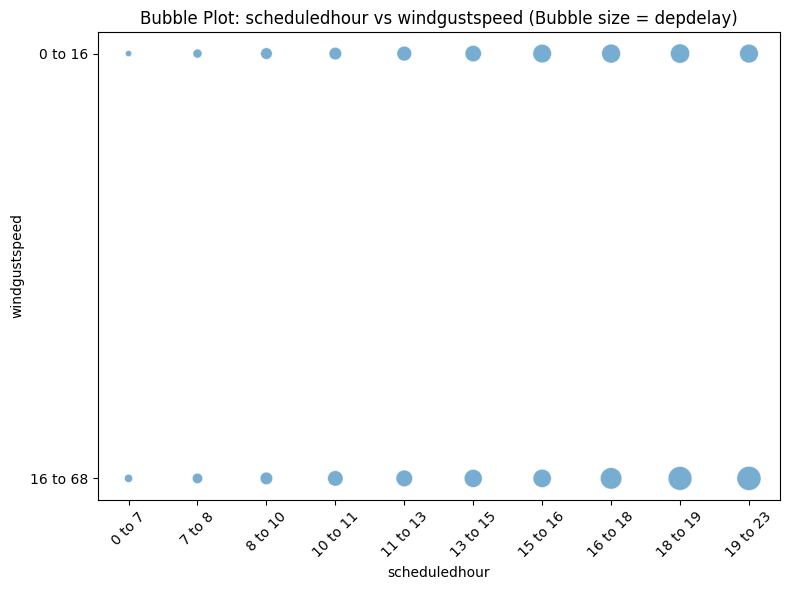

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


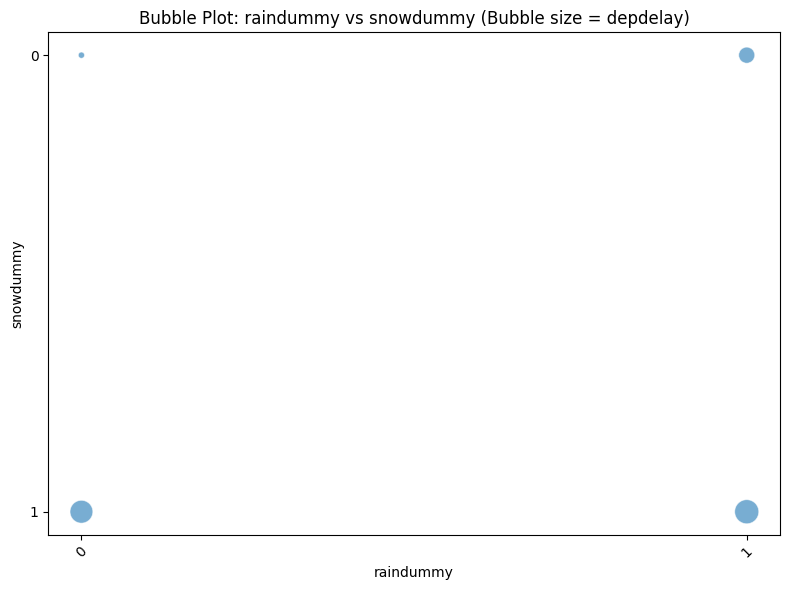

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


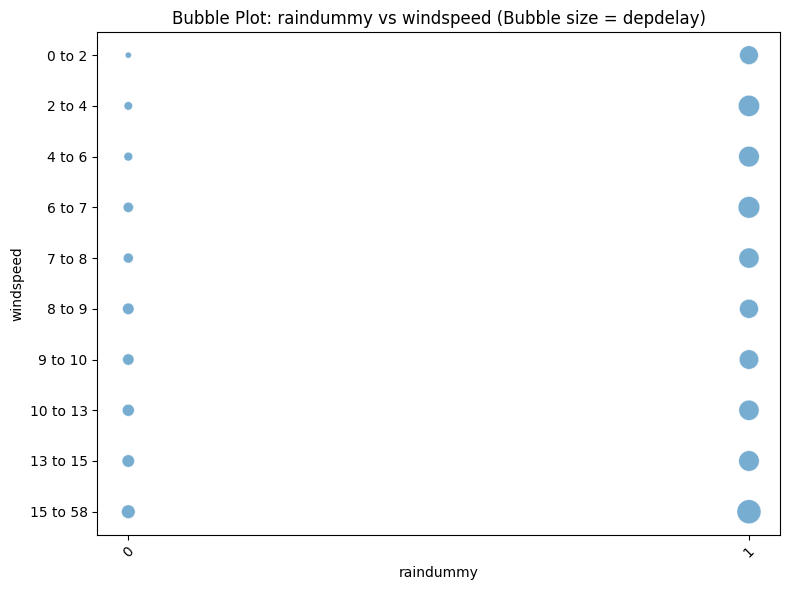

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


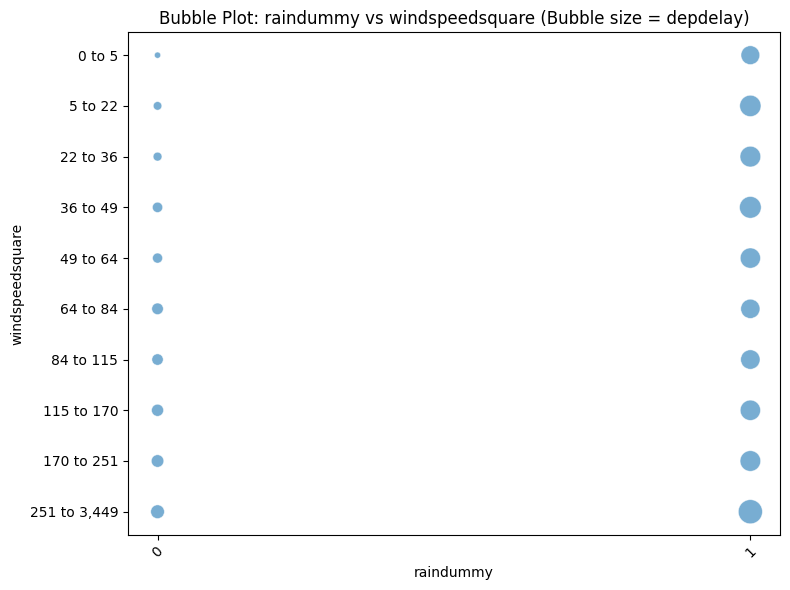

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


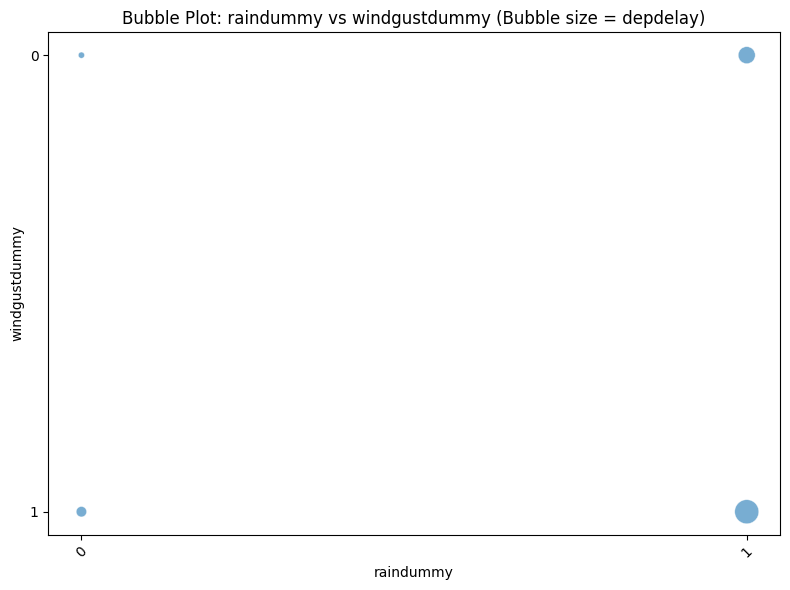

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


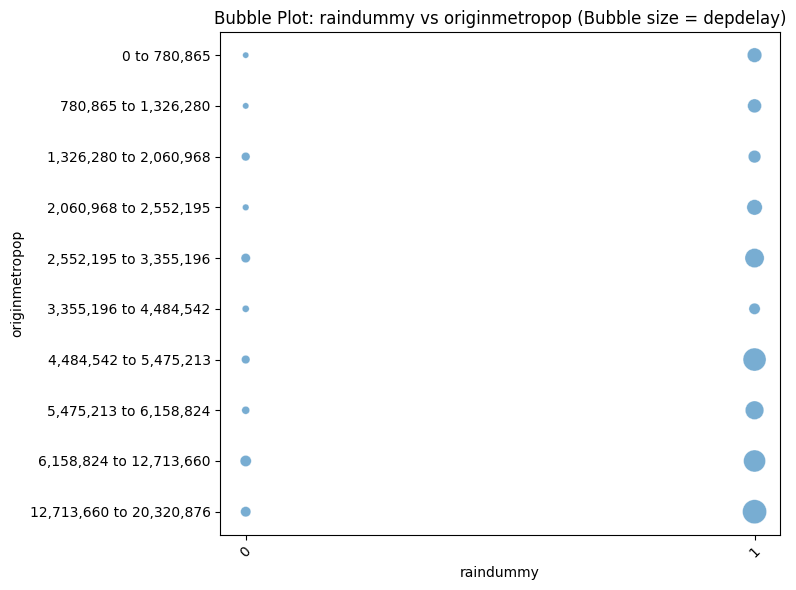

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


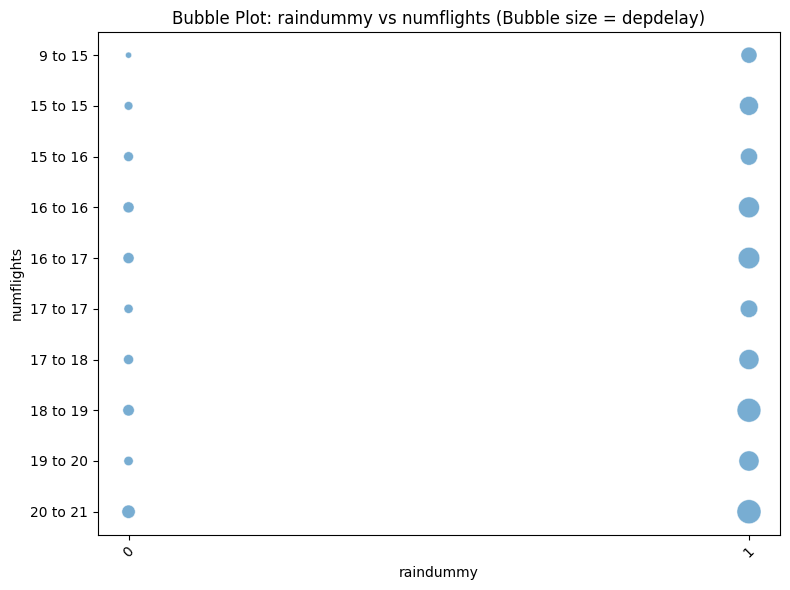

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


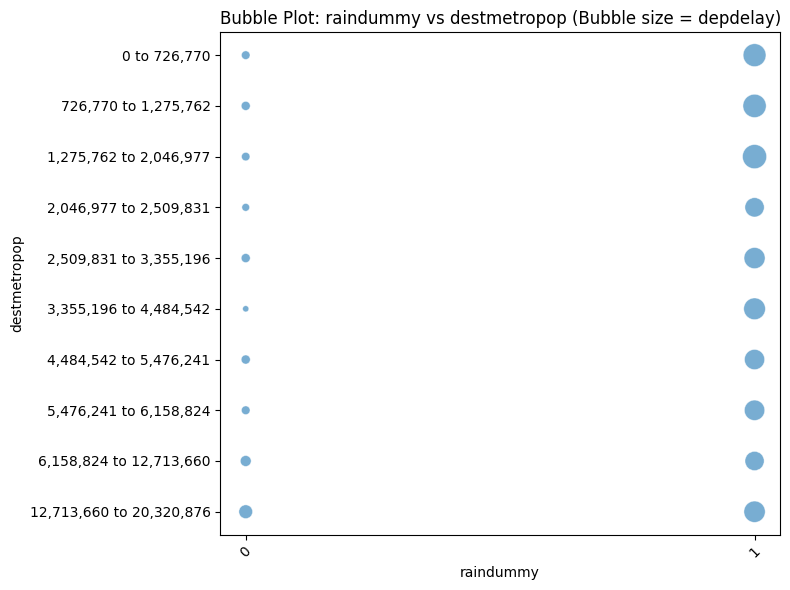

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


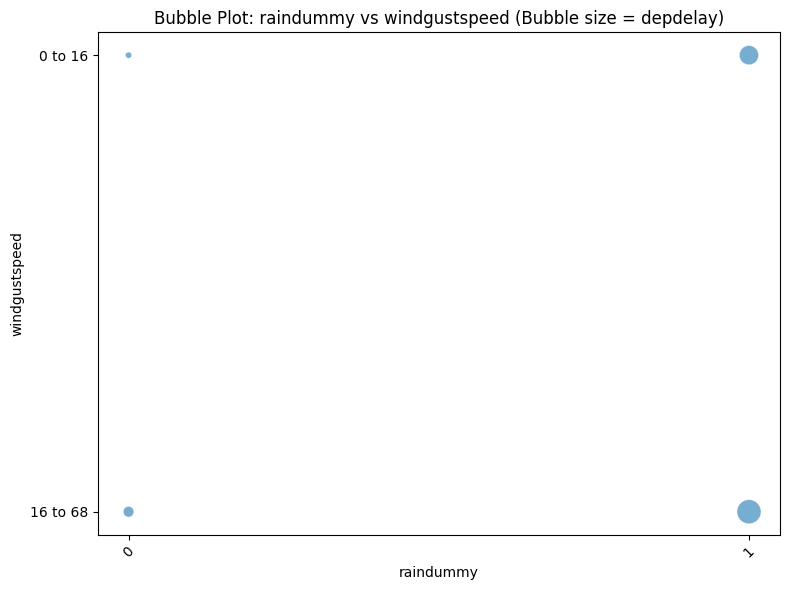

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


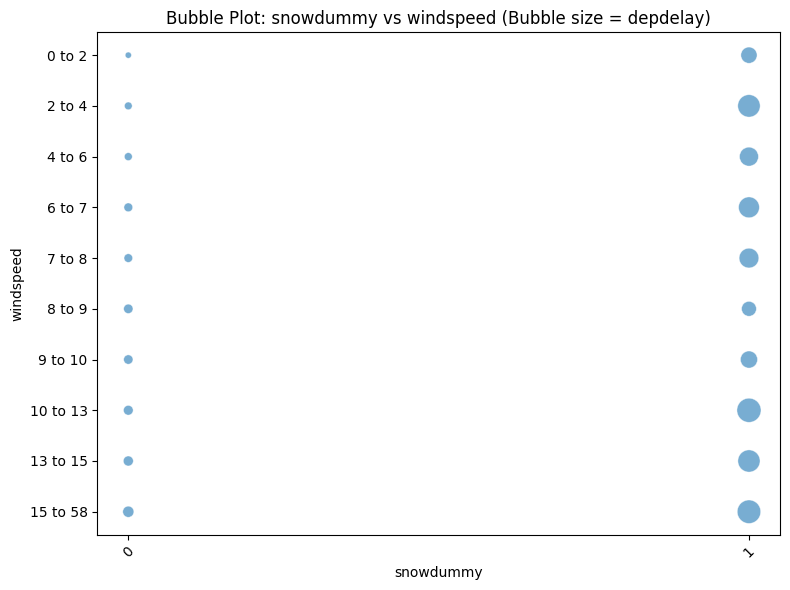

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


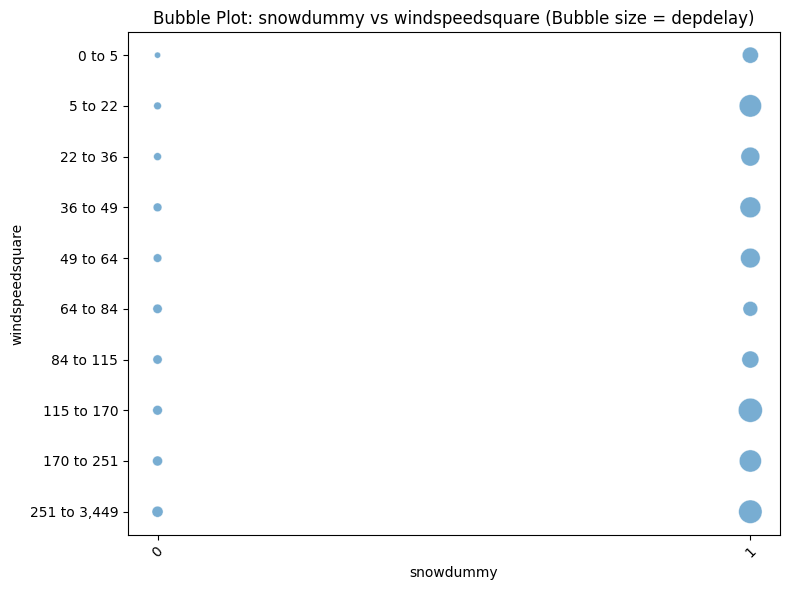

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


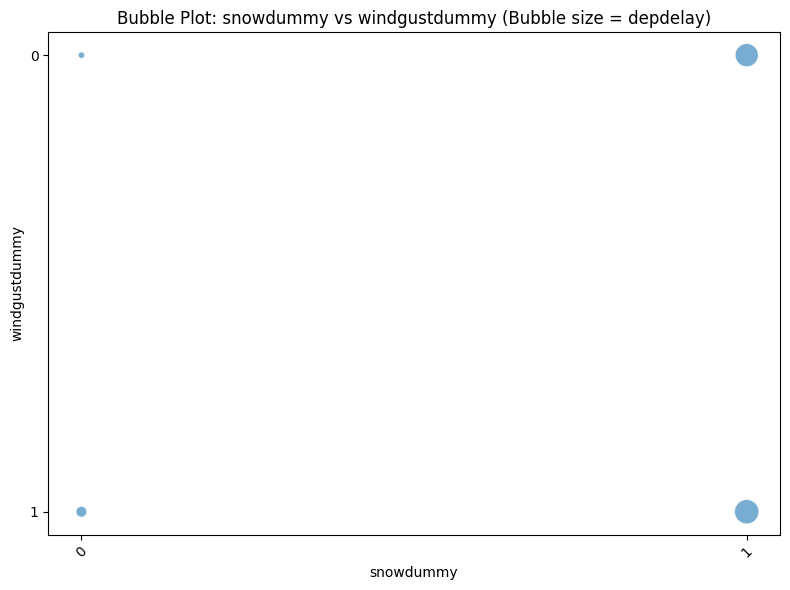

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


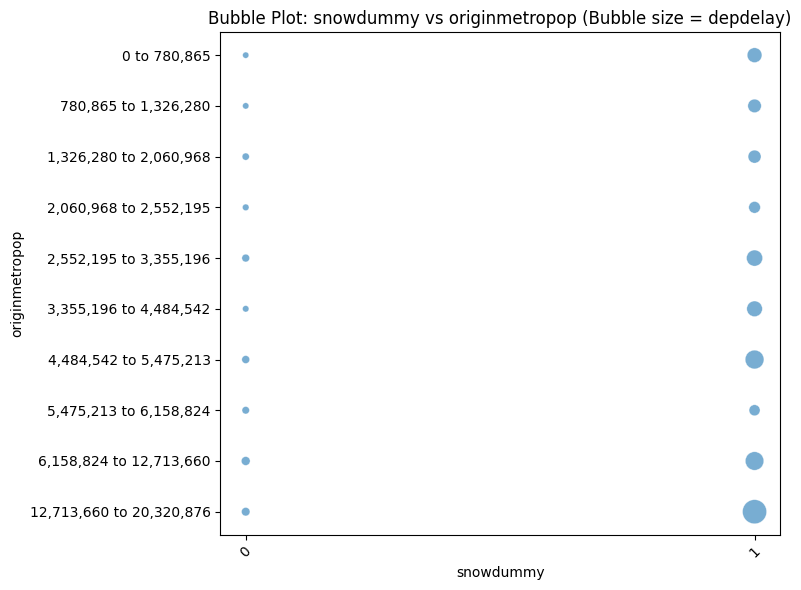

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


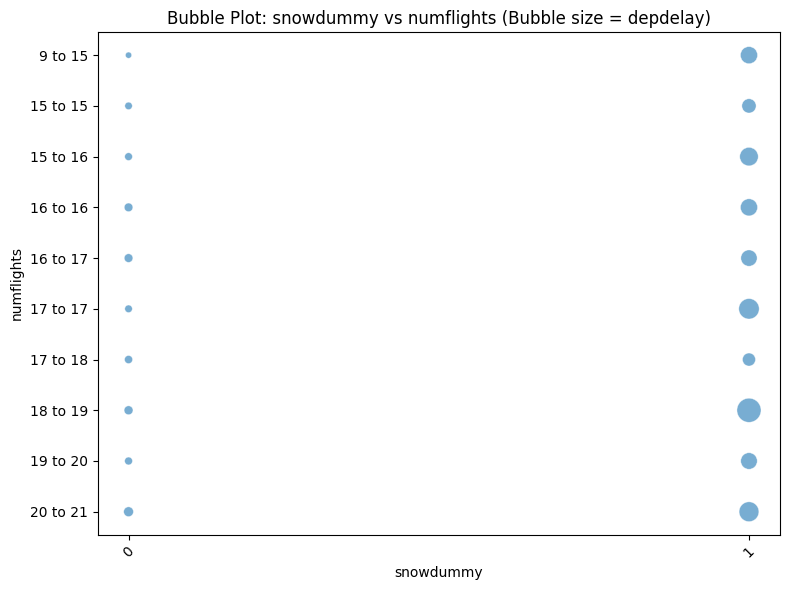

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


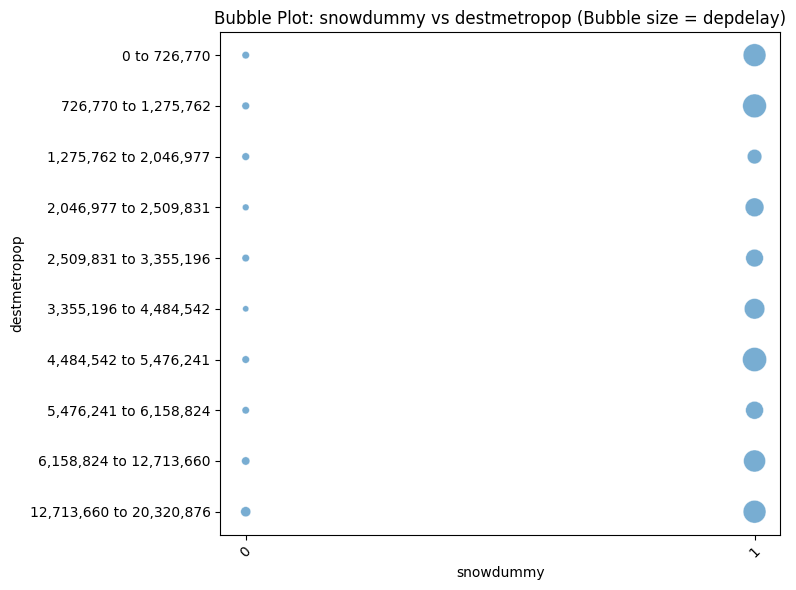

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


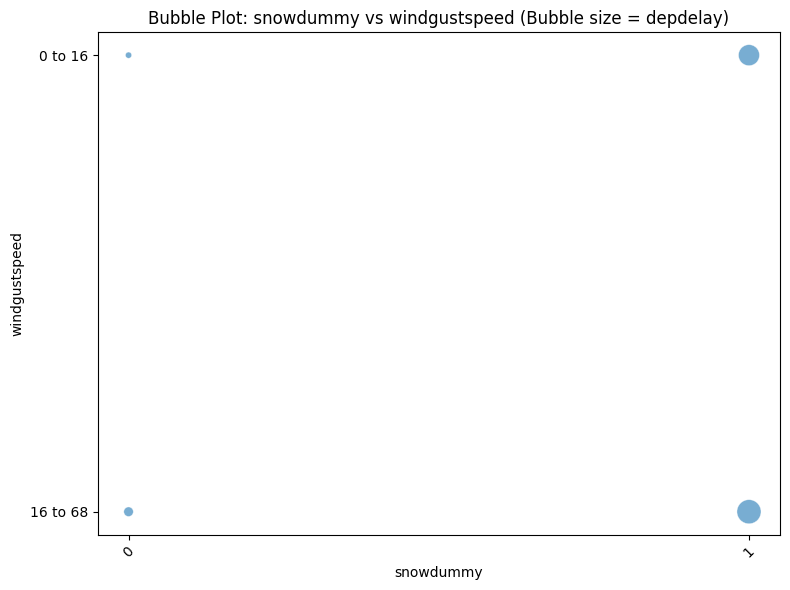

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


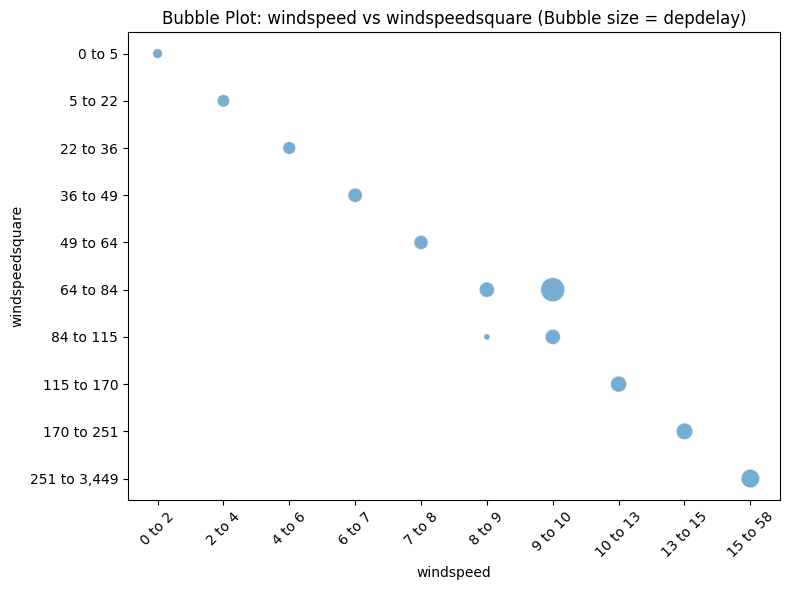

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


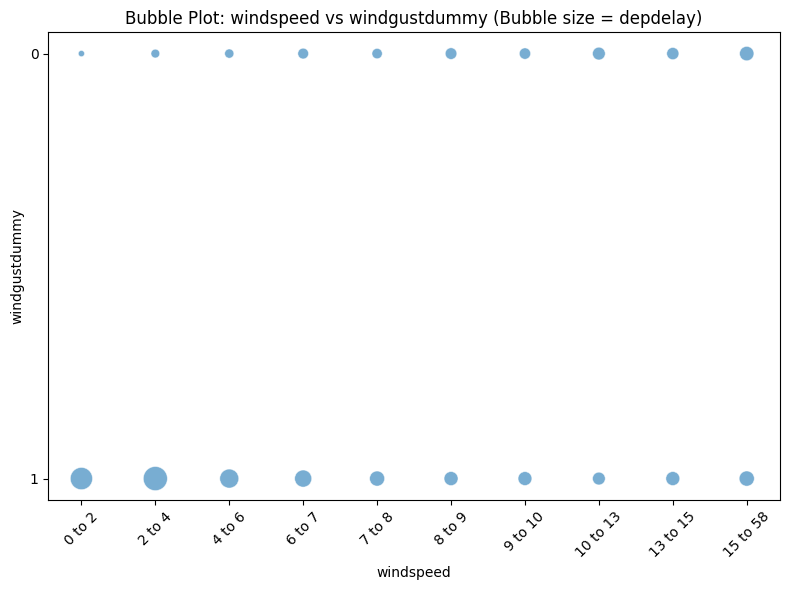

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


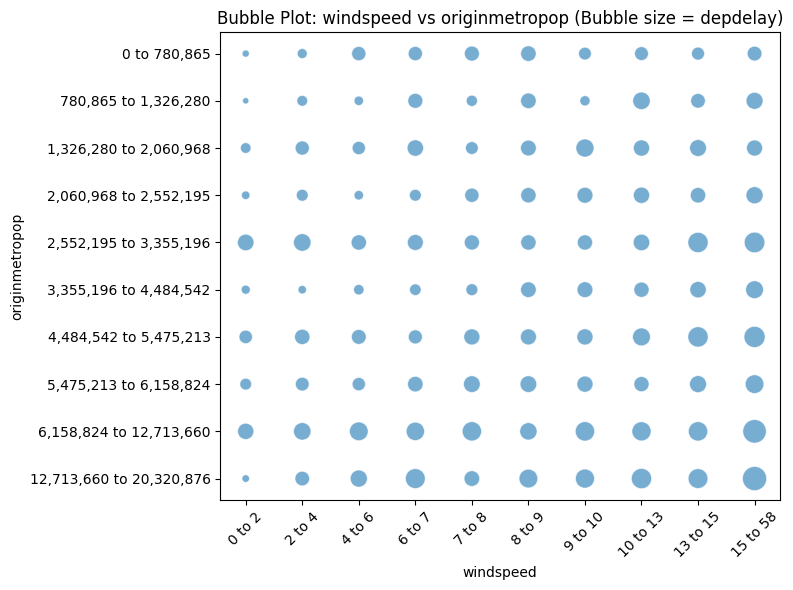

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


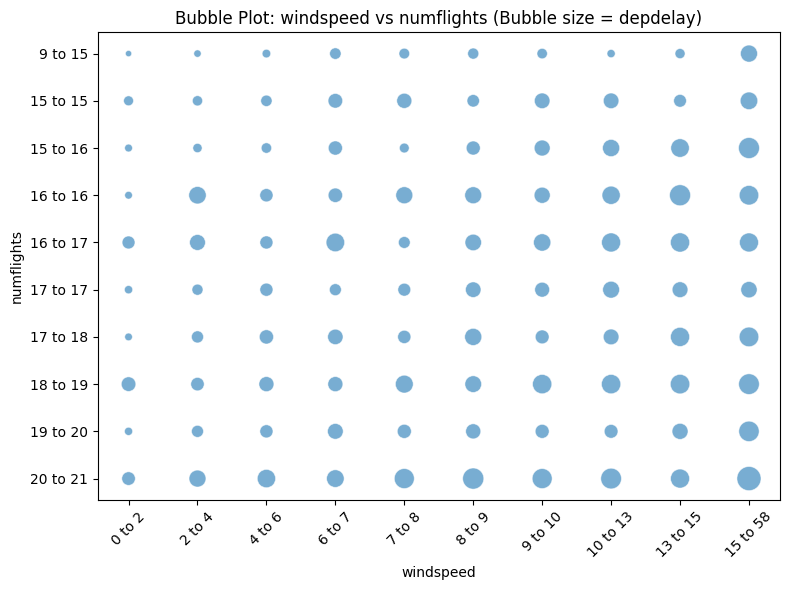

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


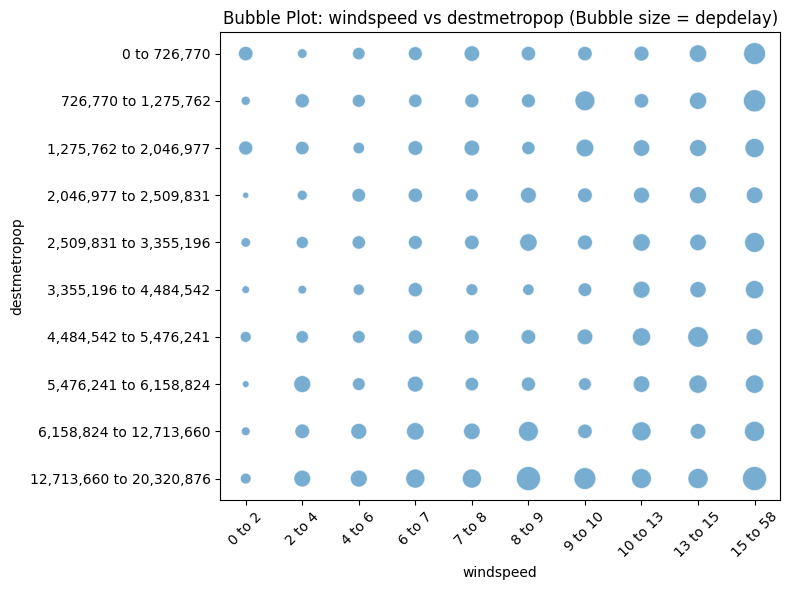

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


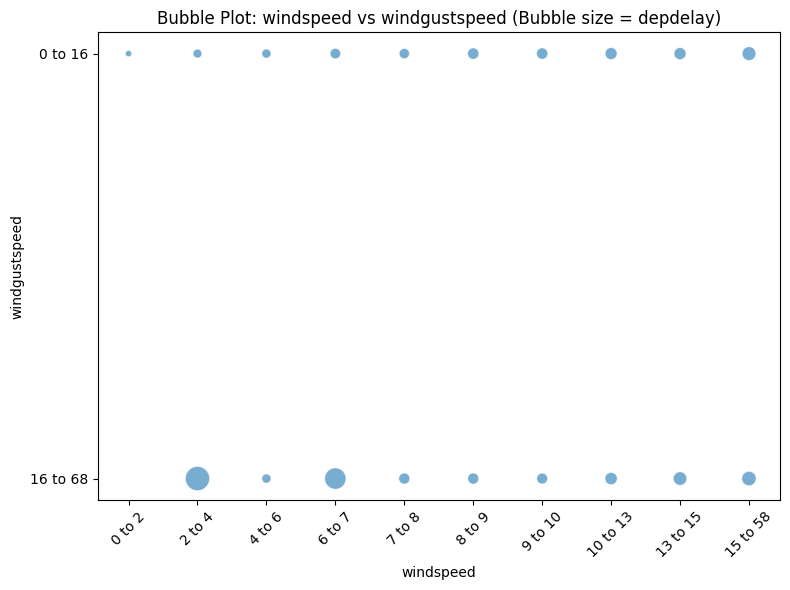

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


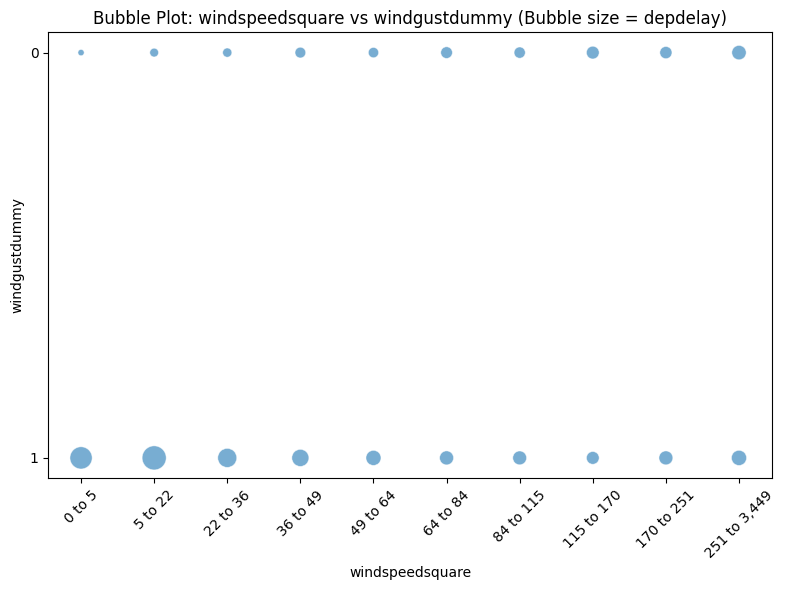

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


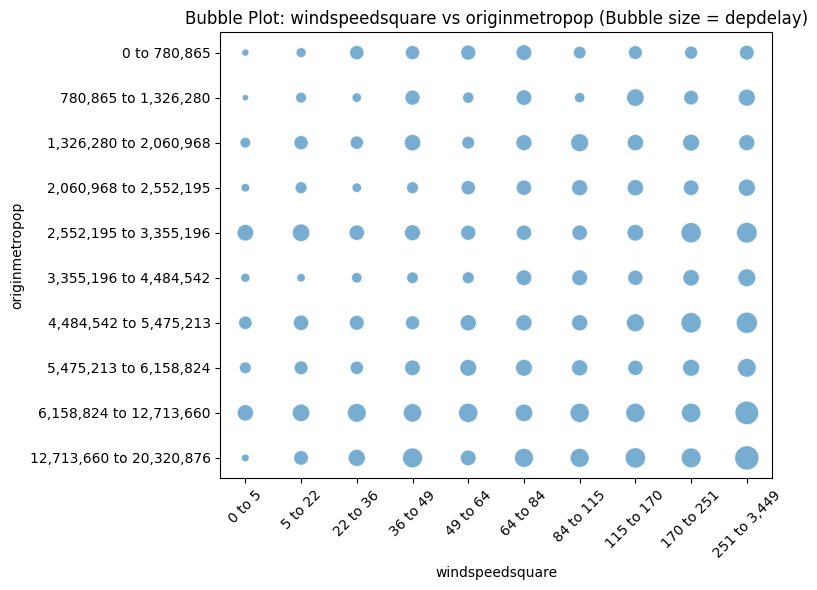

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


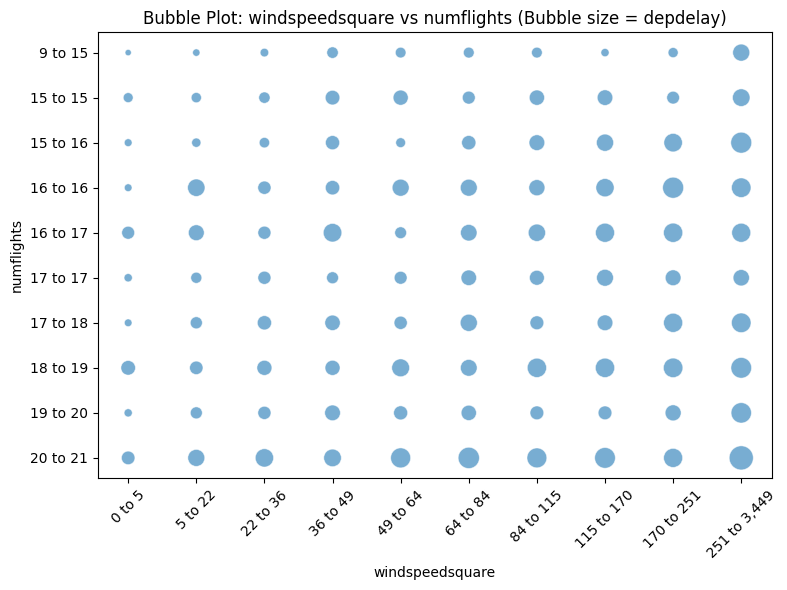

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


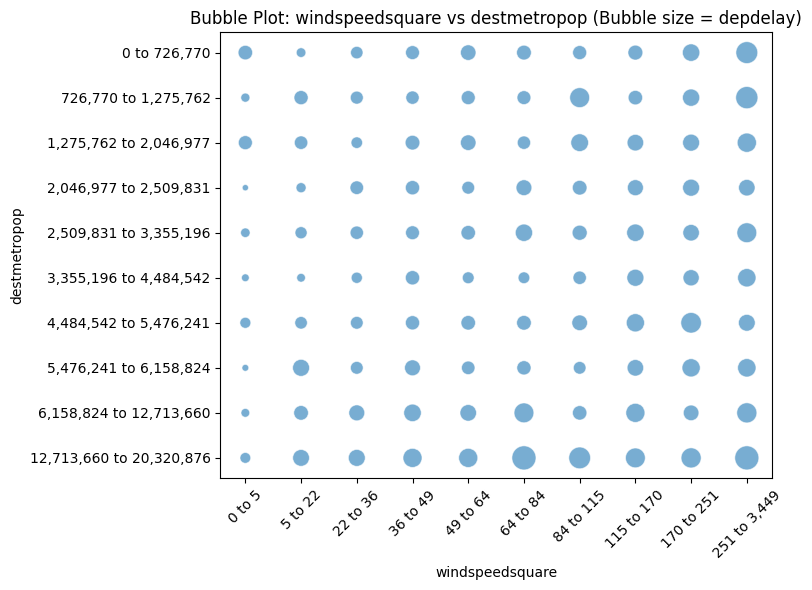

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


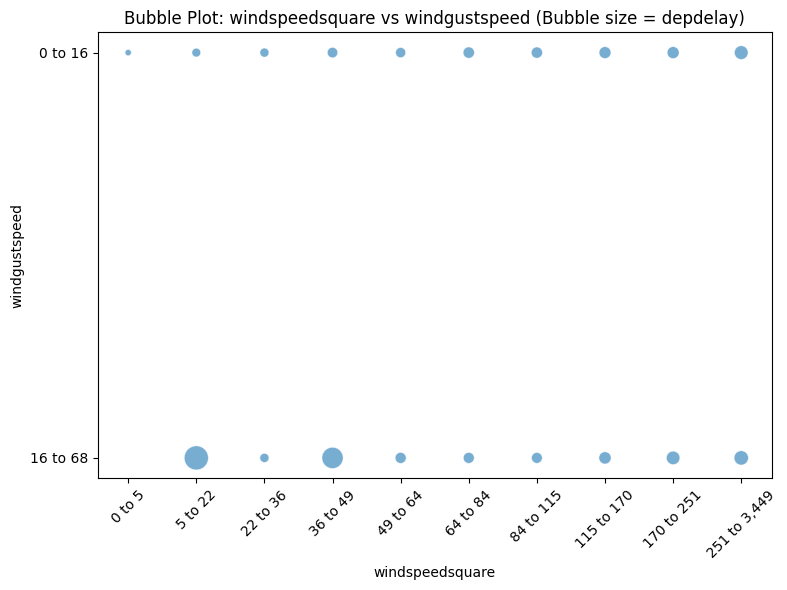

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


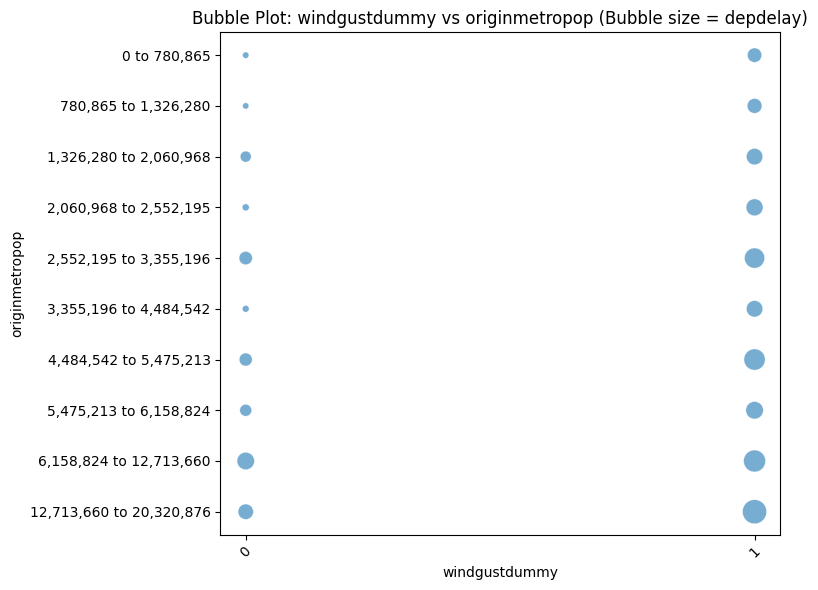

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


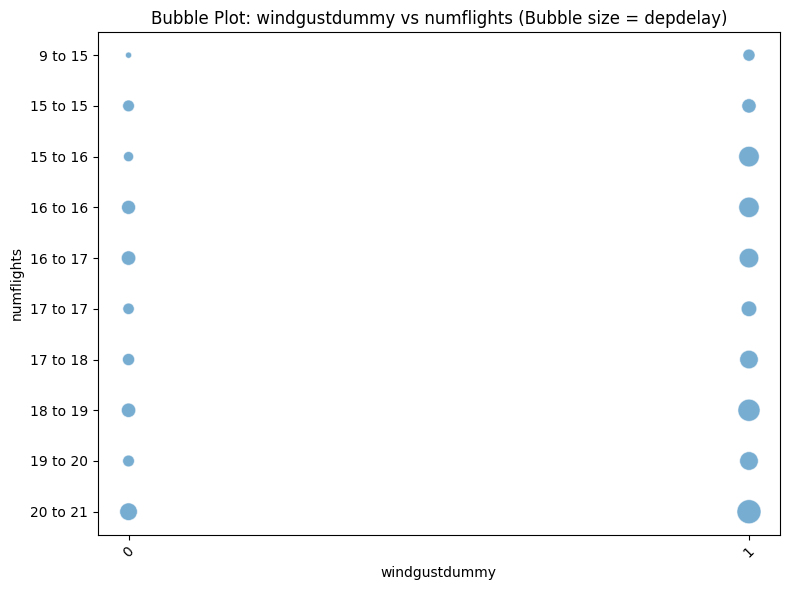

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


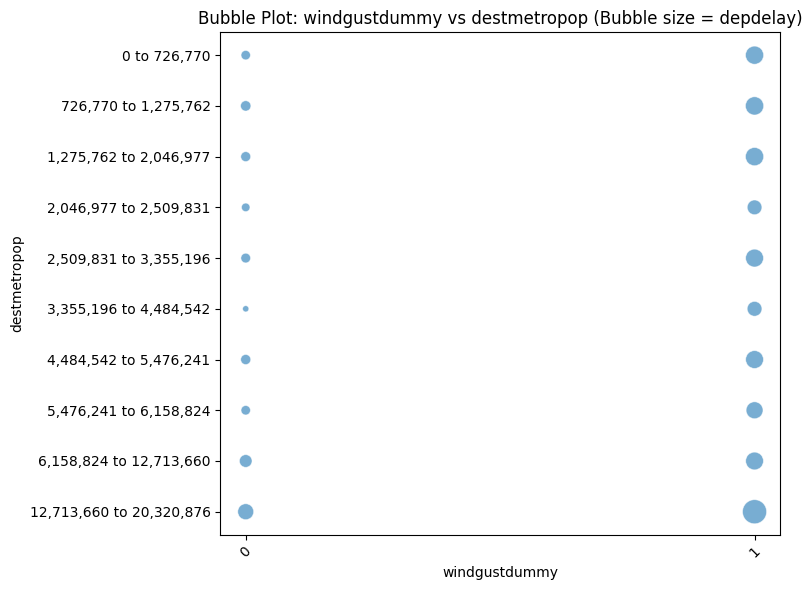

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


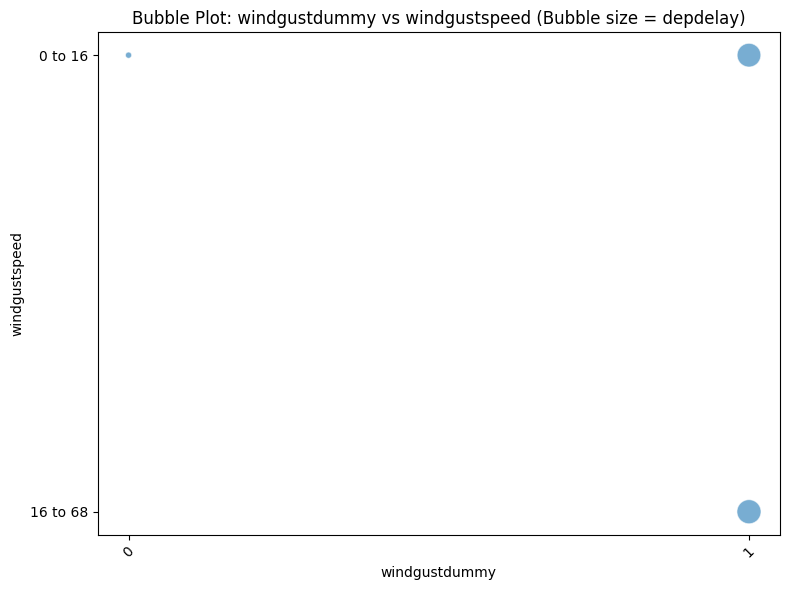

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


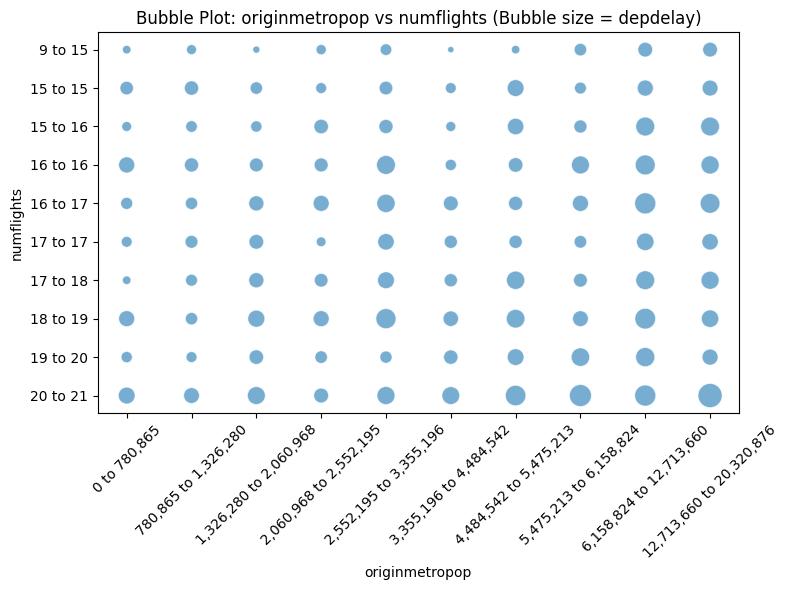

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


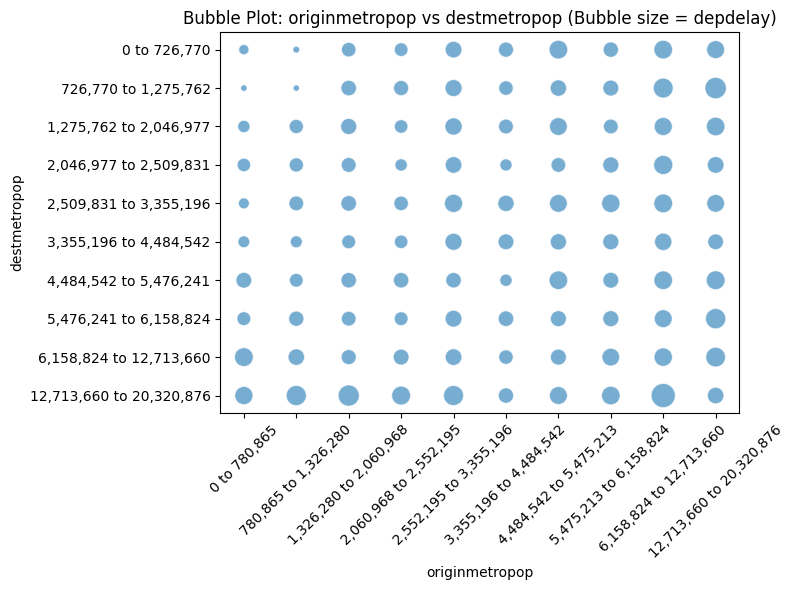

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


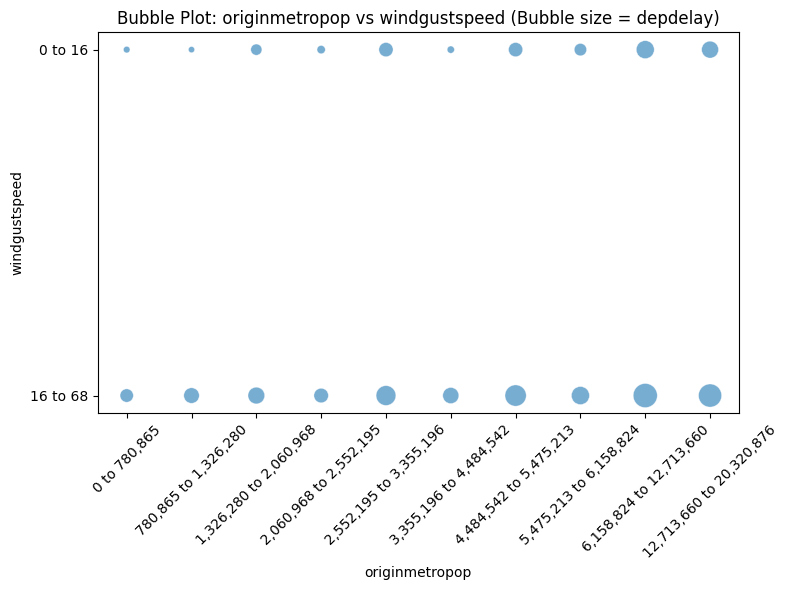

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


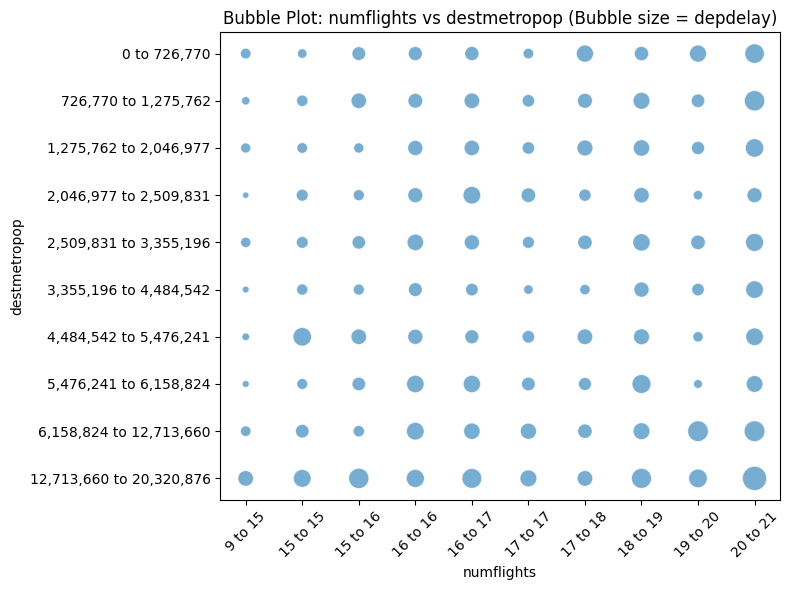

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


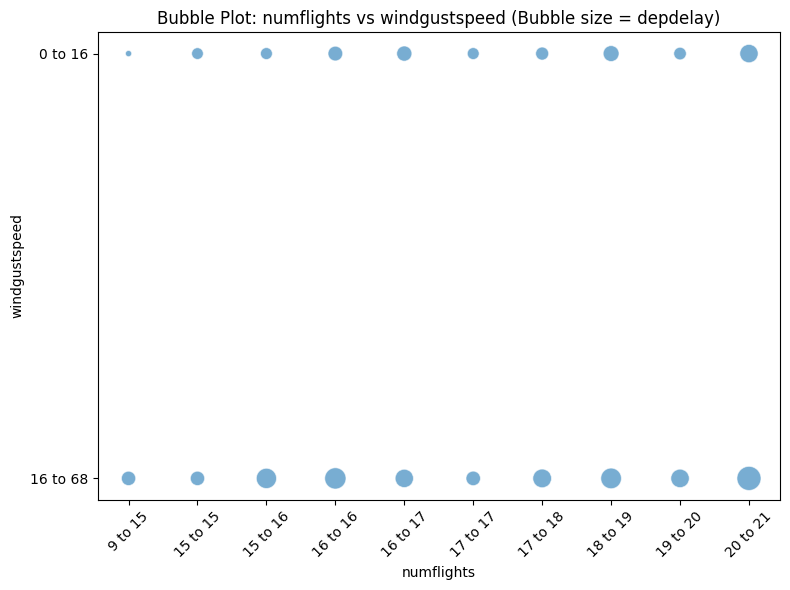

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:118: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:148: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\4097366973.py:149: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


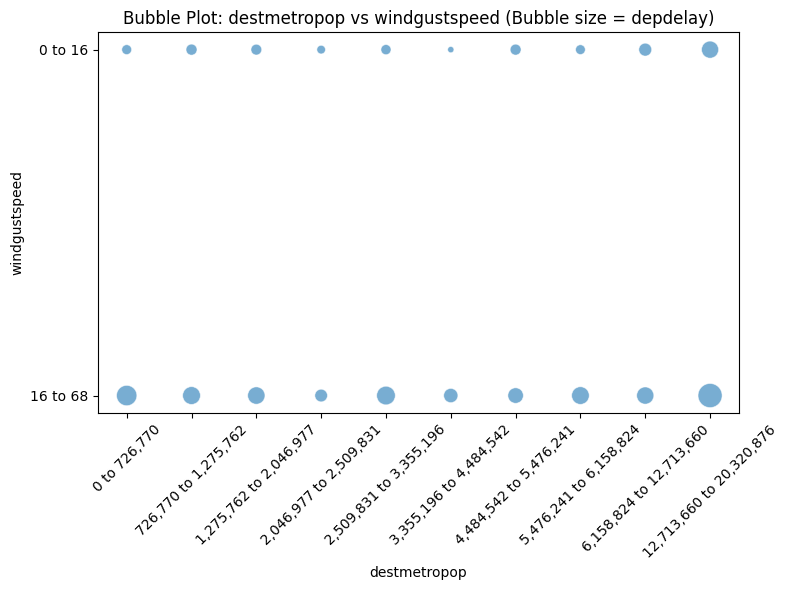

In [8]:
generate_top_binned_bubble_plots(
    df2_samp,
    target_variable="depdelay",
    bin_method="quantile",  # or "uniform"
    bins=10,
    top_n=10,
    unique_threshold=10  # adjust if needed
)


In [38]:

result = backward_selection(df2_samp, target_variable="depdelay")
print(result["selected_features"])
print(result["final_r2"])
print(result["removal_history"])


['marketshareorigin', 'marketsharedest', 'hhiorigin', 'hhidest', 'nonhubairportorigin', 'smallhubairportorigin', 'mediumhubairportorigin', 'largehubairportorigin', 'nonhubairportdest', 'smallhubairportdest', 'mediumhubairportdest', 'largehubairportdest', 'nonhubairlineorigin', 'smallhubairlineorigin', 'mediumhubairlineorigin', 'largehubairlineorigin', 'nonhubairlinedest', 'smallhubairlinedest', 'mediumhubairlinedest', 'largehubairlinedest', 'year', 'month', 'dayofmonth', 'dayofweek', 'originairportid', 'destairportid', 'capacity', 'loadfactor', 'numflights', 'distance', 'monopolyroute', 'temperature', 'temp_ninfty_n10', 'temp_n10_0', 'temp_0_10', 'temp_10_20', 'temp_20_30', 'temp_30_40', 'temp_40_infty', 'windspeed', 'windspeedsquare', 'windgustdummy', 'windgustspeed', 'raindummy', 'raintracedummy', 'snowdummy', 'snowtracedummy', 'originmetropop', 'originmetrogdppercapita', 'destmetropop', 'destmetrogdppercapita']
0.023537655333411234
[('scheduledhour', 0.023537655333411234)]


## USDOT On-Time Dataset

In [14]:
df3 = pd.read_csv("usdot_onetime_clean_no_encode.csv", low_memory=False)
#df2 = df2.drop(columns="arrdelay") # Dropping this column due to data leakage when predicting depdelay
# Generating a random sample of 100k to make the data more manageable.
df3_clean = df3.dropna(axis=1, how='all')
df3_samp = df3_clean.sample(n=100000, random_state=42)


In [15]:
df3_imp = safe_impute_numeric(df3_samp)

Number of numeric columns with missing values: 45
Number of columns with at least one non-NaN value: 40
Shape of imputed array: (100000, 40)


Analyzing dataset: USDOT Ontime Flight Dataset
Explained variance ratio: [0.50010134 0.49857923 0.00114103]
Principal component vectors:
 [[ 1.46825824e-17  1.66533454e-16 -0.00000000e+00  3.00588786e-07
   3.70574998e-08 -3.14343052e-05 -1.13489965e-04  9.93979019e-03
   9.93977809e-01  5.45036948e-03 -1.45392798e-05  3.98121198e-05
   1.08984867e-03  1.08984922e-01  3.96195355e-04 -5.35153013e-06
   2.18245503e-05 -1.11032501e-04 -1.16821180e-04 -6.32573420e-06
  -5.10476990e-06 -7.47866519e-08 -3.65821452e-07 -1.74255714e-06
  -1.29187507e-04 -2.59370692e-05  9.18396674e-07 -3.58410060e-05
  -1.84170534e-05 -1.02559054e-05 -6.61695101e-06 -9.81332027e-08
  -6.17990089e-07 -1.22353140e-08 -4.58359890e-10  2.90284876e-05
   2.38546709e-05  2.46766891e-05  6.90444855e-21  3.26664286e-04
   1.35621648e-06 -4.11004370e-07 -1.14273404e-07  1.78100495e-07
   4.72795156e-09  9.77562388e-07 -1.60211890e-06 -2.26457998e-07
  -2.21245725e-07 -1.47618453e-09  2.41796652e-10 -7.25281341e-08
  -3

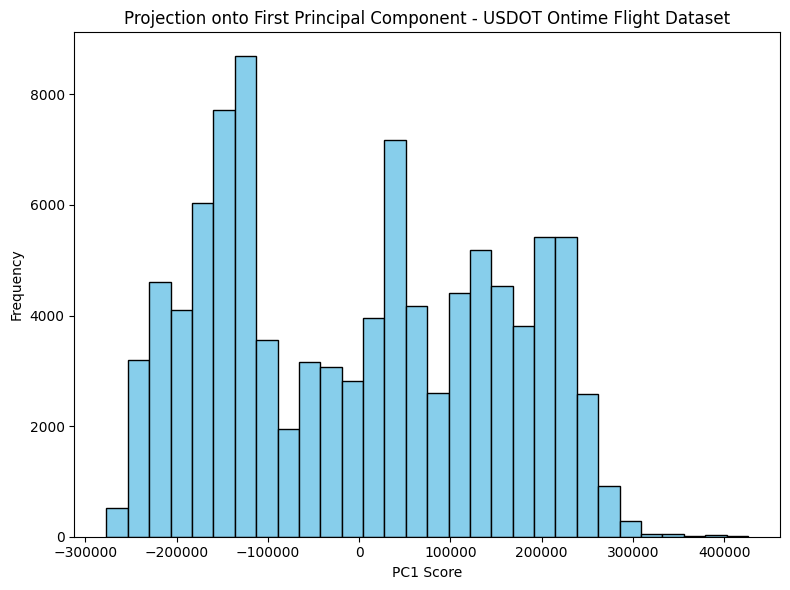

R² scores for predicting each numeric feature from others:
year: 1.0000
quarter: 1.0000
month: 1.0000
flights: 1.0000
div2_airport_seq_id: 1.0000
div2_airport_id: 1.0000
div1_airport_id: 1.0000
div1_airport_seq_id: 1.0000
dest_airport_id: 1.0000
dest_airport_seq_id: 1.0000
origin_airport_id: 1.0000
origin_airport_seq_id: 1.0000
actual_elapsed_time: 0.9998
air_time: 0.9998
arr_delay_new: 0.9988
dep_delay: 0.9977
dep_delay_new: 0.9974
carrier_delay: 0.9967
arr_del15: 0.9934
late_aircraft_delay: 0.9933
arr_delay: 0.9932
taxi_out: 0.9925
crs_elapsed_time: 0.9899
distance: 0.9857
nas_delay: 0.9797
weather_delay: 0.9776
taxi_in: 0.9776
div2_longest_gtime: 0.9714
arr_delay_group: 0.9705
distance_group: 0.9698
dep_delay_group: 0.9664
div2_total_gtime: 0.9621
dep_time: 0.9606
total_add_gtime: 0.9456
longest_add_gtime: 0.9451
wheels_off: 0.9387
wheels_on: 0.9342
arr_time: 0.9275
crs_dep_time: 0.9165
div1_total_gtime: 0.8940
div1_longest_gtime: 0.8866
div_arr_delay: 0.8759
div_actual_elapsed_time

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:61: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(zscore(df[numeric_cols]))


In [16]:
df3_imp = df3_imp.dropna(axis=1, how='all').copy()
analyze_dataset(df3_imp, "USDOT Ontime Flight Dataset")

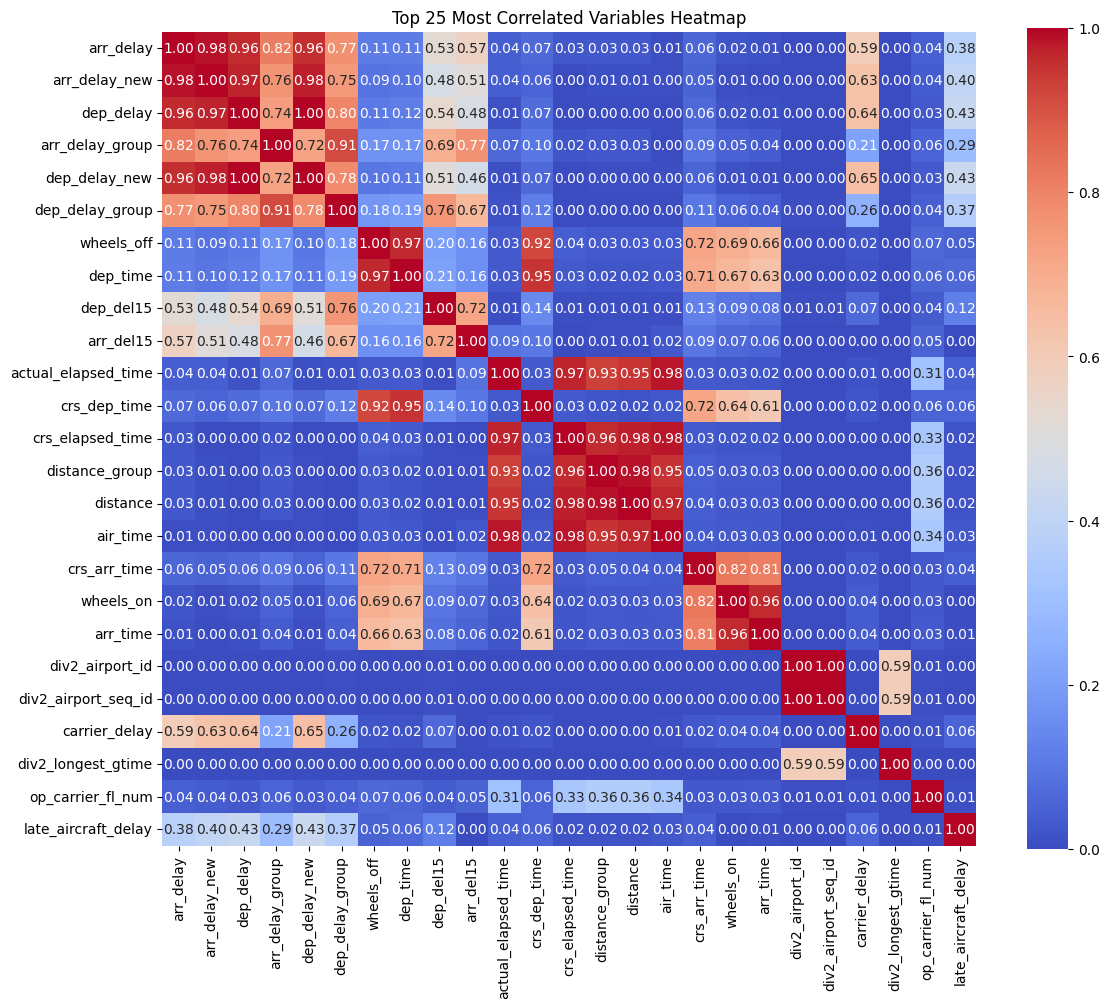

In [73]:
plot_top_correlated_heatmap(df3_imp, 25)

C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932

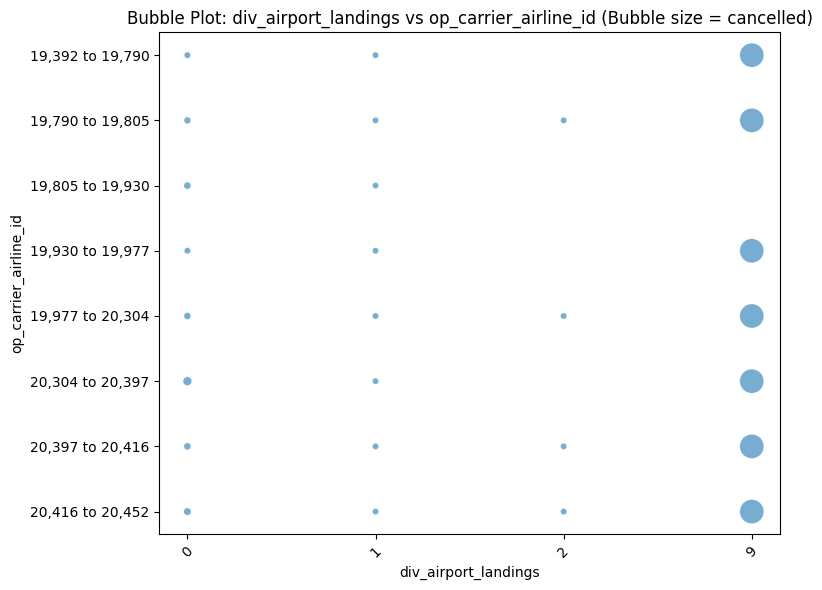

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


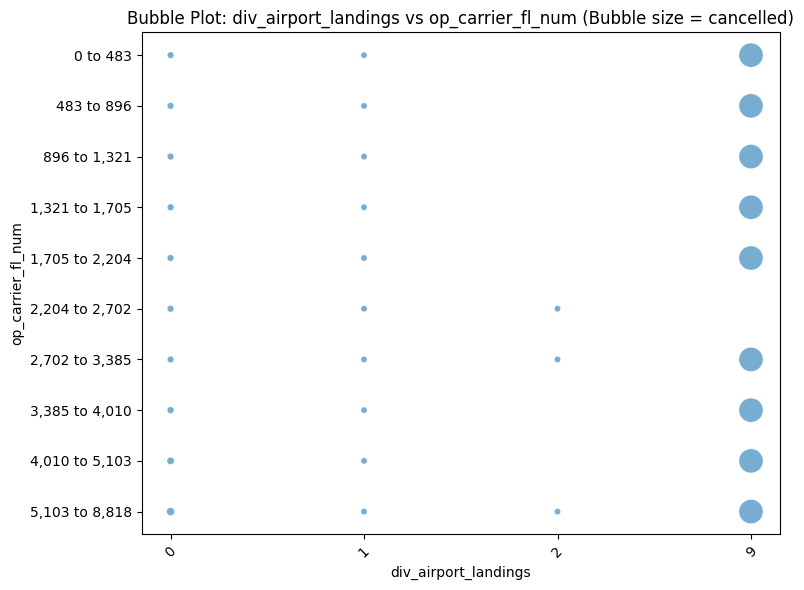

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


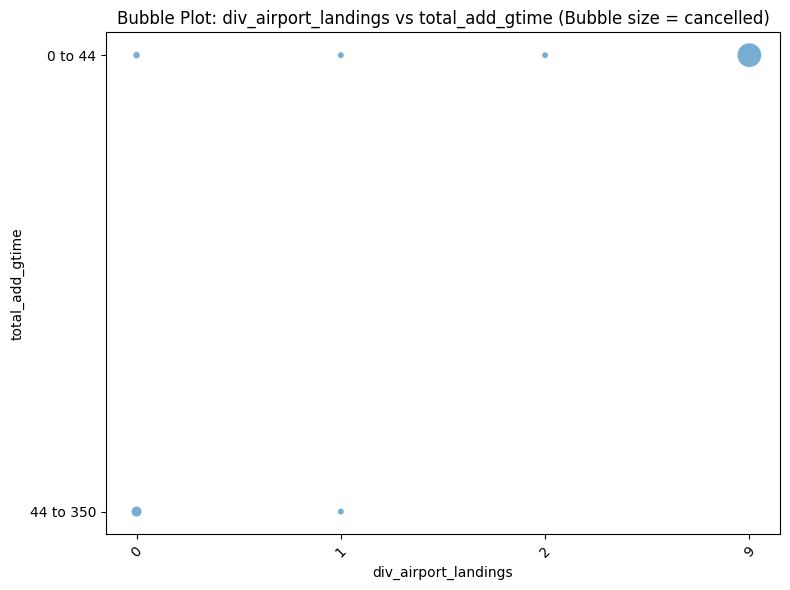

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


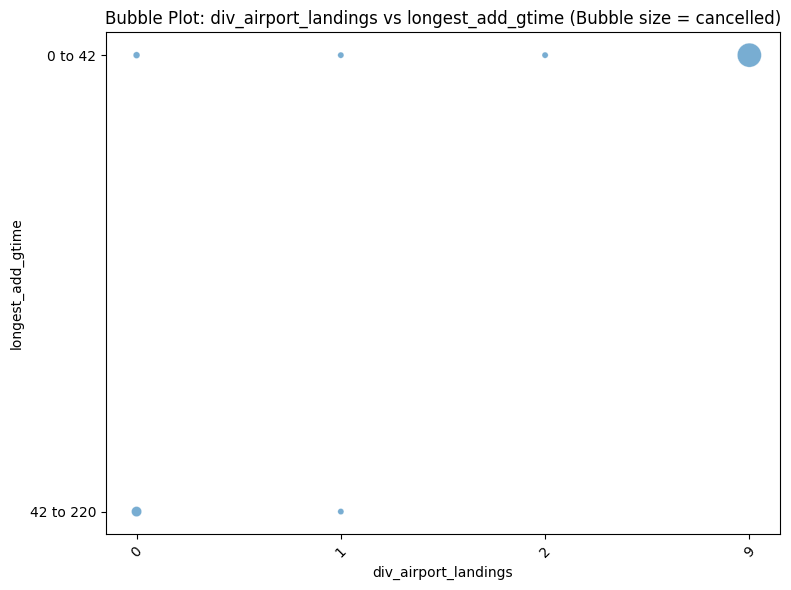

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


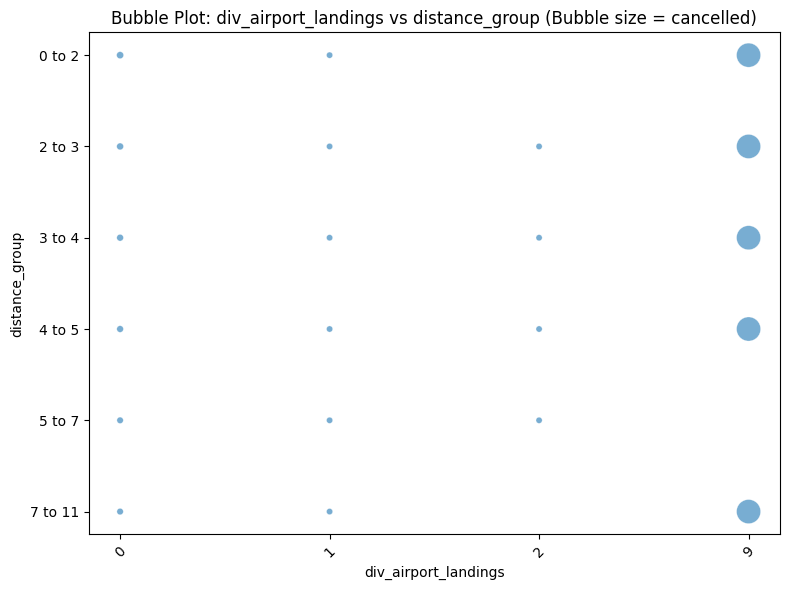

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


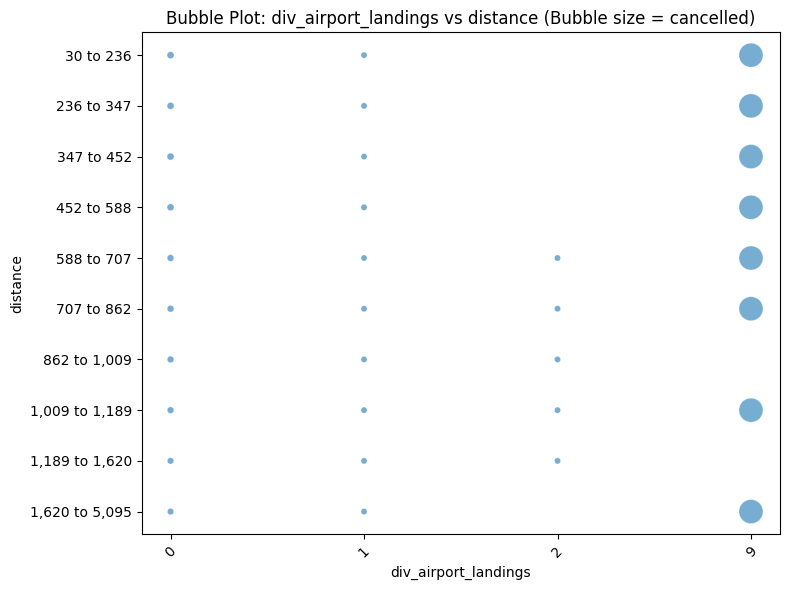

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


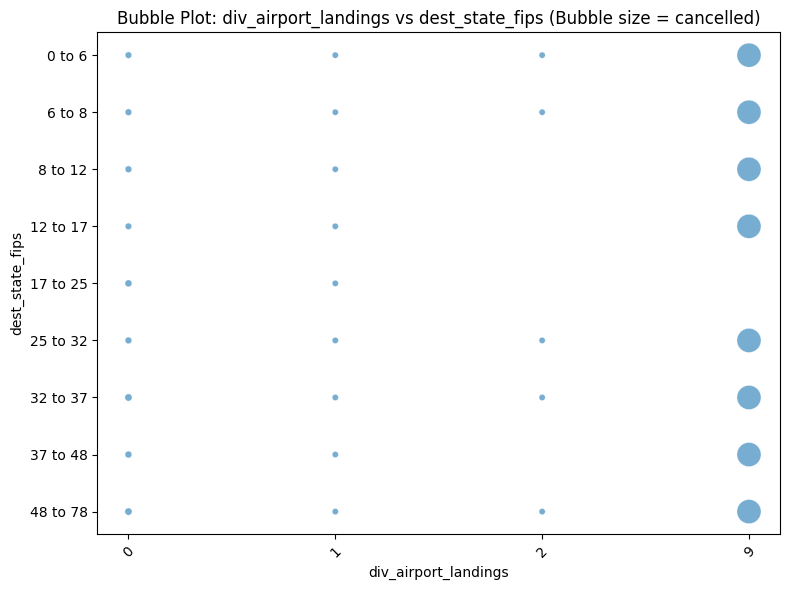

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


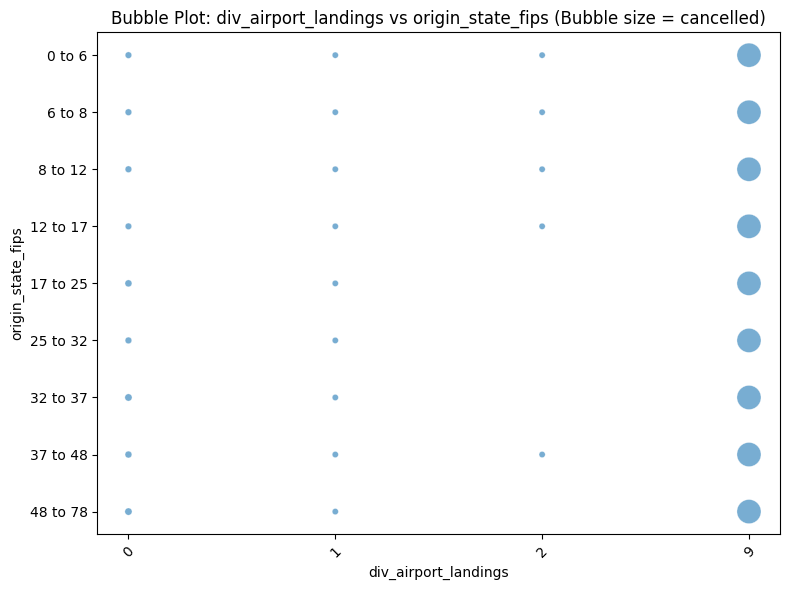

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


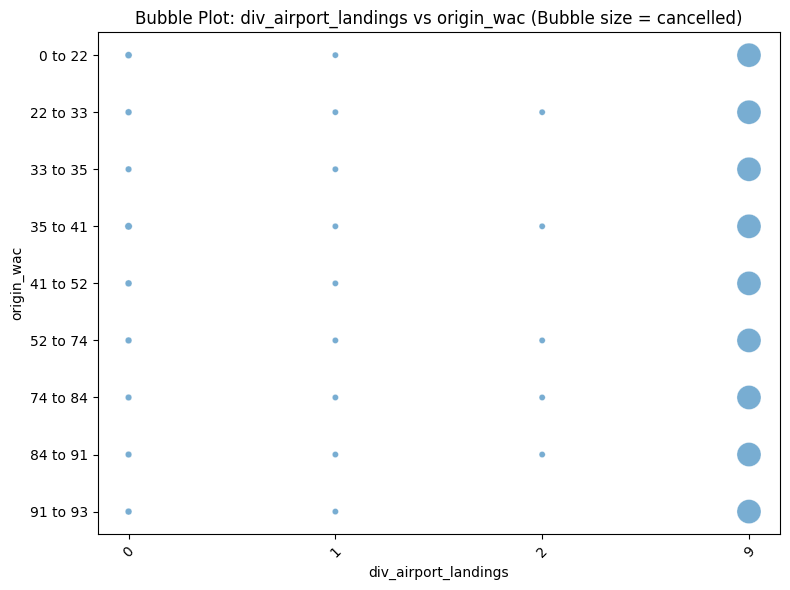

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


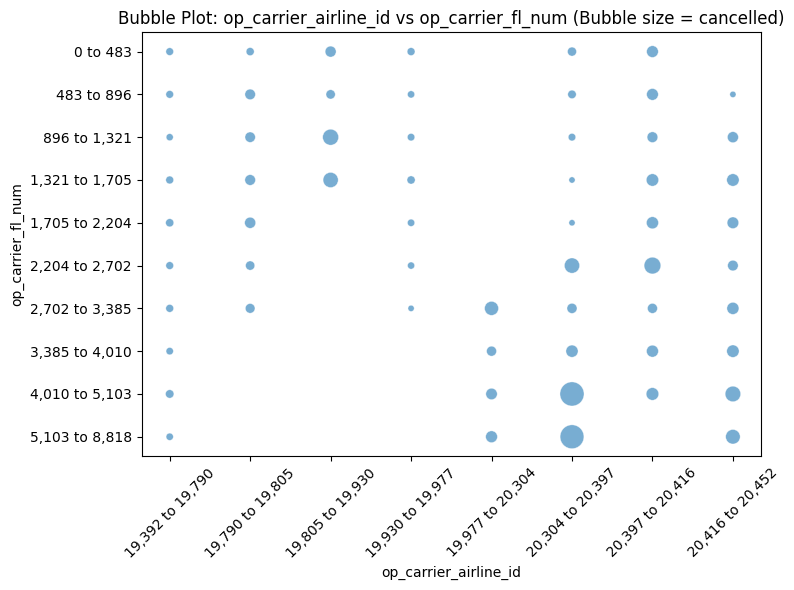

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


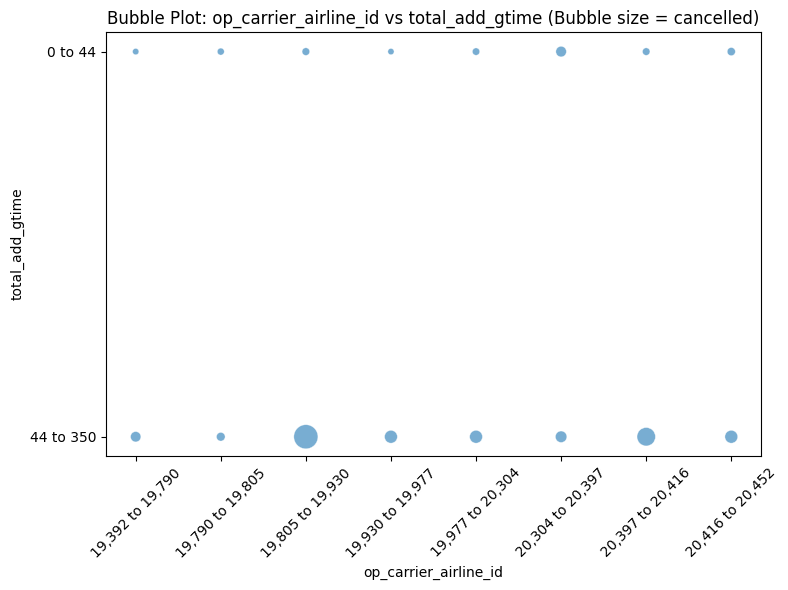

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


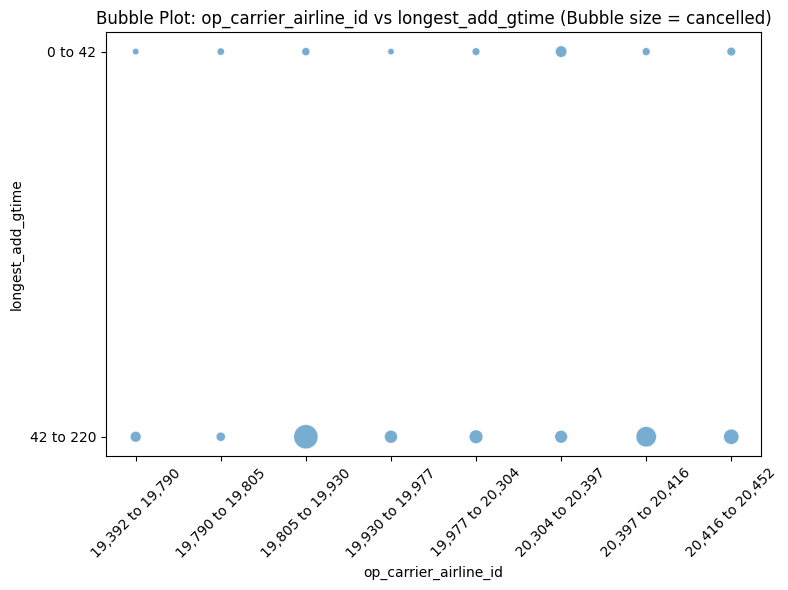

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


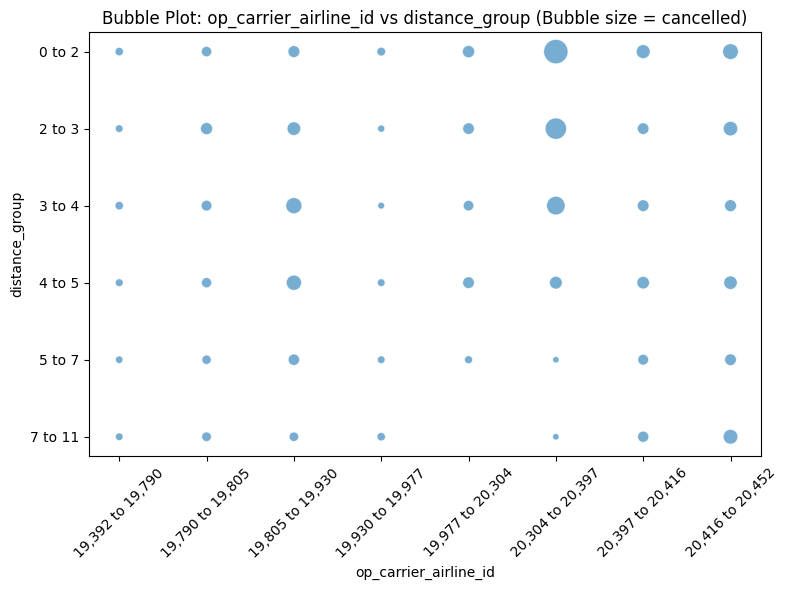

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


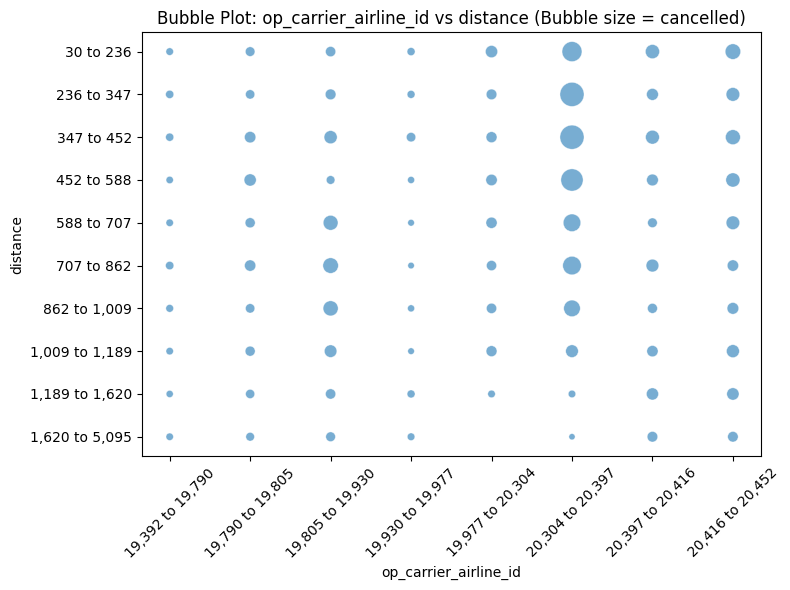

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


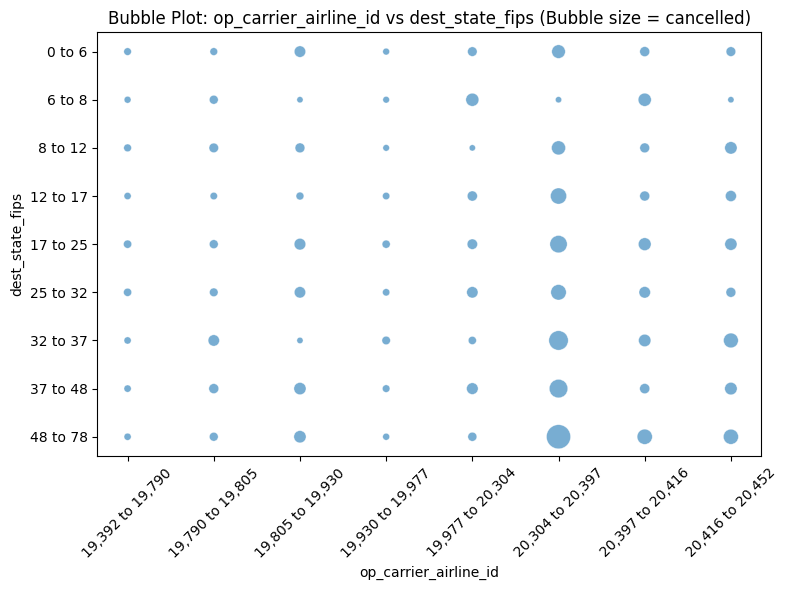

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


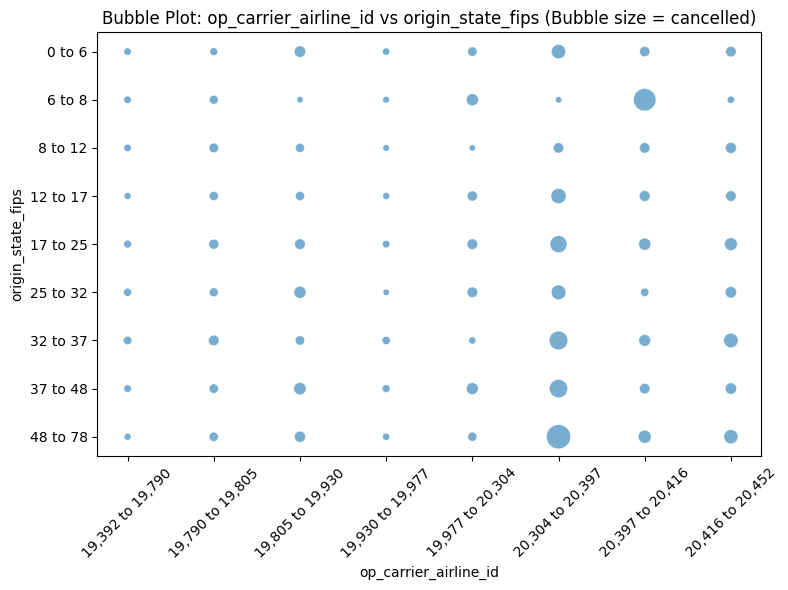

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


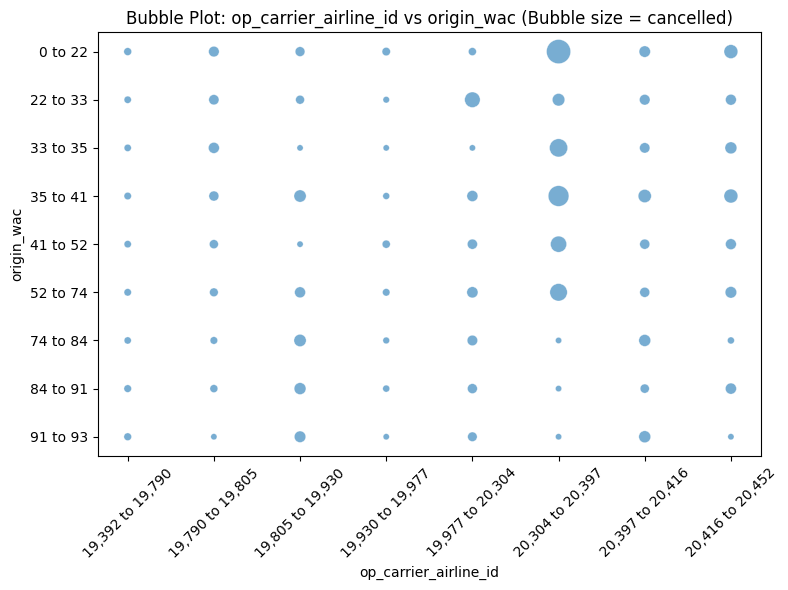

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


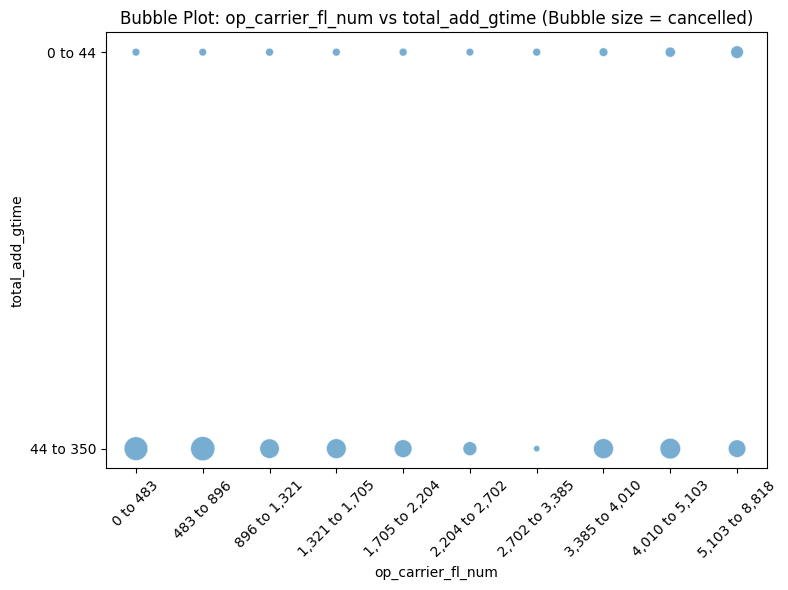

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


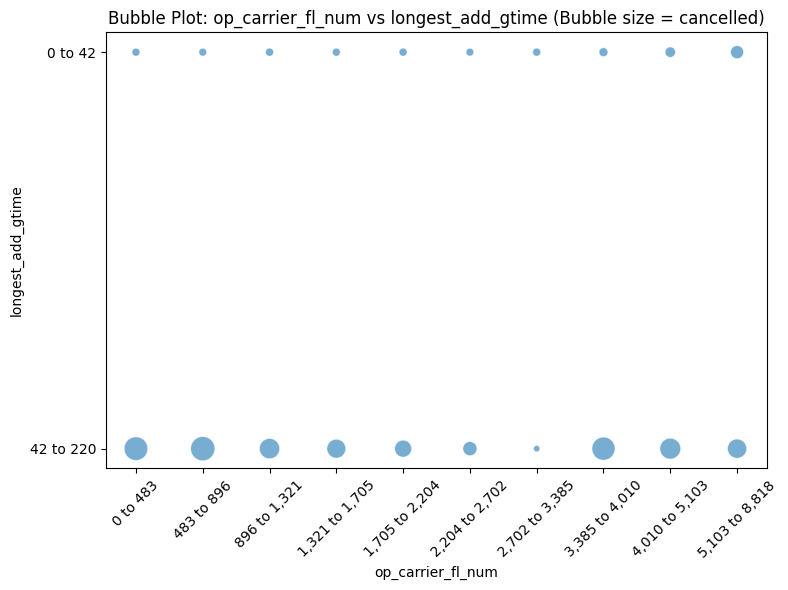

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


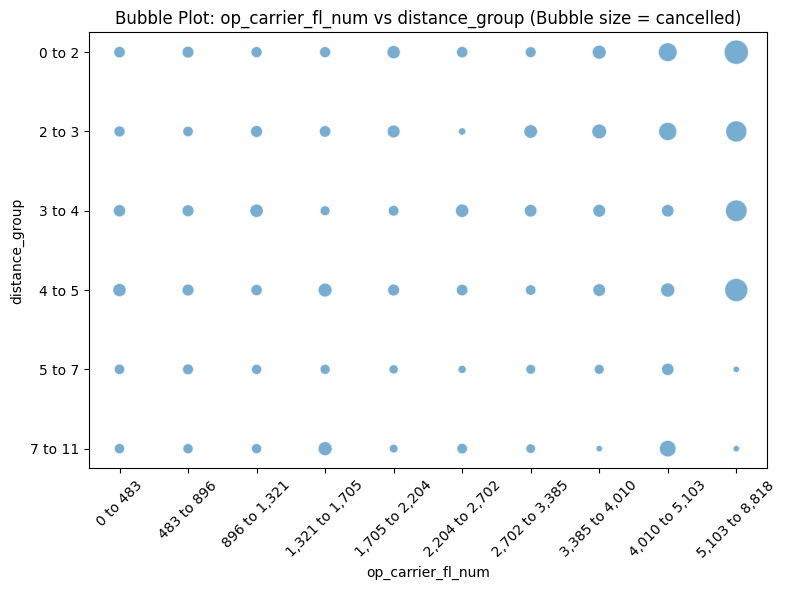

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


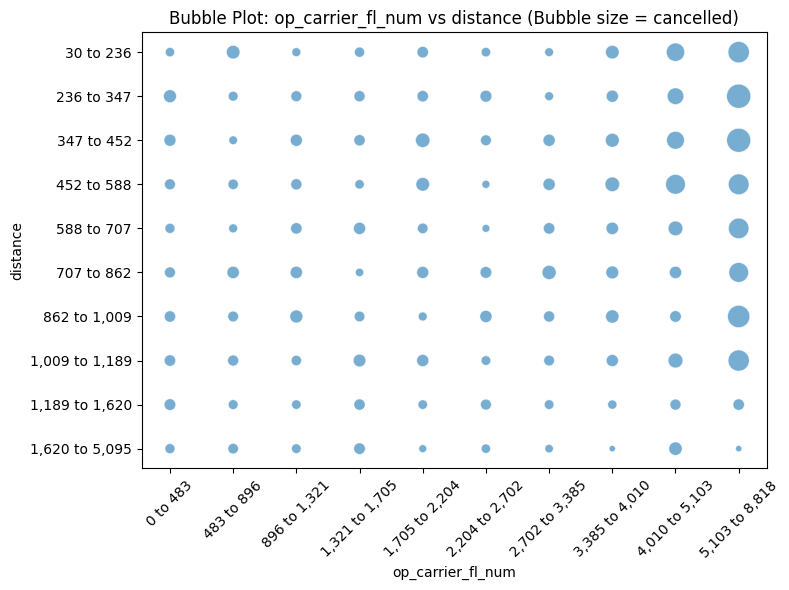

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


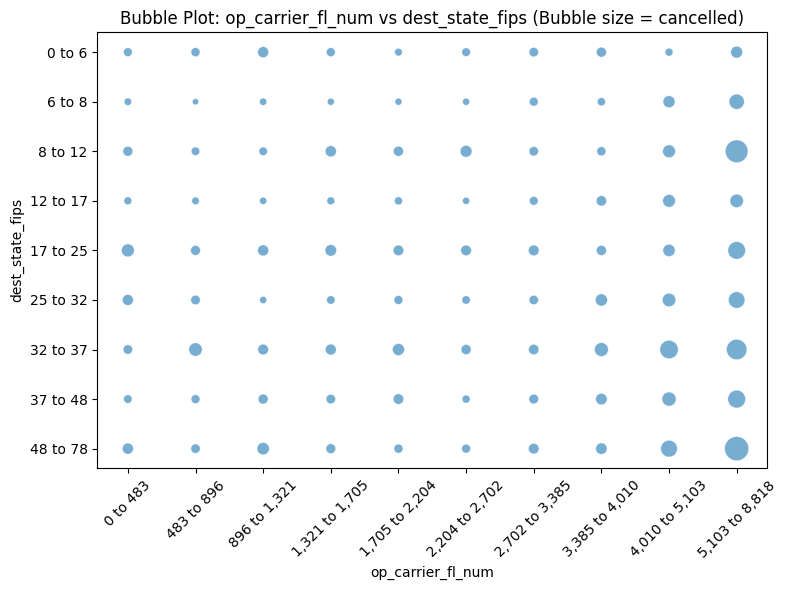

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


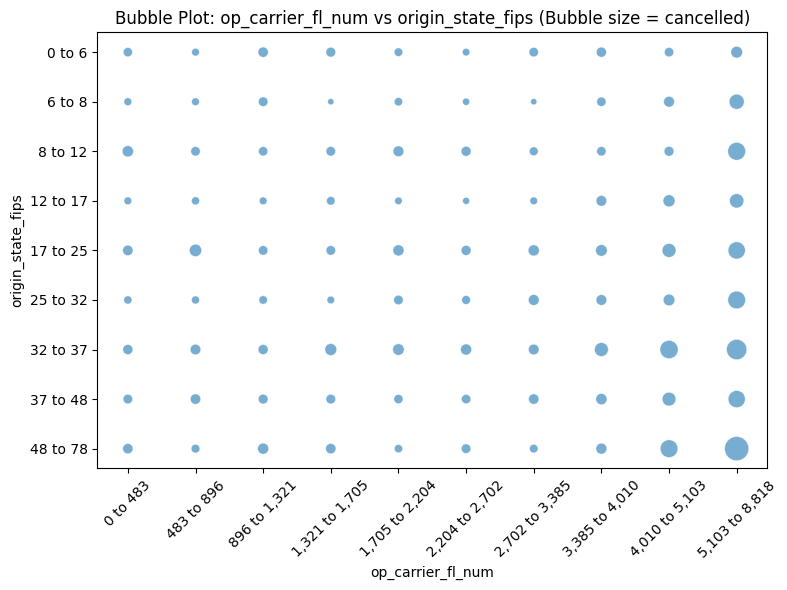

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


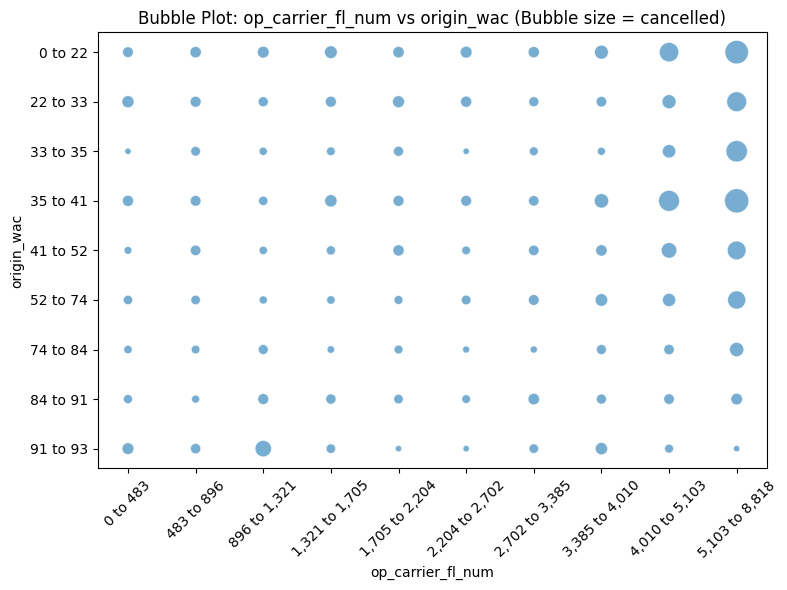

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


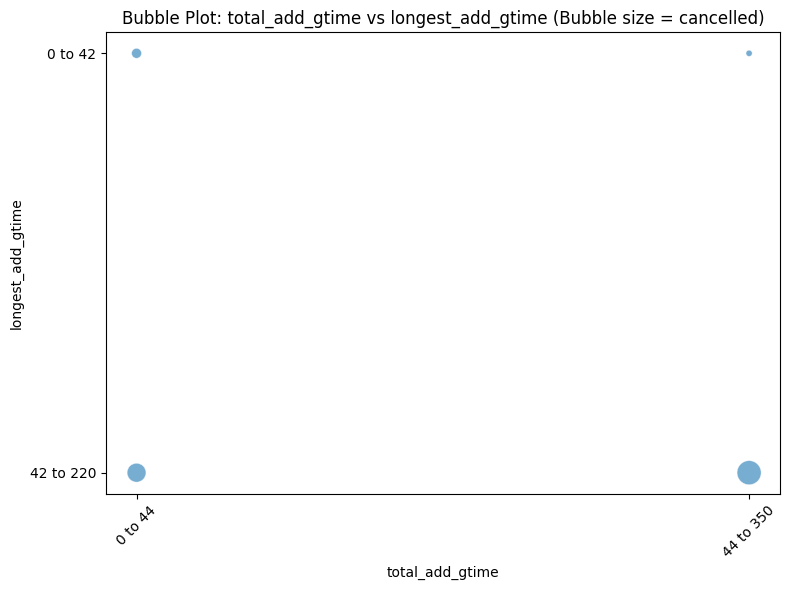

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


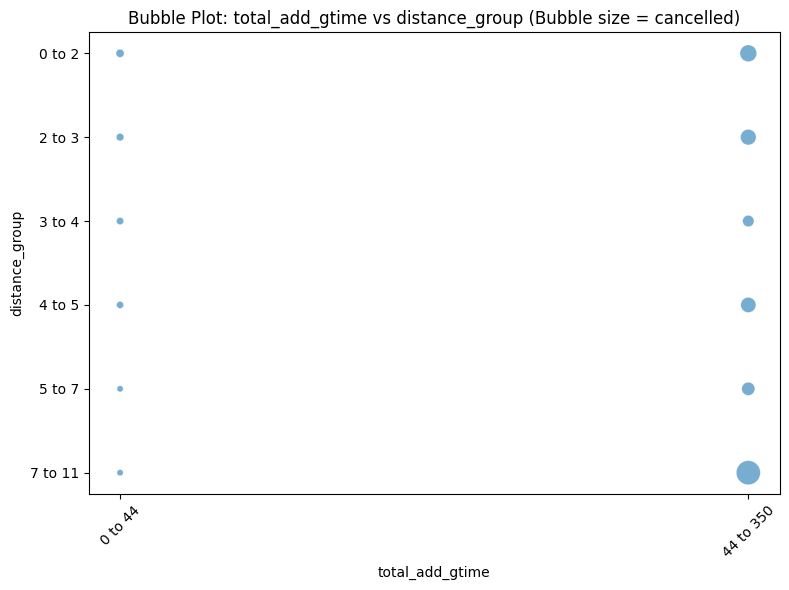

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


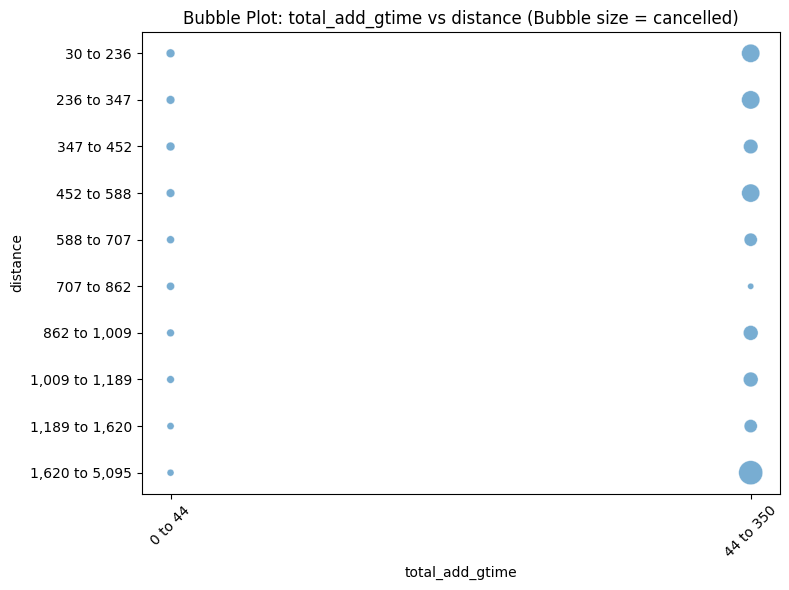

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


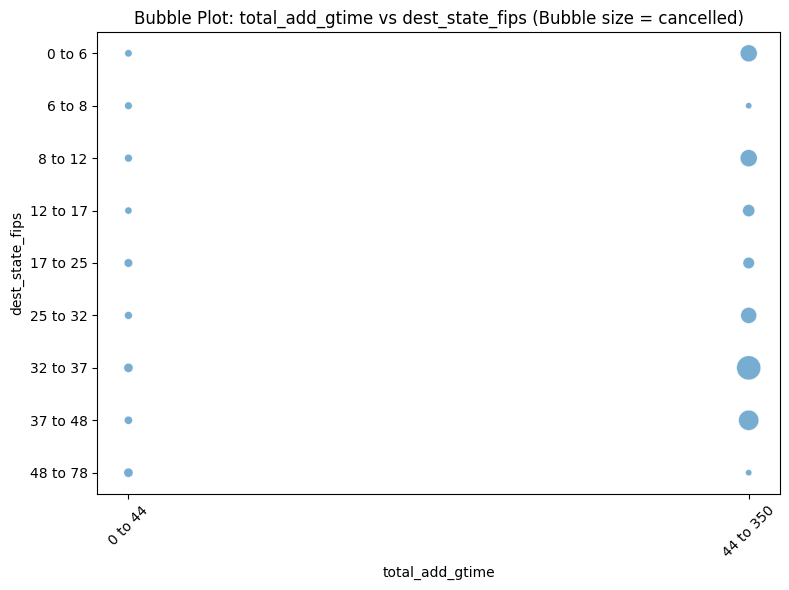

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


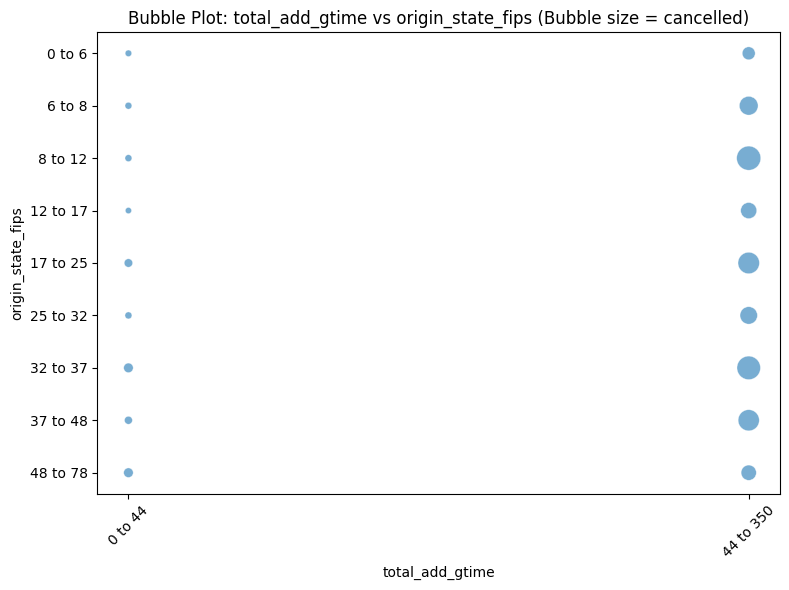

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


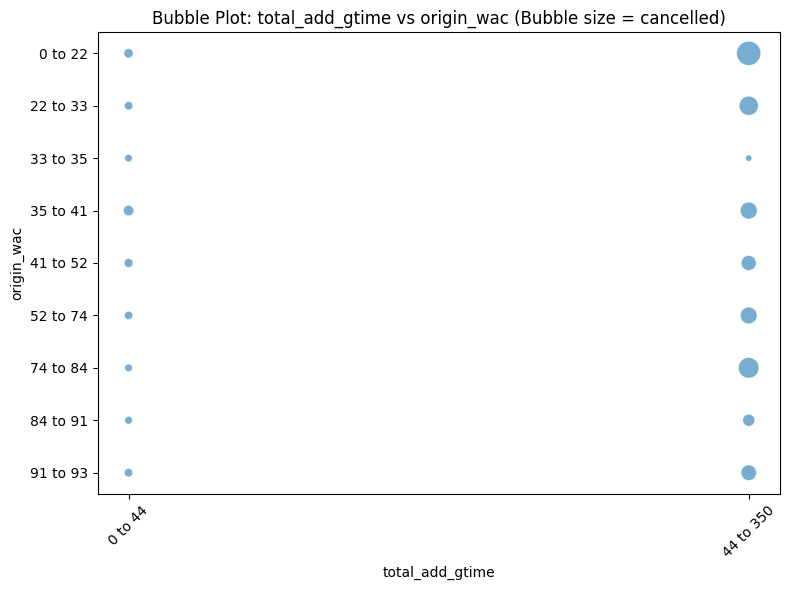

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


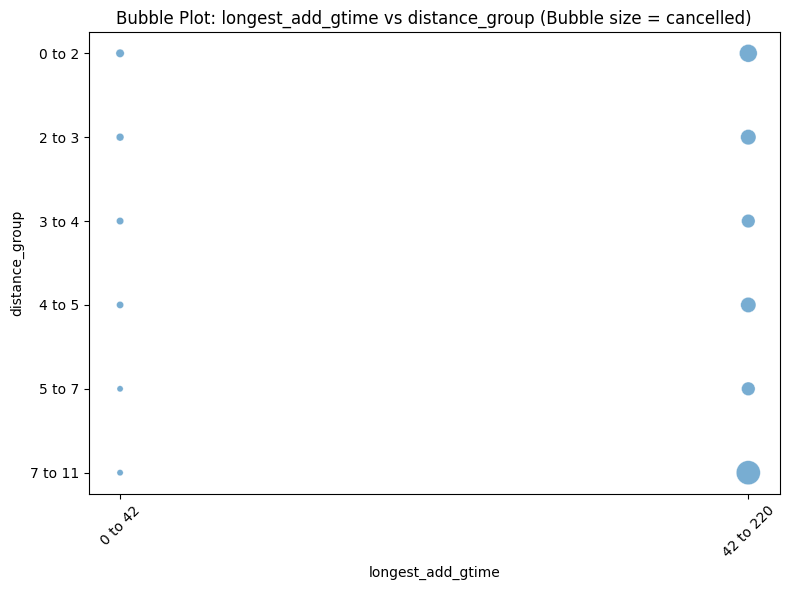

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


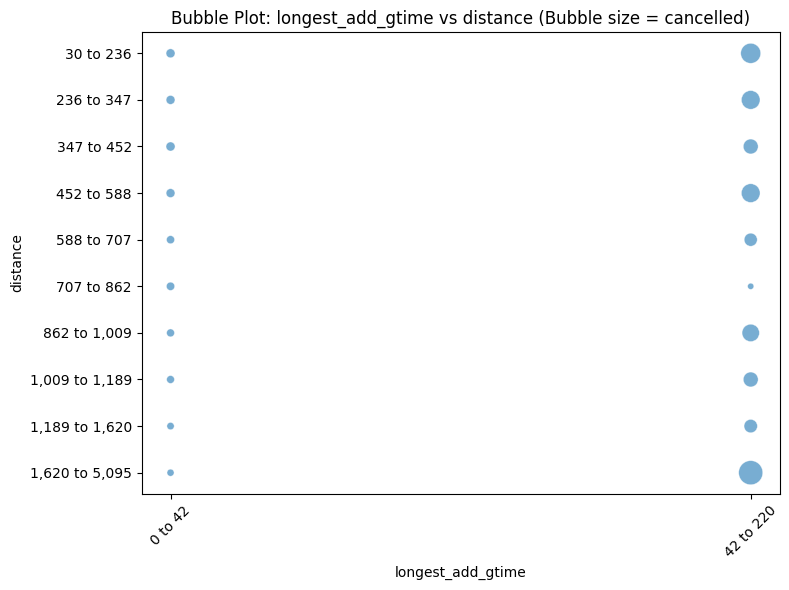

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


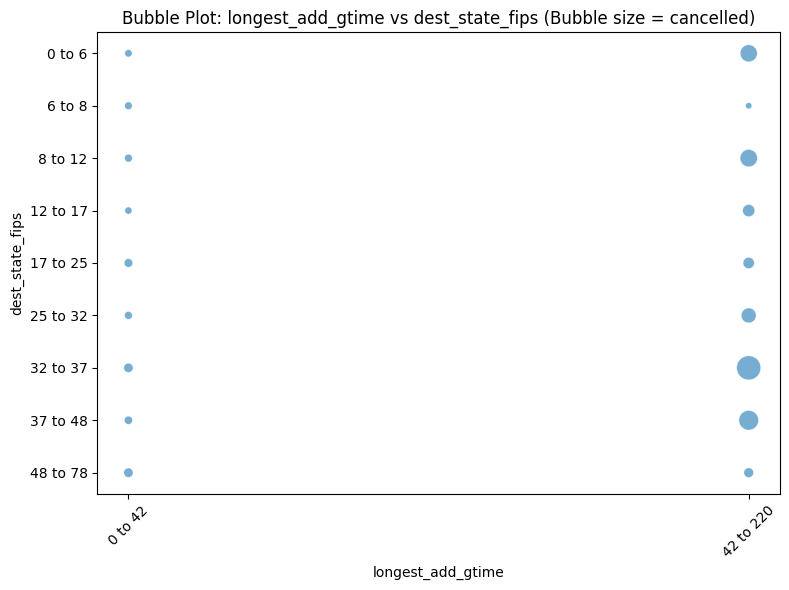

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


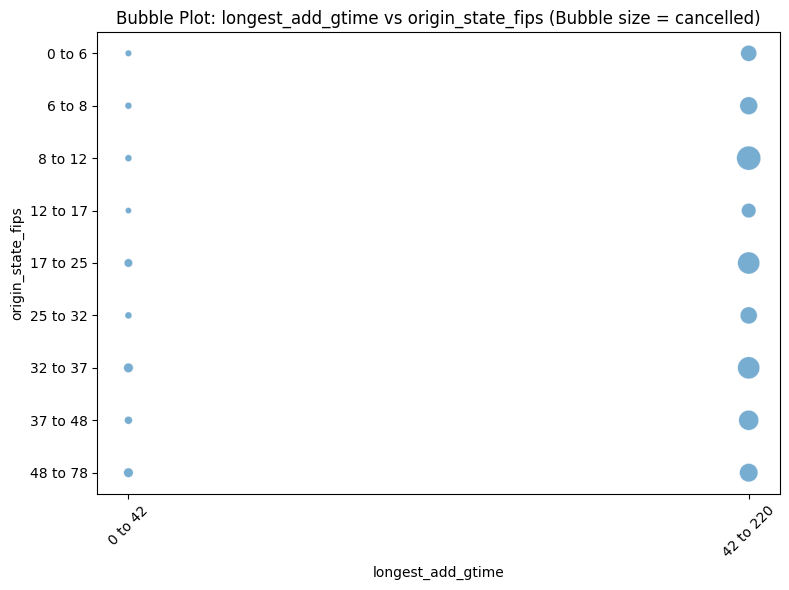

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


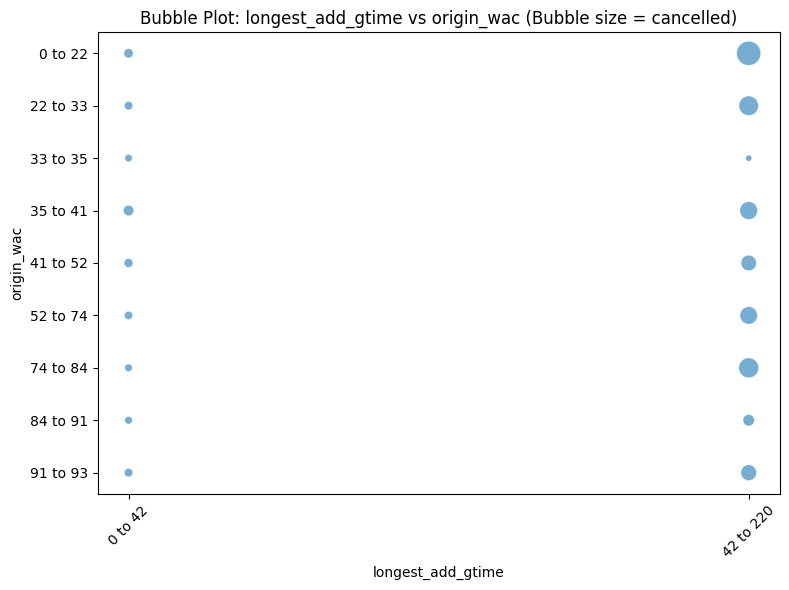

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


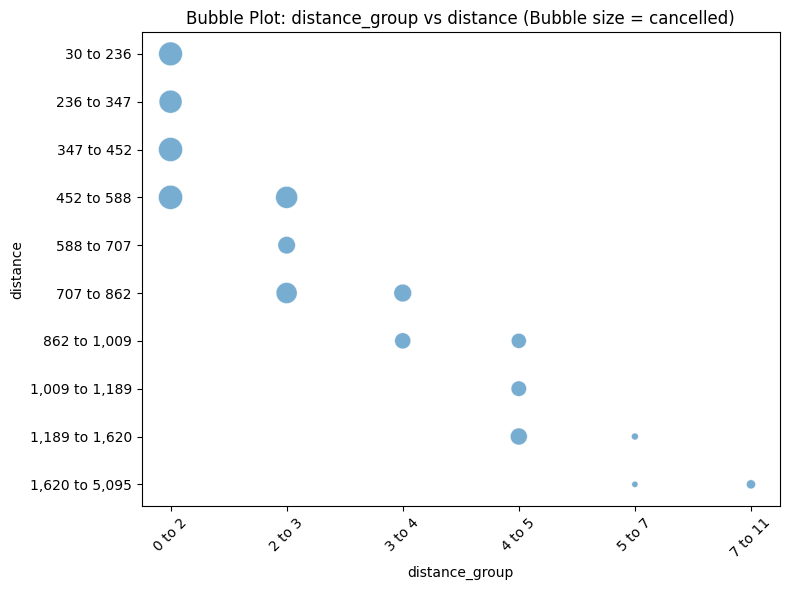

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


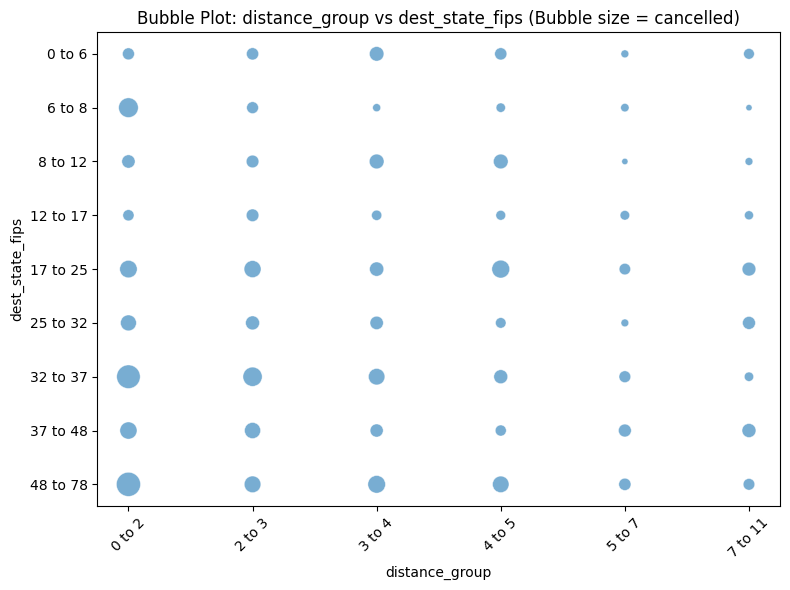

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


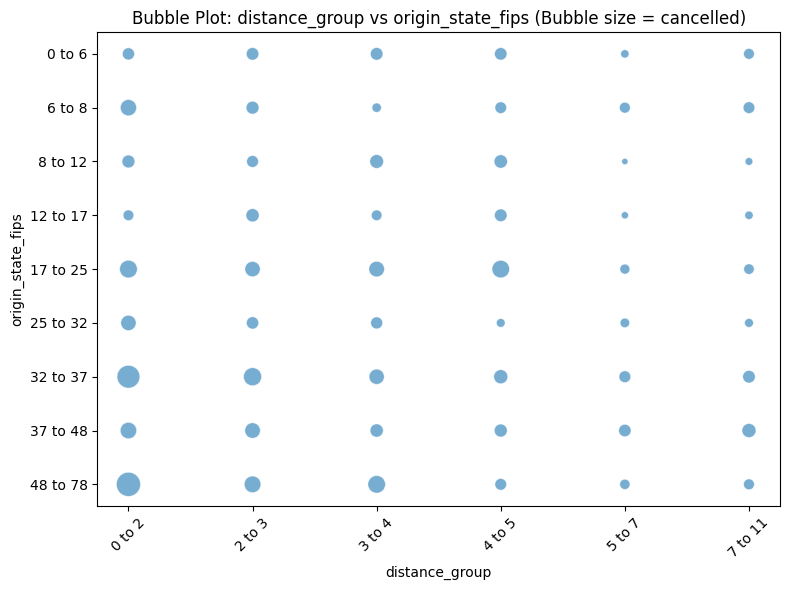

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


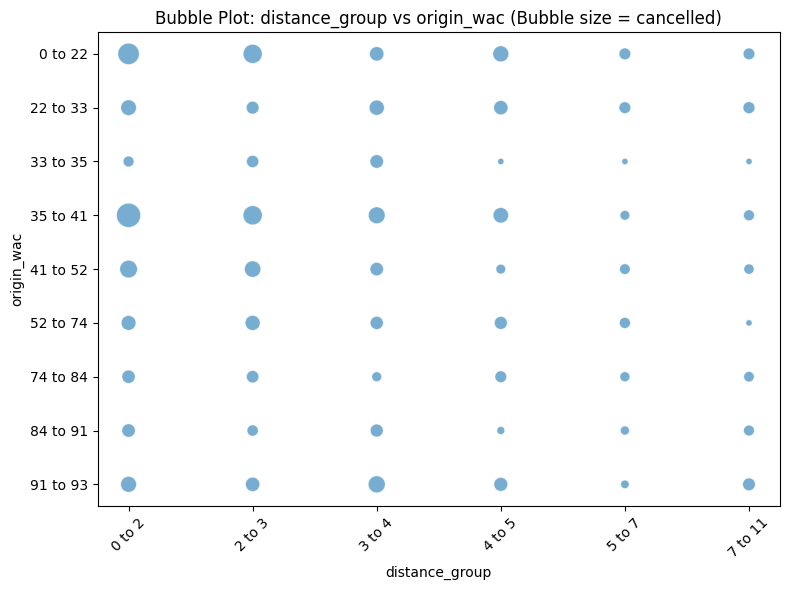

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


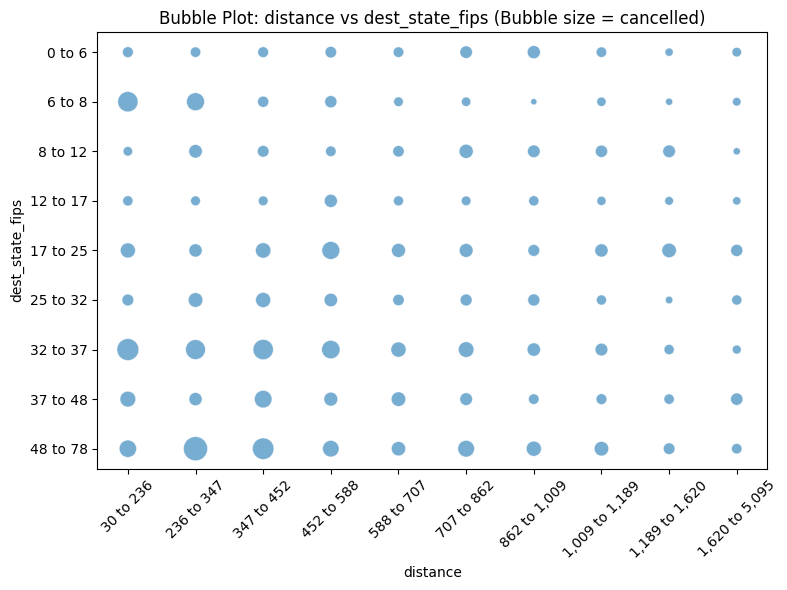

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


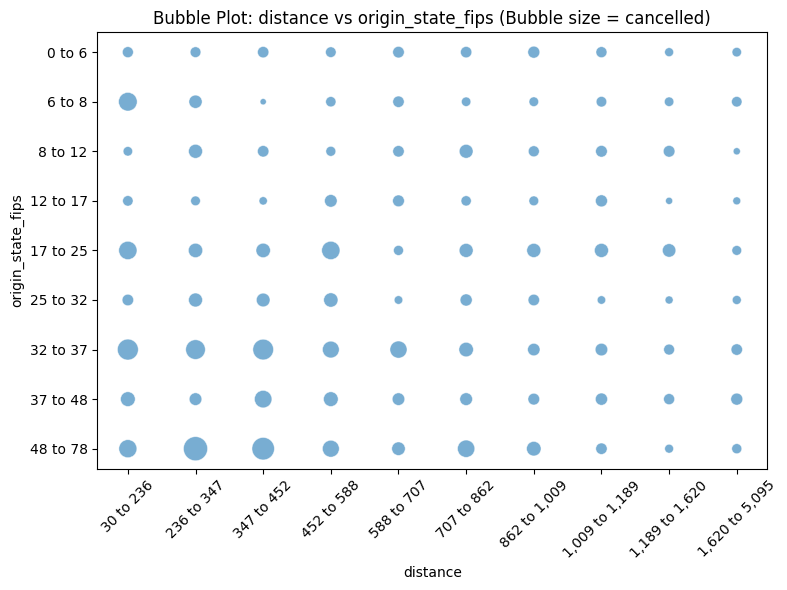

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


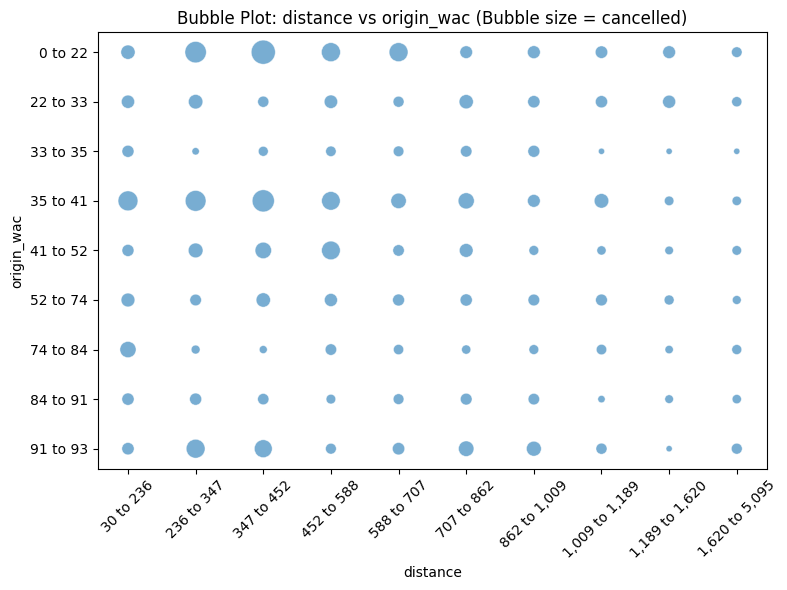

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


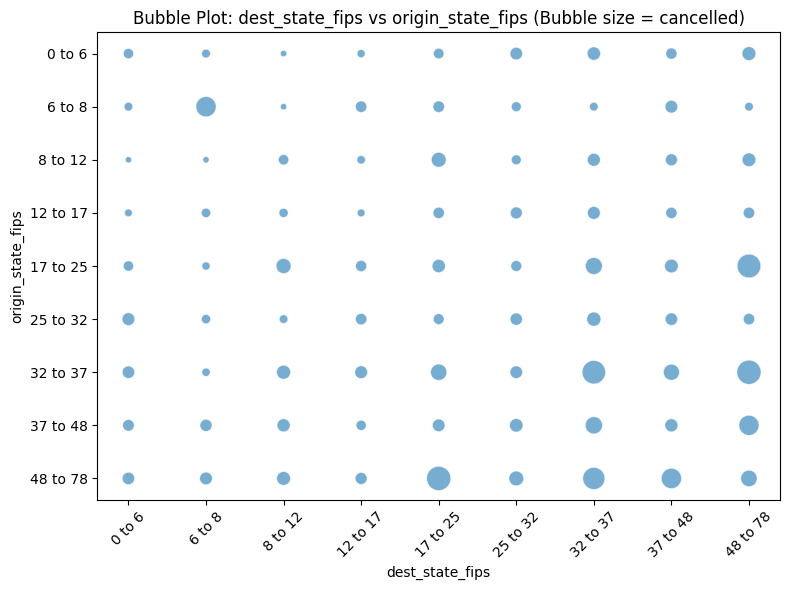

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


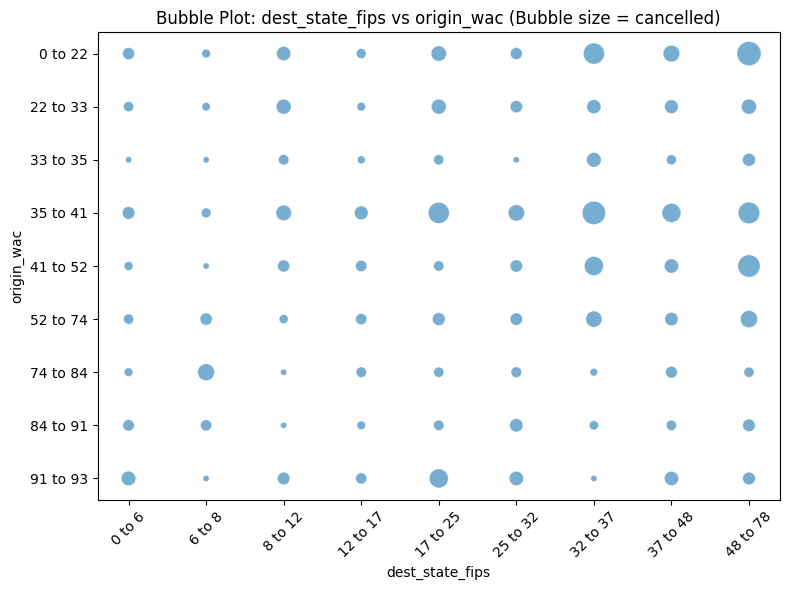

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


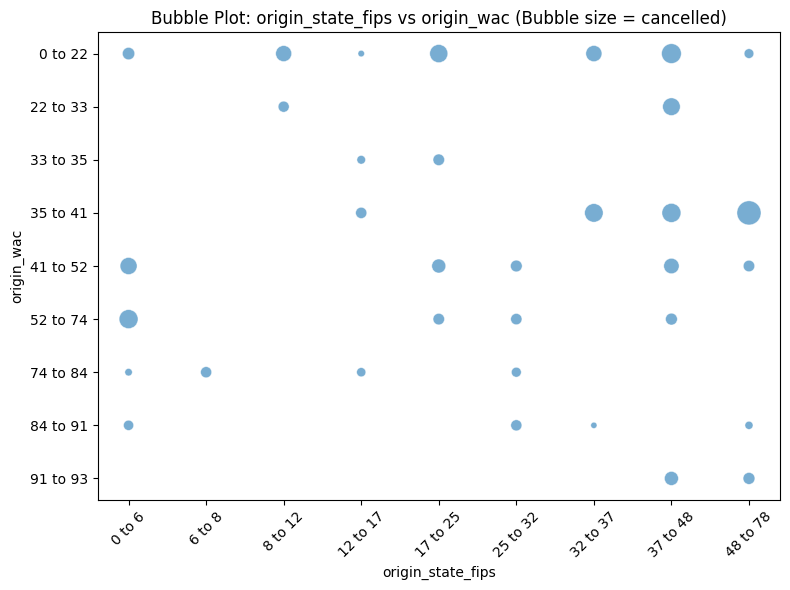

In [18]:
generate_top_binned_bubble_plots(
    df3_imp,
    target_variable="cancelled",
    bin_method="quantile",  # or "uniform"
    bins=10,
    top_n=10,
    unique_threshold=10  # adjust if needed
)


In [75]:

result = backward_selection(df3_imp, target_variable="dep_delay_new")
print(result["selected_features"])
print(result["final_r2"])
print(result["removal_history"])


['year', 'quarter', 'month', 'day_of_month', 'day_of_week', 'op_carrier_airline_id', 'op_carrier_fl_num', 'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id', 'origin_state_fips', 'origin_wac', 'dest_airport_id', 'dest_airport_seq_id', 'dest_city_market_id', 'dest_state_fips', 'dest_wac', 'crs_dep_time', 'dep_time', 'dep_del15', 'dep_delay_group', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay', 'arr_delay_new', 'arr_del15', 'arr_delay_group', 'cancelled', 'diverted', 'crs_elapsed_time', 'actual_elapsed_time', 'air_time', 'flights', 'distance', 'distance_group', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'first_dep_time', 'total_add_gtime', 'longest_add_gtime', 'div_airport_landings', 'div_reached_dest', 'div_actual_elapsed_time', 'div_arr_delay', 'div_distance', 'div1_airport_id', 'div1_airport_seq_id', 'div1_wheels_on', 'div1_total_gtime', 'div1_longest_gtime', 'div1_wheels_off', 

In [19]:
df = df3_imp.copy()

columns_to_drop = [
    # Flight identifiers
    'fl_date', 'tail_num', 'op_carrier_airline_id', 'op_carrier_fl_num',

    # Origin details
    'origin_airport_id', 'origin_airport_seq_id', 'origin_city_market_id',
    'origin_city_name', 'origin_state_abr', 'origin_state_fips', 'origin_state_nm',
    'origin_wac',

    # Destination details
    'dest', 'dest_airport_id', 'dest_airport_seq_id', 'dest_city_market_id',
    'dest_city_name', 'dest_state_abr', 'dest_state_fips', 'dest_state_nm',
    'dest_wac',

    # Delay and time metrics
    'dep_time', 'dep_delay', 'dep_delay_new', 'dep_del15', 'dep_delay_group', 'dep_time_blk',
    'arr_time', 'arr_delay', 'arr_delay_new', 'arr_del15', 'arr_delay_group', 'arr_time_blk',
    'taxi_in', 'taxi_out', 'air_time', 'actual_elapsed_time', 'crs_arr_time', 'crs_dep_time',
    'crs_elapsed_time', 'wheels_off', 'wheels_on',

    # Cancellation
    'cancellation_code',

    # Other
    'flights'
]


# Drop specified columns if they exist in the DataFrame
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns], errors='ignore')

# Drop columns that start with 'div'
df = df.drop(columns=[col for col in df.columns if col.startswith('div')], errors='ignore')

# Drop columns where more than 95% of the values are null
threshold = 0.95
df = df.dropna(axis=1, thresh=int((1 - threshold) * len(df)))

# Mean imputation for missing values
df = df.fillna(df.mean(numeric_only=True))

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df = df.drop(columns=categorical_cols, errors='ignore')


df_usdot_clean = df.copy()


Analyzing dataset: USDOT Ontime Flight Dataset
Explained variance ratio: [0.9859622  0.00621106 0.00424696]
Principal component vectors:
 [[ 2.79915047e-19 -3.23905399e-18  0.00000000e+00  7.02337059e-05
   4.39338799e-05 -7.77095950e-06  9.99992097e-01  3.83982120e-03
   2.64836194e-06 -3.35260471e-04  6.03354383e-04  2.56910185e-06
  -7.60275060e-04  2.92732019e-05 -3.91497498e-06 -1.50934642e-05]
 [ 5.52865704e-13  7.99360578e-15  1.52933222e-14  8.65953906e-04
  -1.48557021e-05  4.86295534e-05 -1.60159001e-05  4.06396620e-05
   3.66577237e-02 -1.90798308e-03  7.37281976e-03  4.19310458e-04
   2.45124635e-02  9.98997205e-01 -9.92201903e-04 -1.43413731e-04]
 [-4.41509475e-14  6.93889390e-17 -1.33226763e-15  1.43264663e-03
  -1.86633146e-04 -2.29805414e-06 -4.31617649e-05 -3.15295669e-05
   9.95717287e-01 -1.45194574e-02 -3.56350419e-02 -2.98978010e-04
  -7.65931022e-02 -3.44204447e-02  3.19071229e-03  1.66807139e-03]]


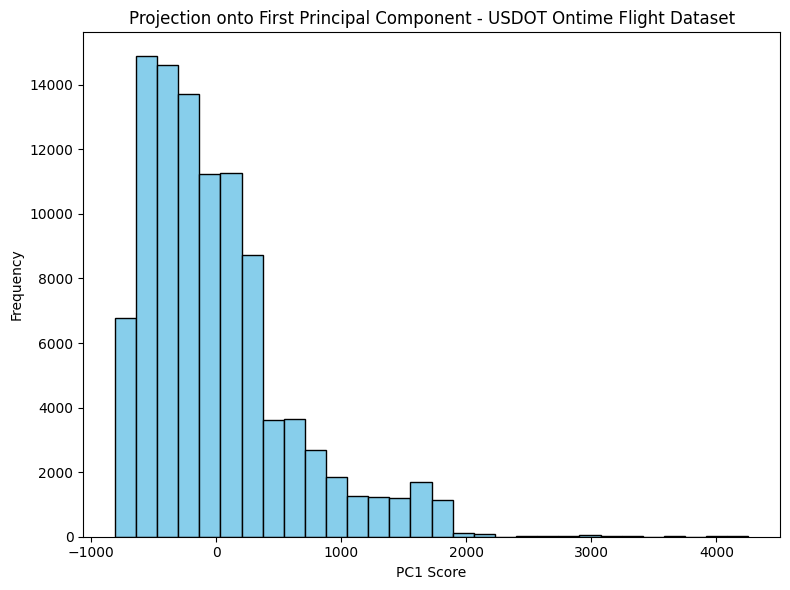

R² scores for predicting each numeric feature from others:
year: 1.0000
quarter: 1.0000
month: 1.0000
distance_group: 0.9693
distance: 0.9693
longest_add_gtime: 0.9419
total_add_gtime: 0.9418
nas_delay: 0.0284
late_aircraft_delay: 0.0201
weather_delay: 0.0198
carrier_delay: 0.0175
cancelled: 0.0072
first_dep_time: 0.0054
day_of_month: 0.0035
day_of_week: 0.0032
security_delay: 0.0015
Number of outliers detected (z-score > 3): 7328

Summary for USDOT Ontime Flight Dataset:
Numeric columns: 16
Categorical columns: 0
Top R² prediction: year with R² = 1.0000
First principal component explains 98.60% of the variance.


C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:61: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = np.abs(zscore(df[numeric_cols]))


In [20]:
analyze_dataset(df_usdot_clean, "USDOT Ontime Flight Dataset")

Top 20 features most correlated with 'cancelled':
total_add_gtime: 0.0679
longest_add_gtime: 0.0621
distance_group: 0.0391
distance: 0.0388
first_dep_time: 0.0193
day_of_month: 0.0121
day_of_week: 0.0102
nas_delay: 0.0000
carrier_delay: 0.0000
late_aircraft_delay: 0.0000
weather_delay: 0.0000
security_delay: 0.0000
year: nan
quarter: nan
month: nan


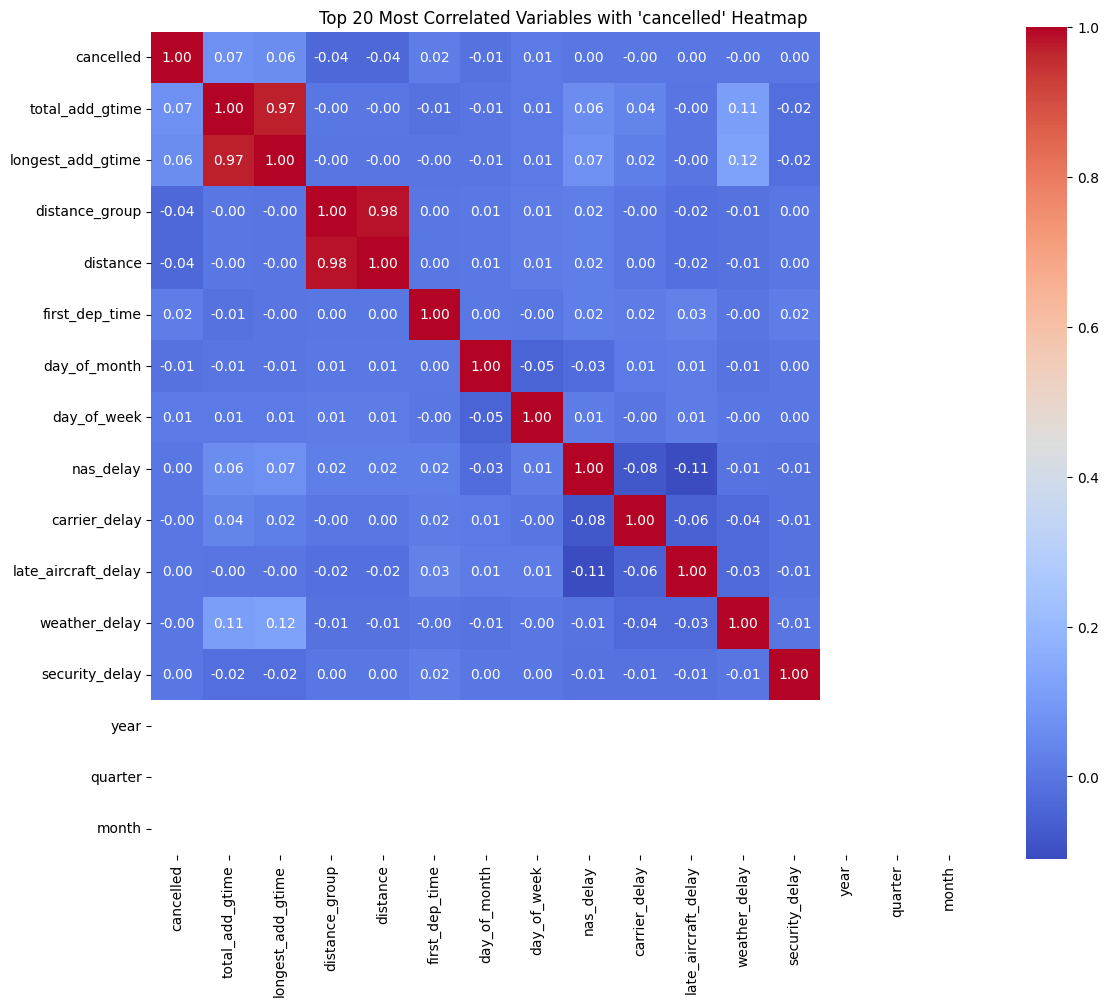

In [23]:
plot_top_correlated_heatmap(df_usdot_clean,'cancelled', 20)

C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\tyler.brantingham\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932

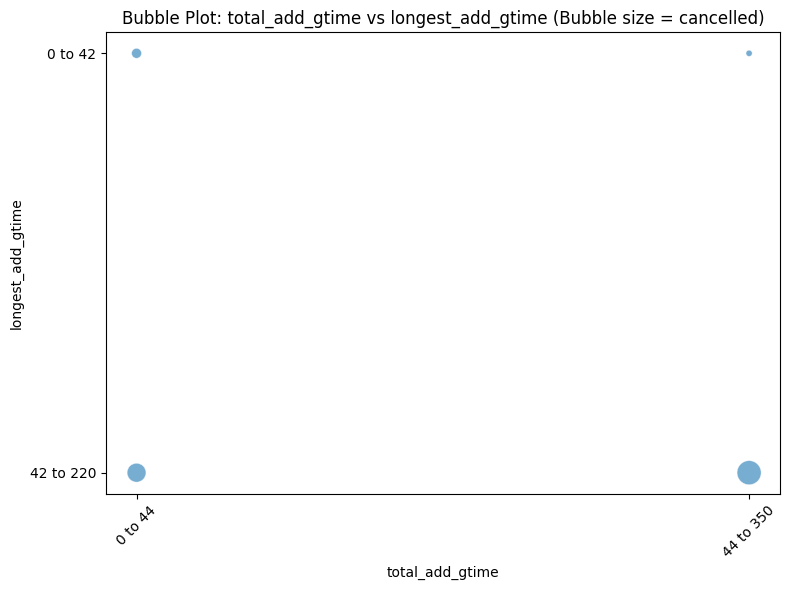

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


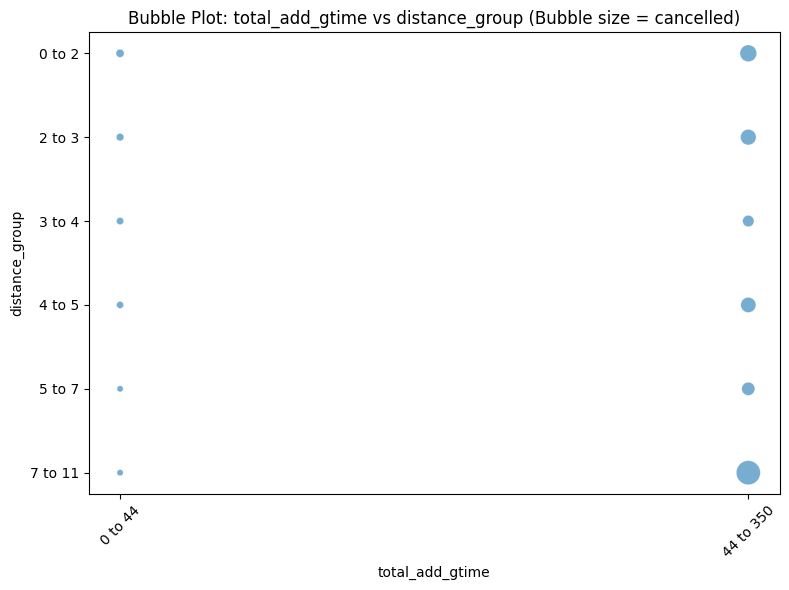

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


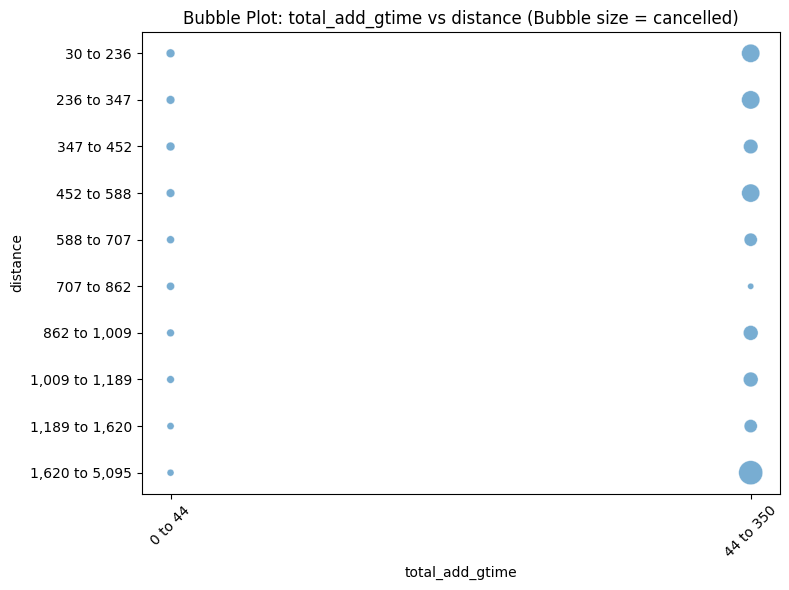

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


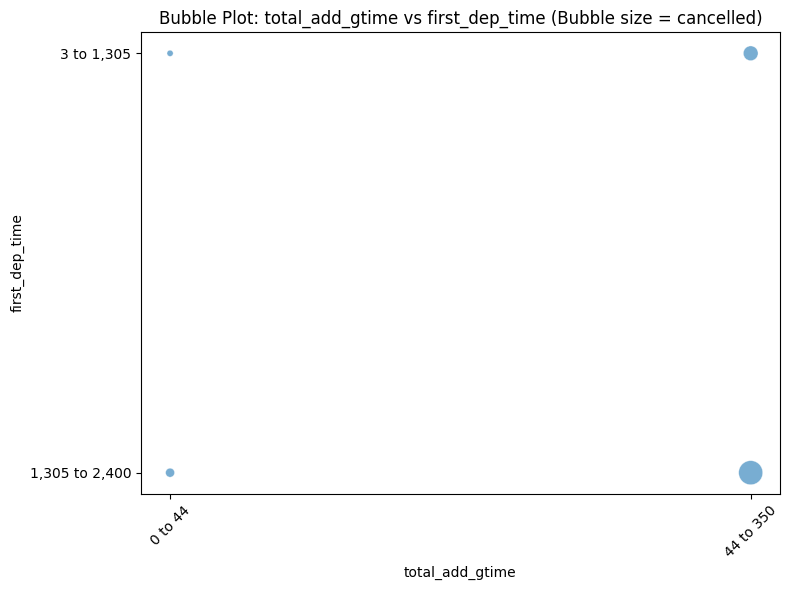

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


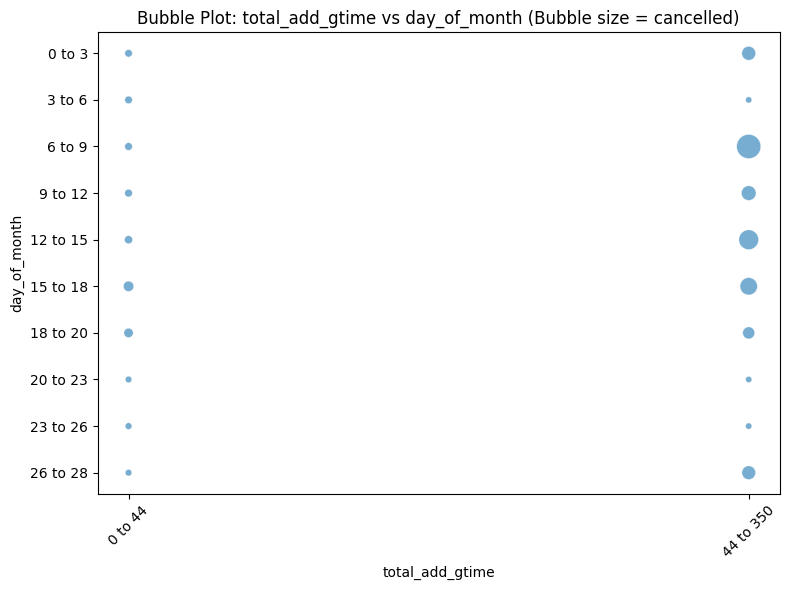

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


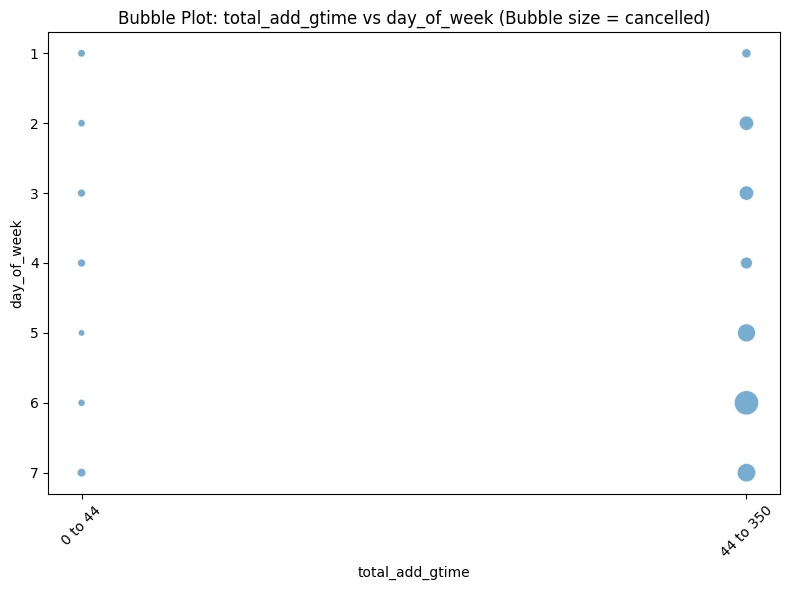

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


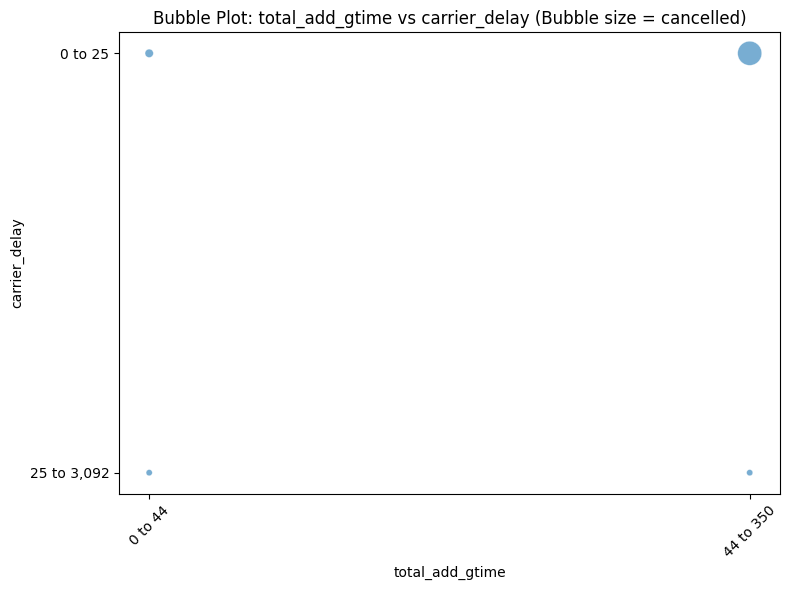

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


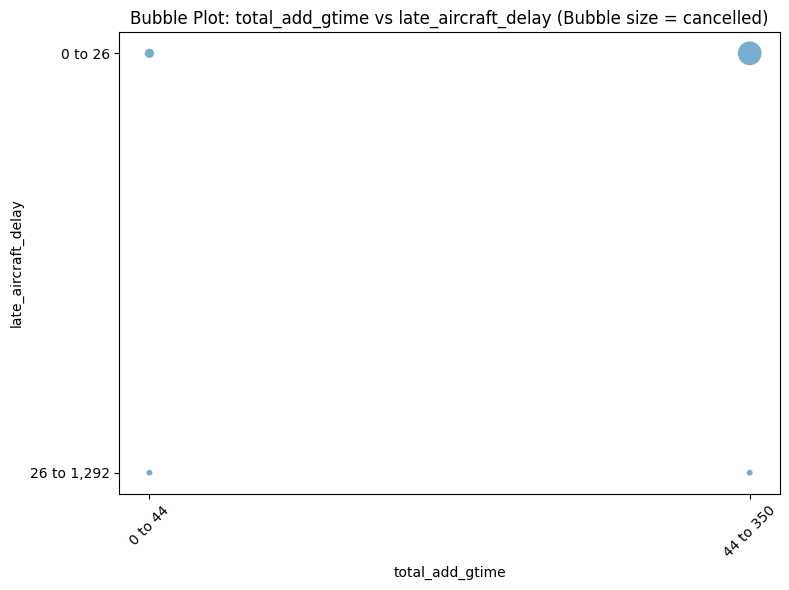

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


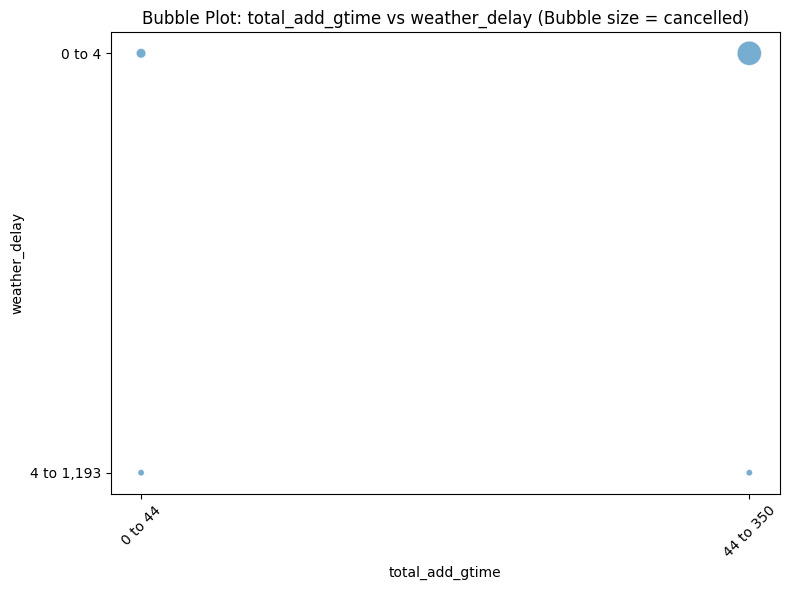

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


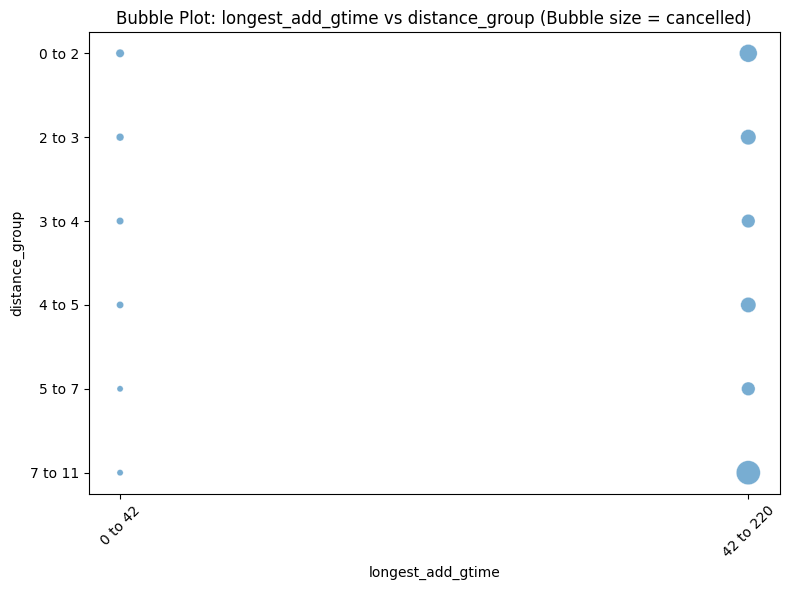

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


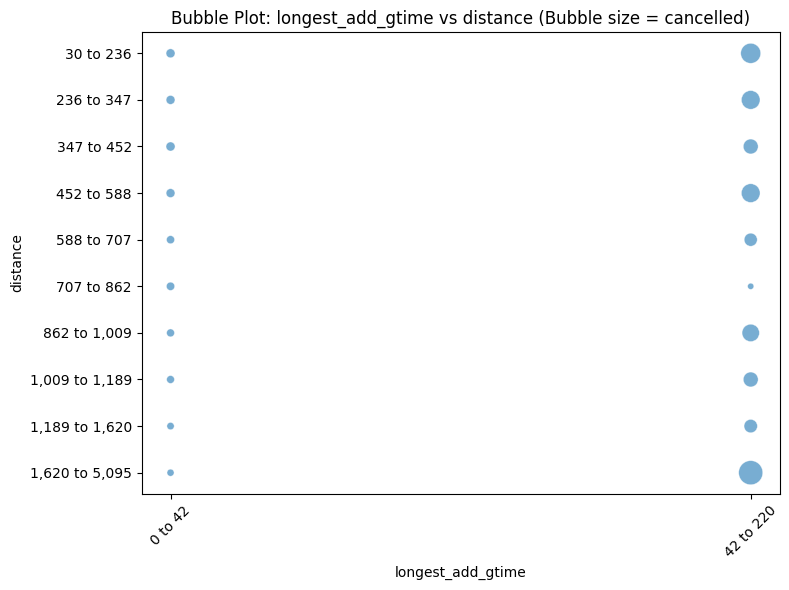

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


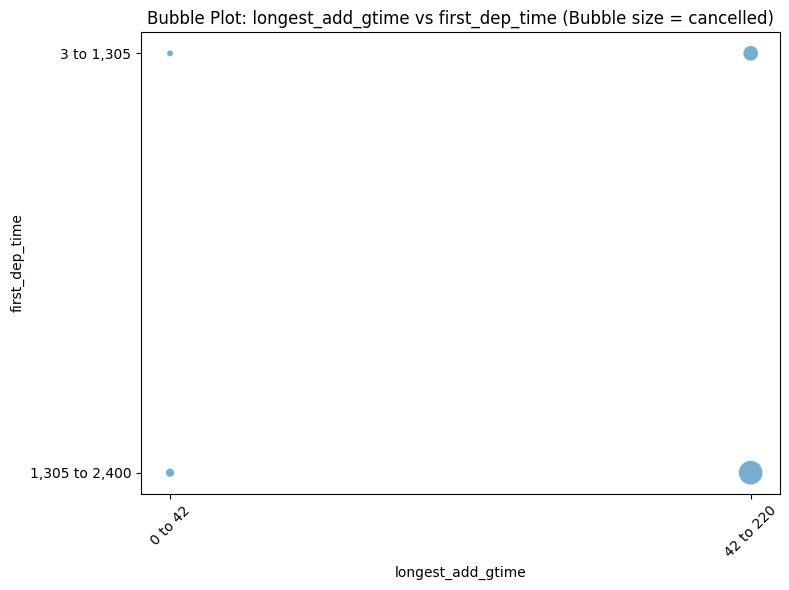

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


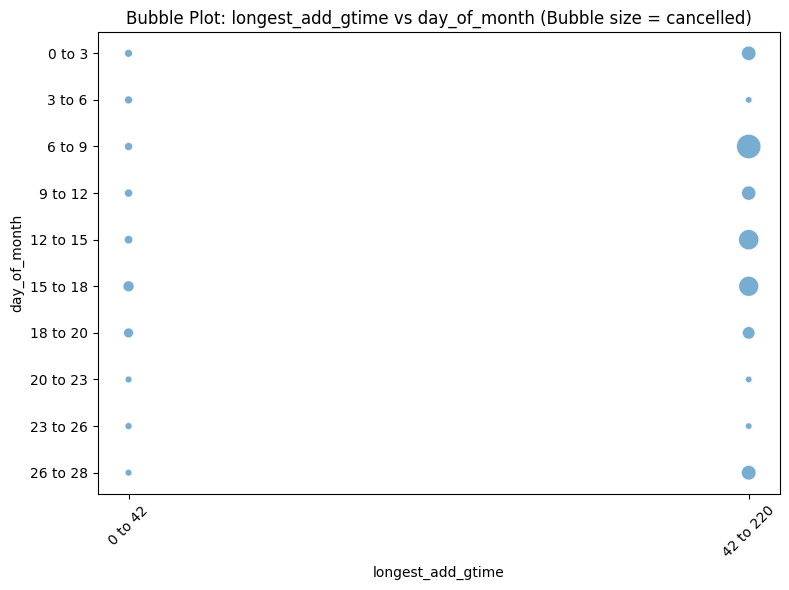

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


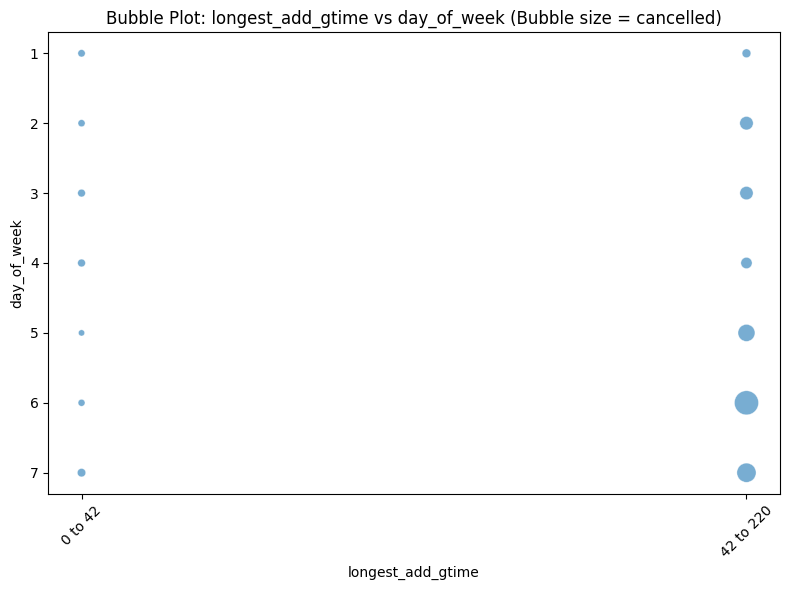

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


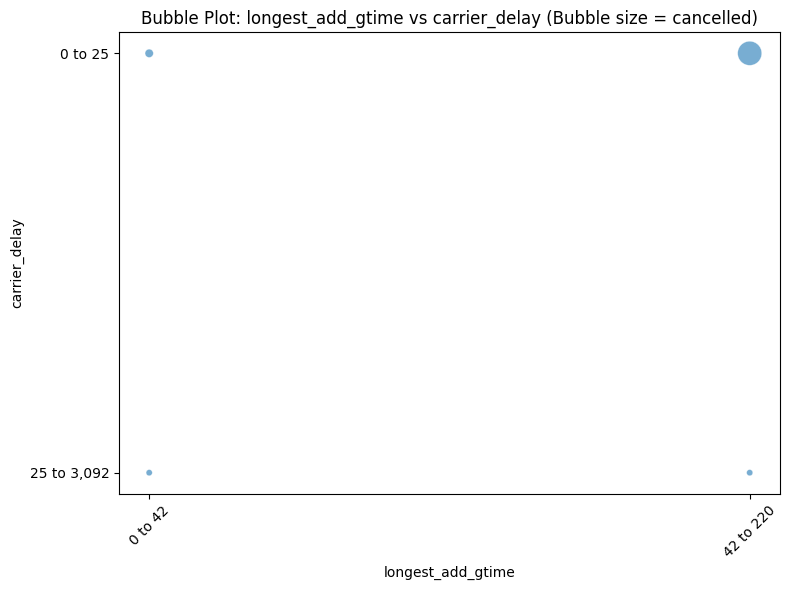

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


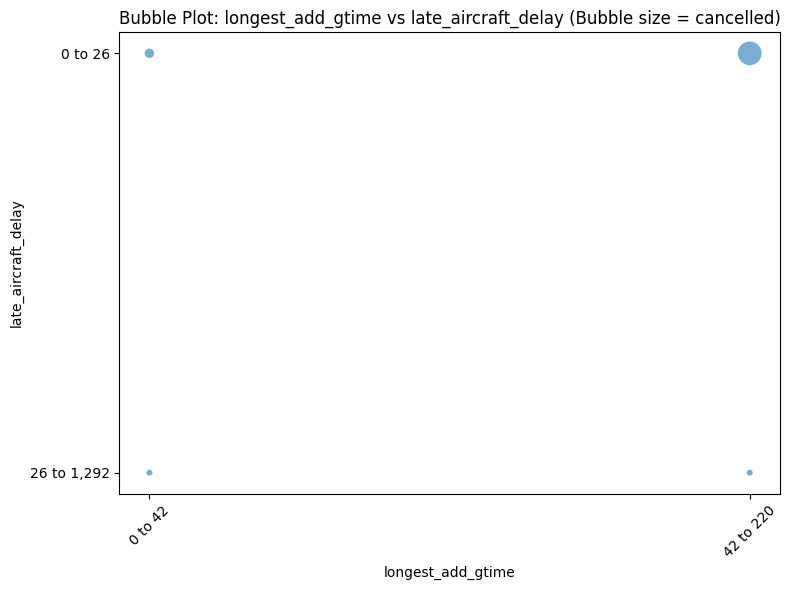

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


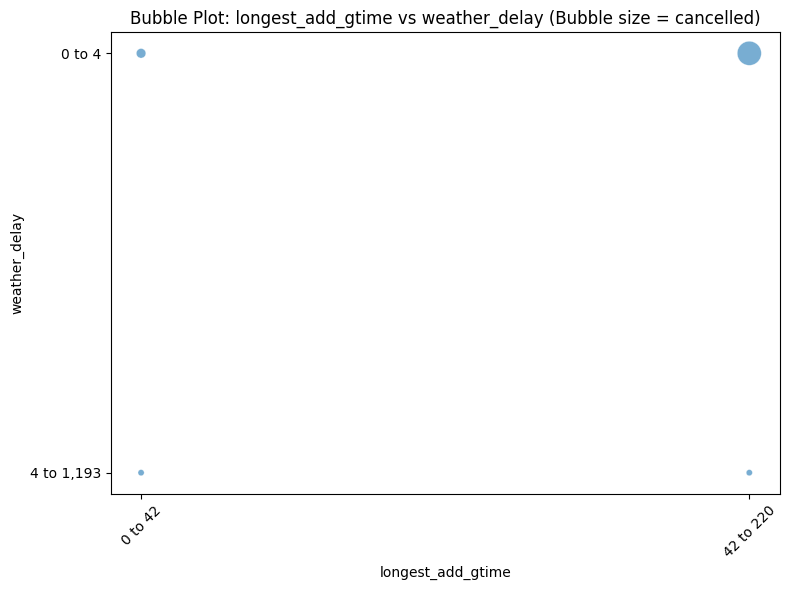

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


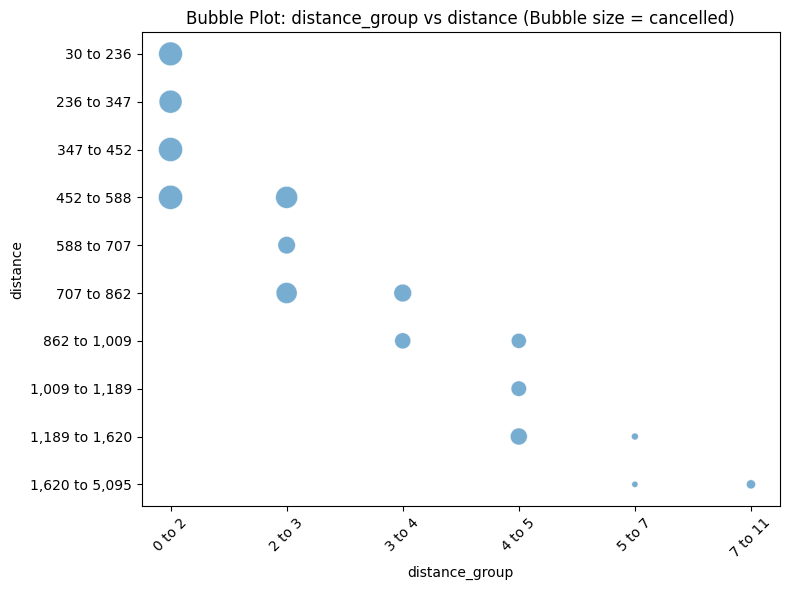

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


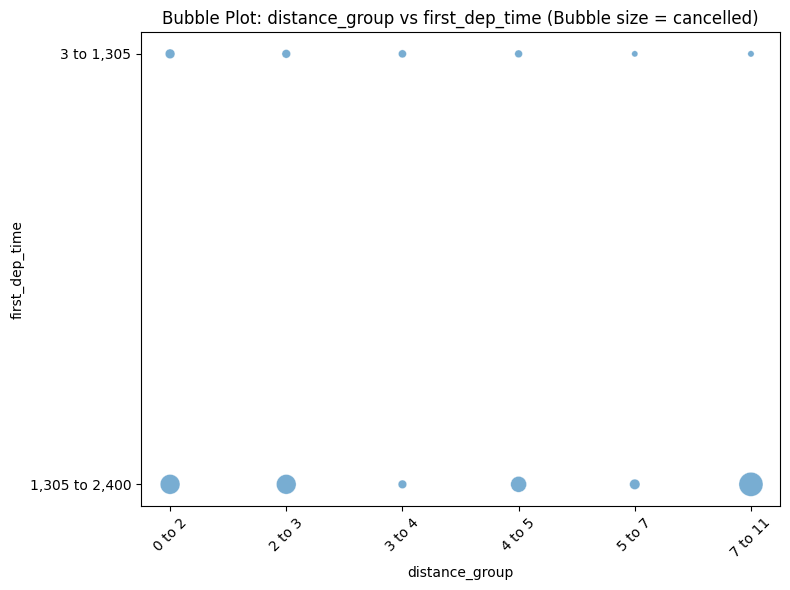

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


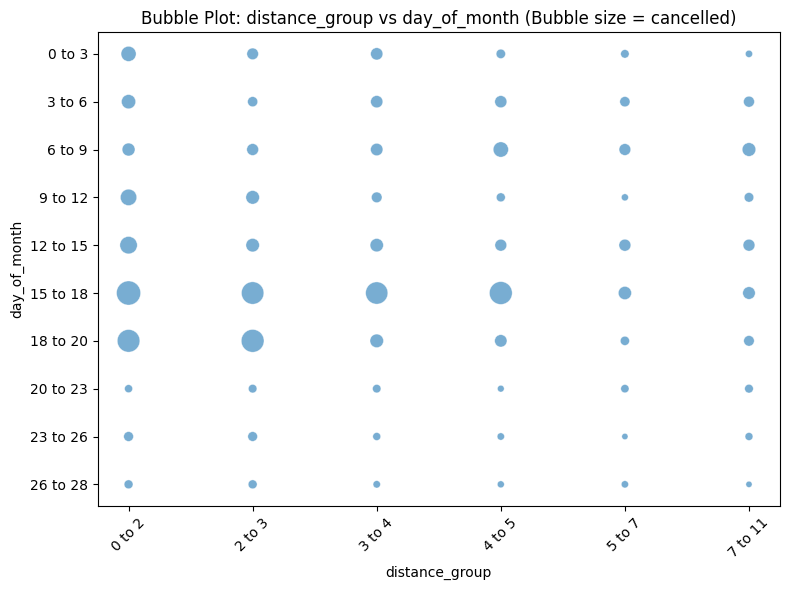

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


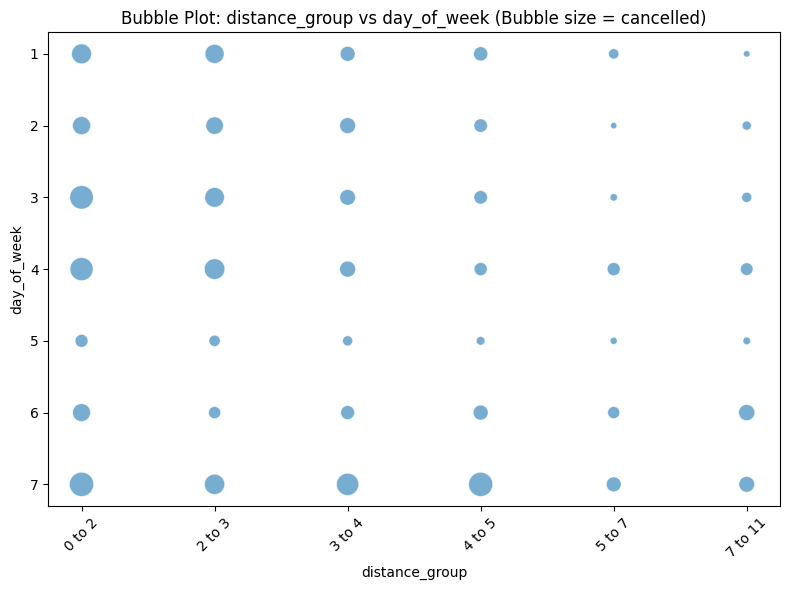

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


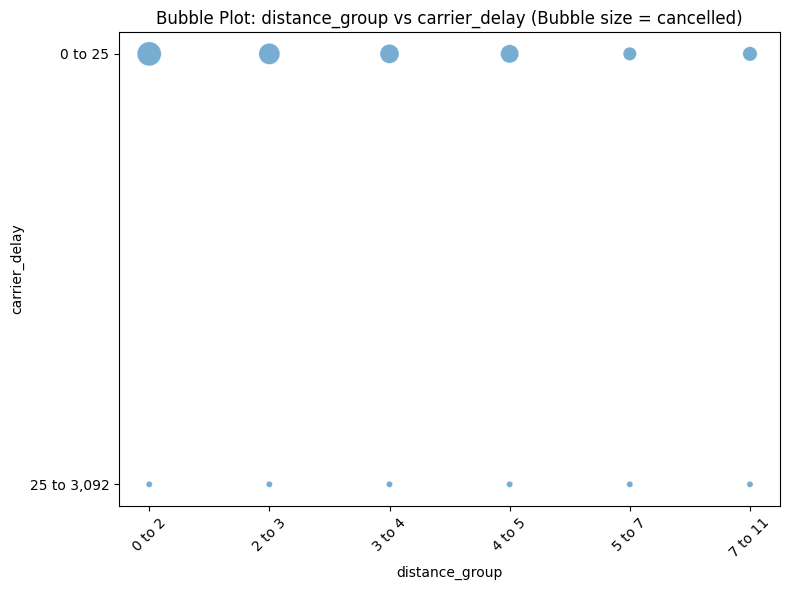

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


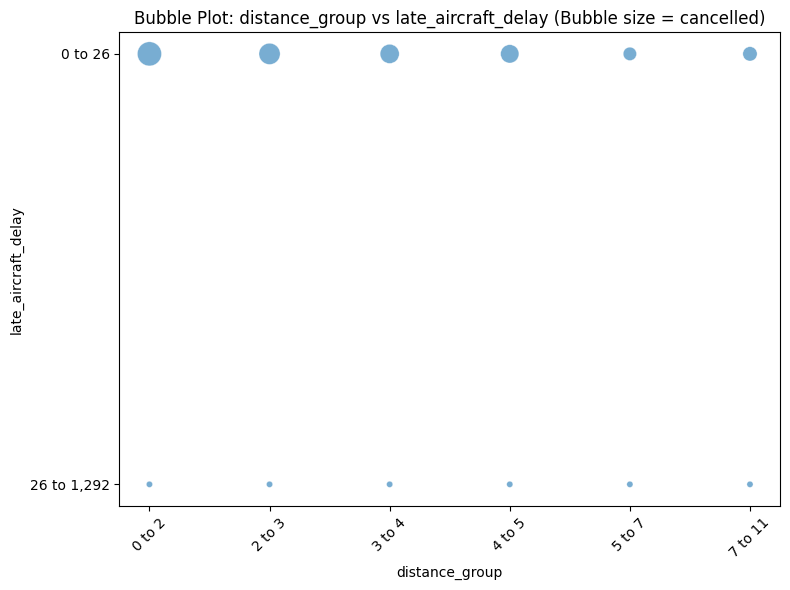

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


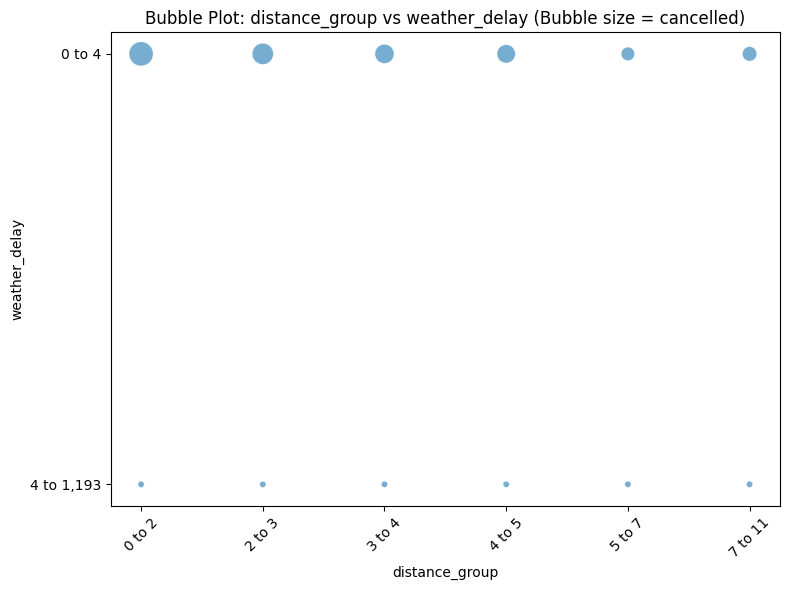

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


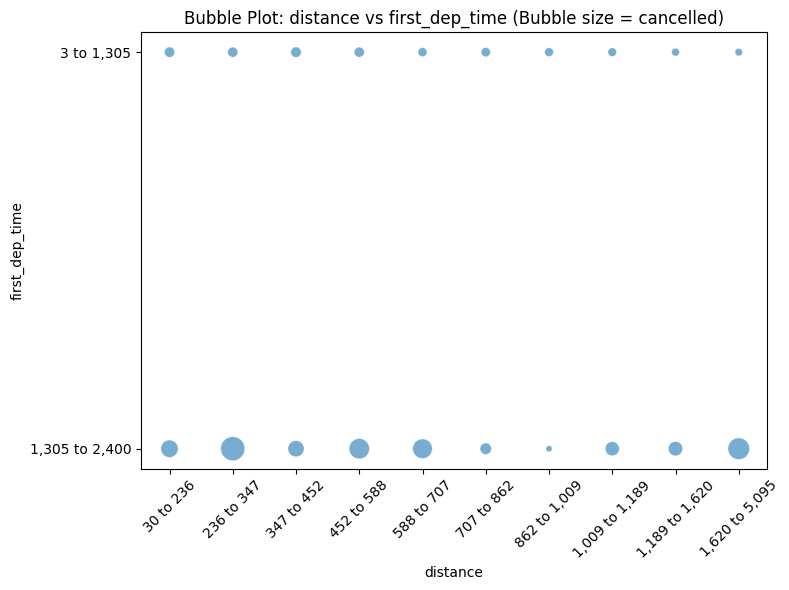

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


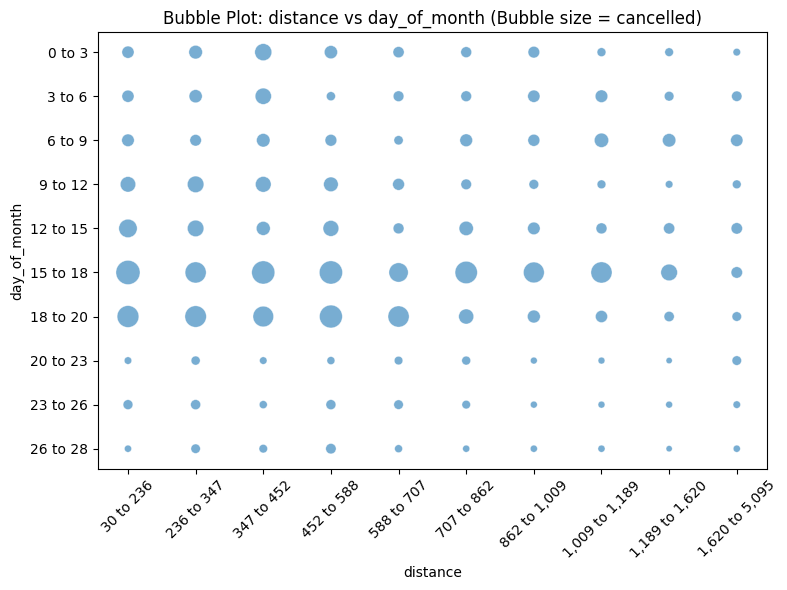

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


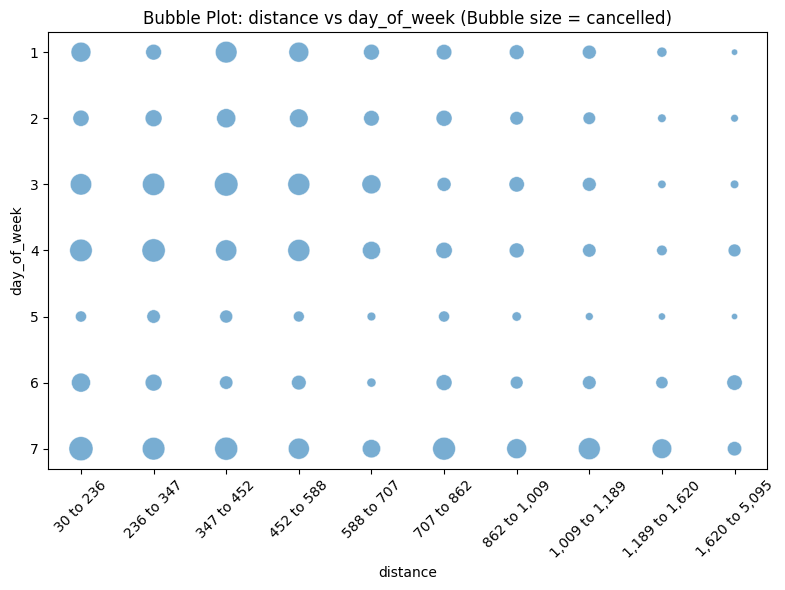

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


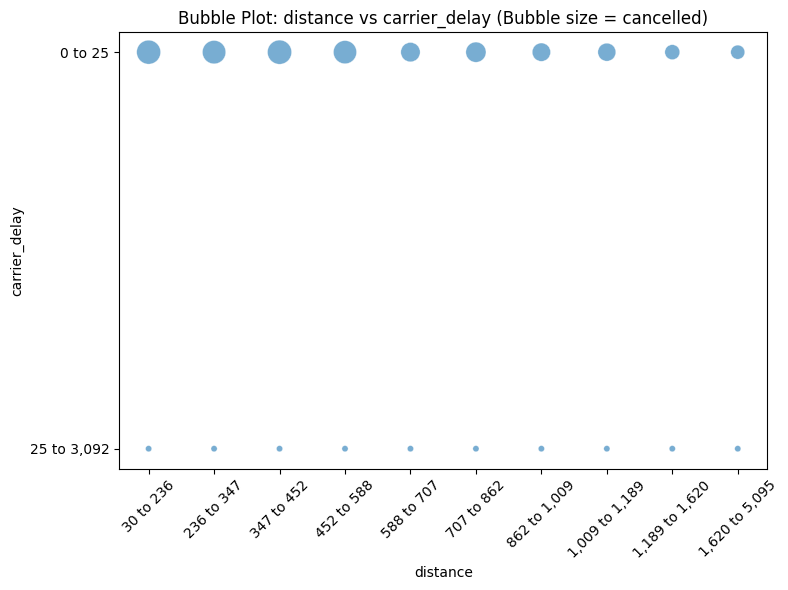

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


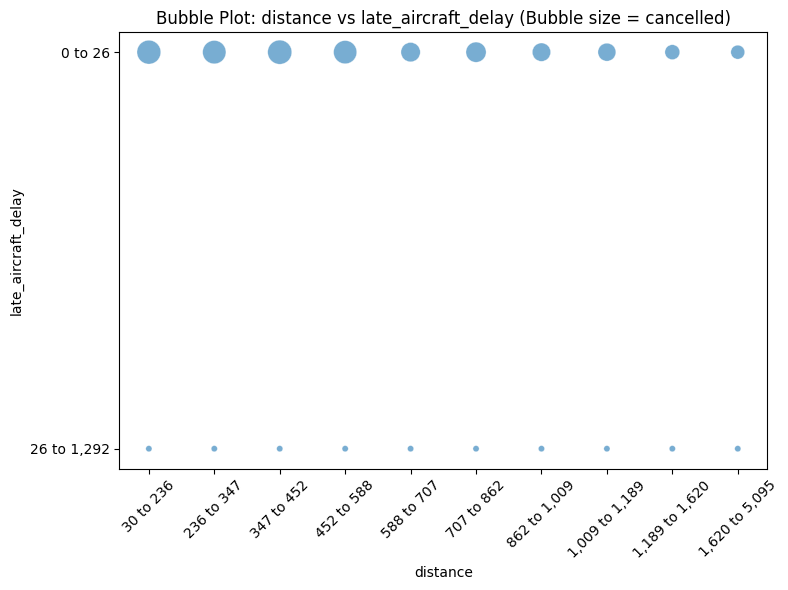

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


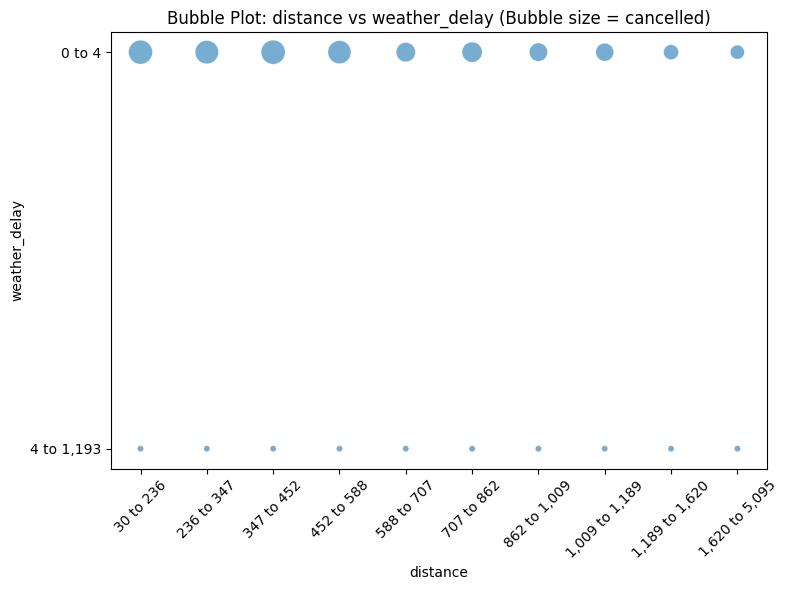

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


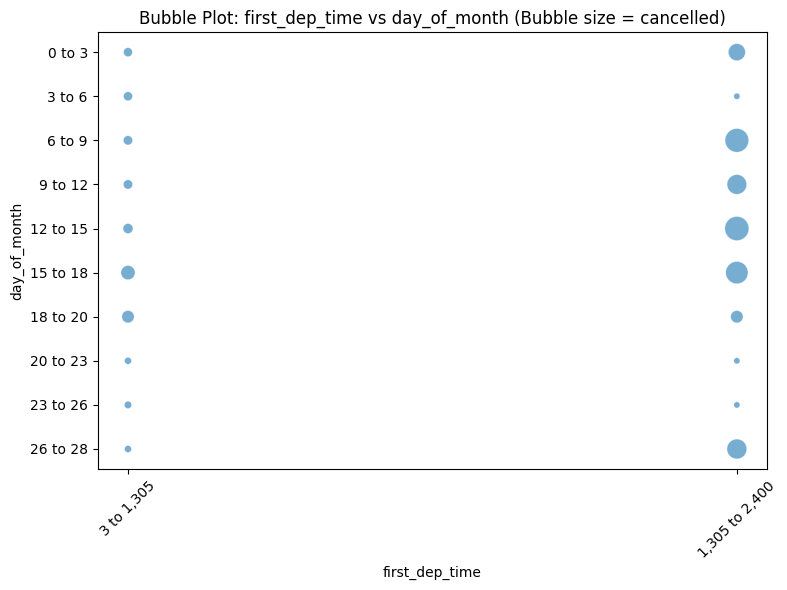

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


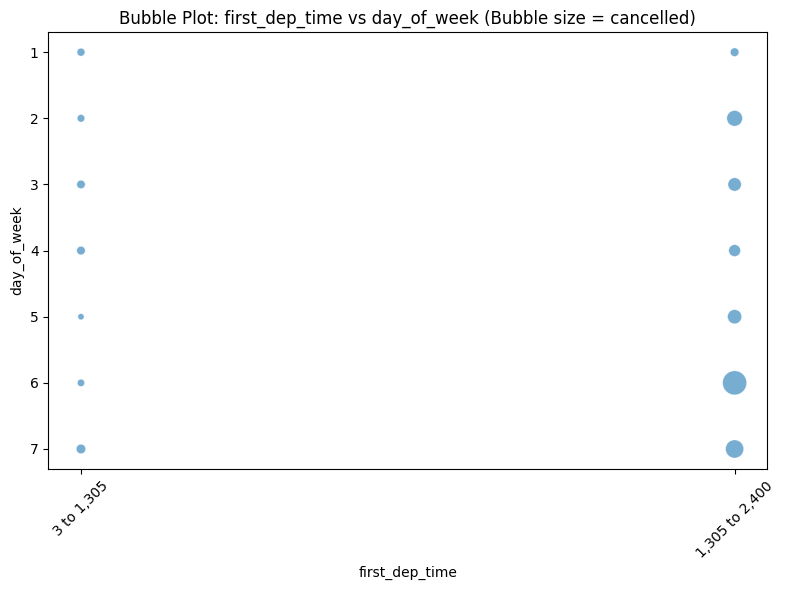

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


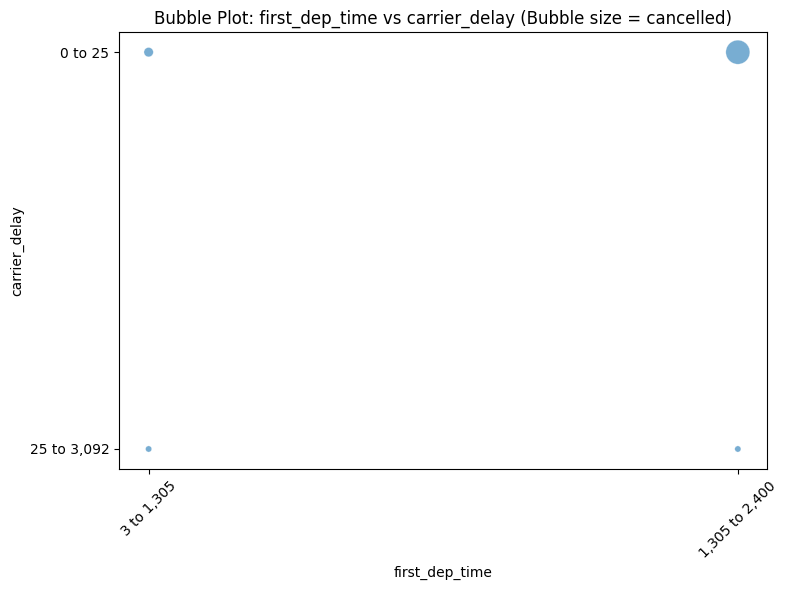

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


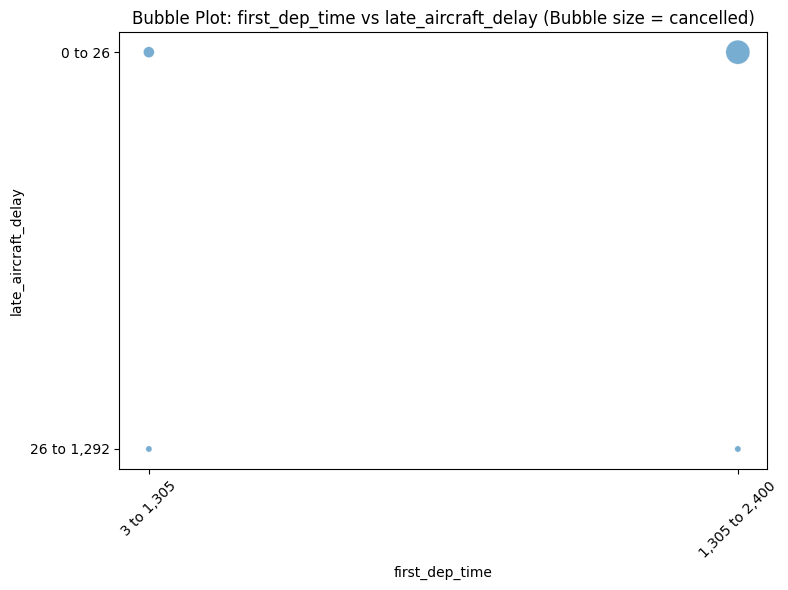

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


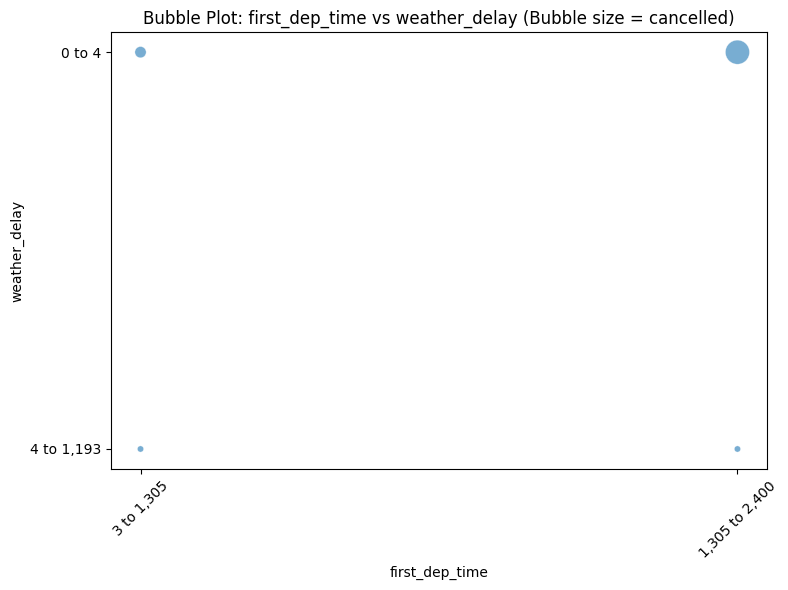

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


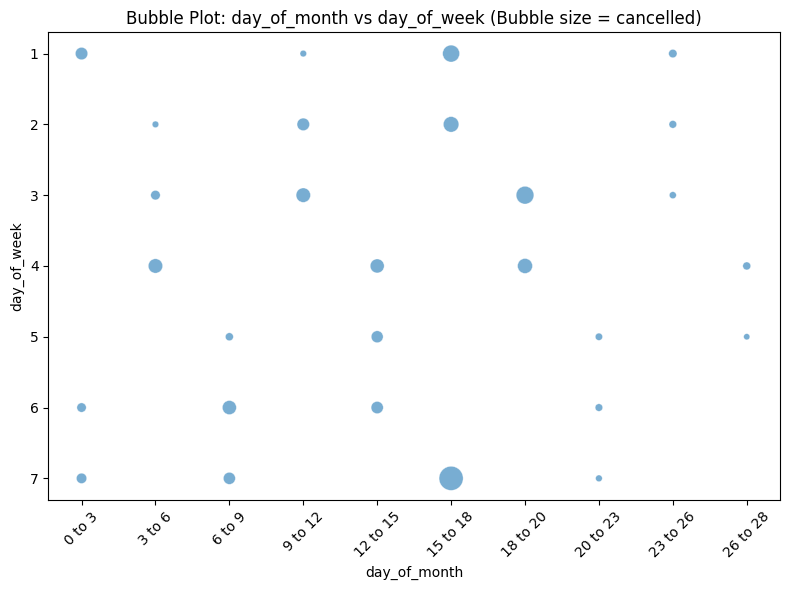

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


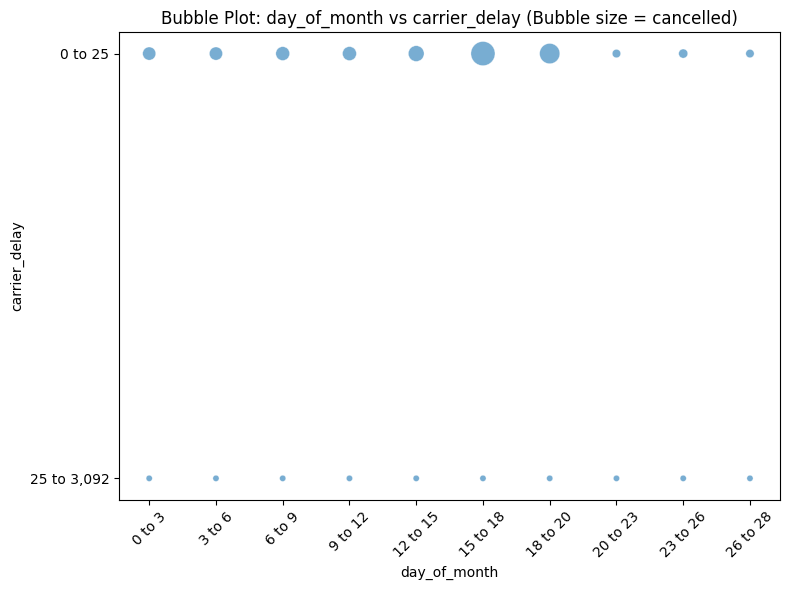

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


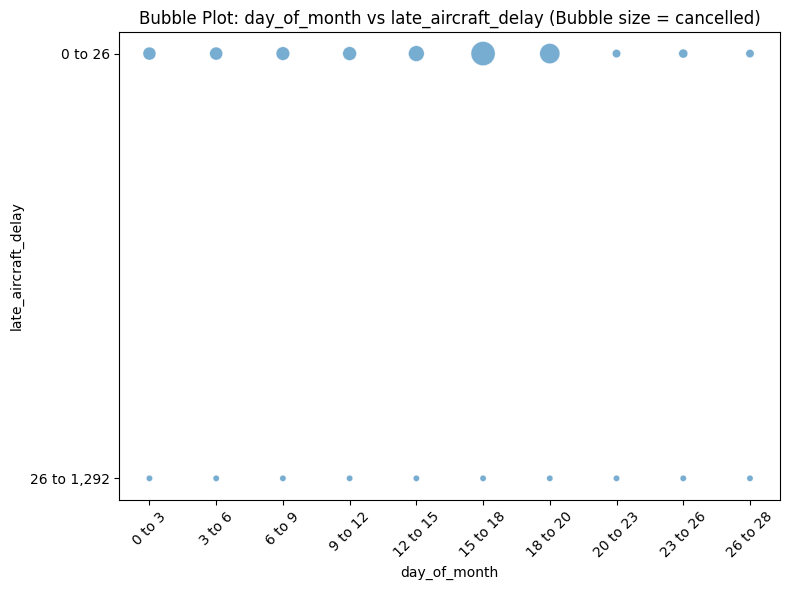

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


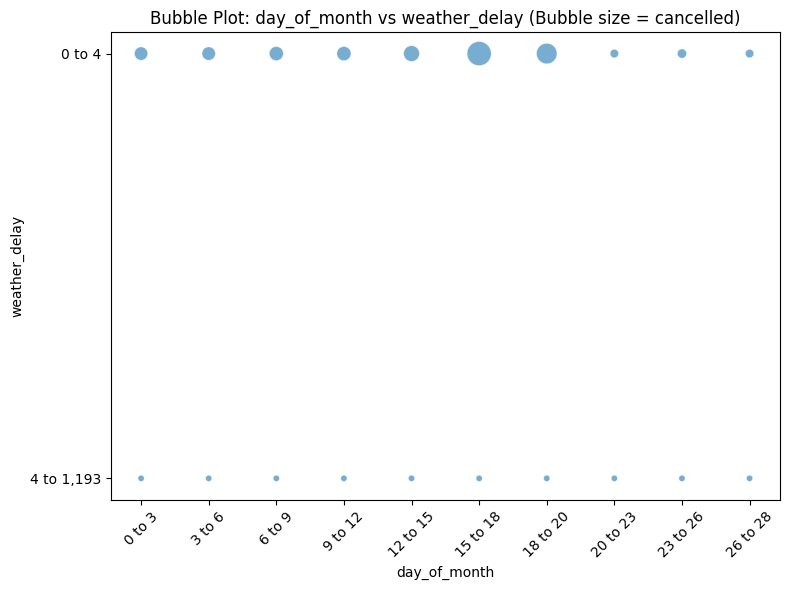

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


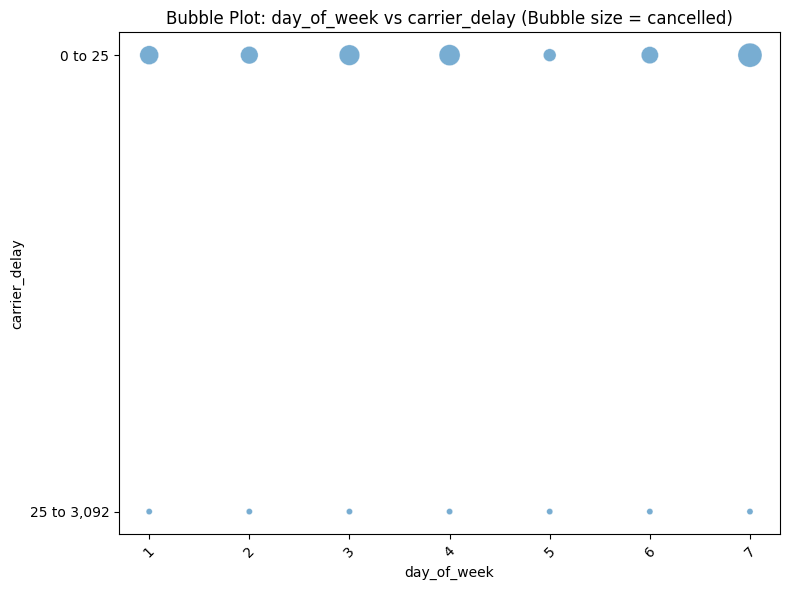

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


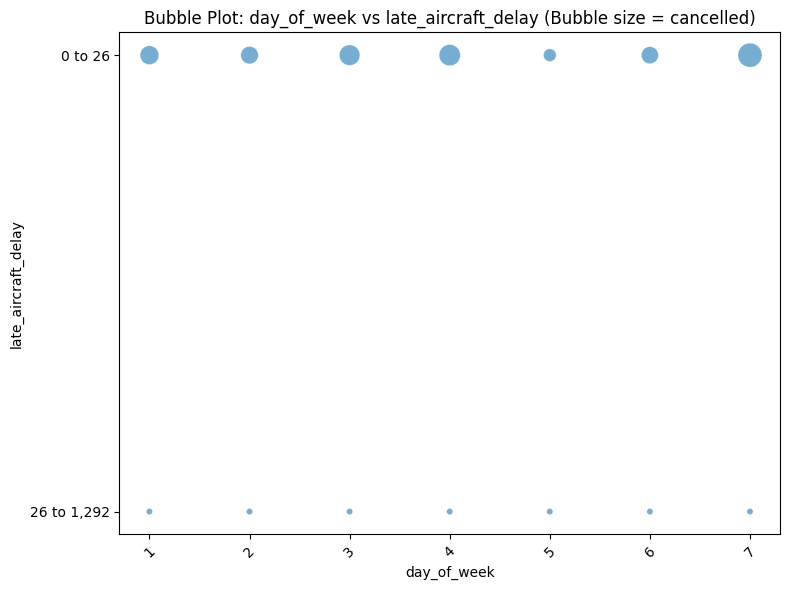

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


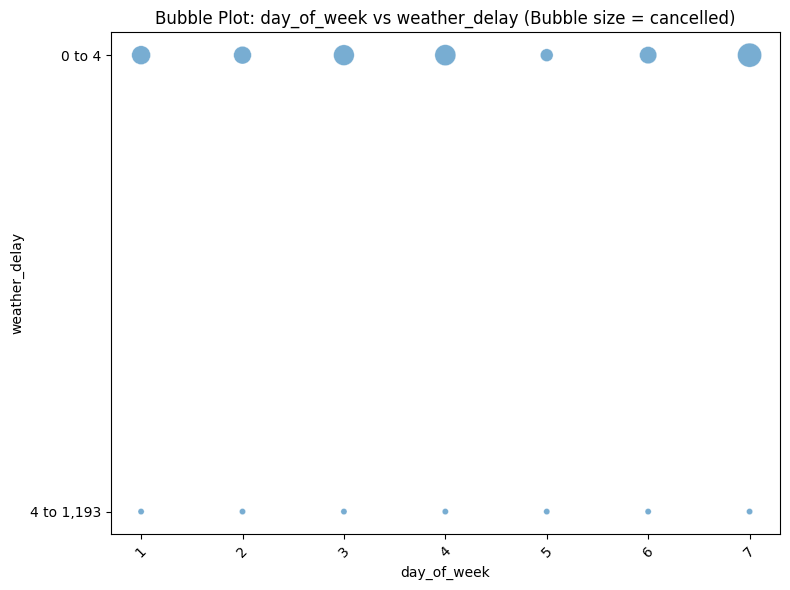

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


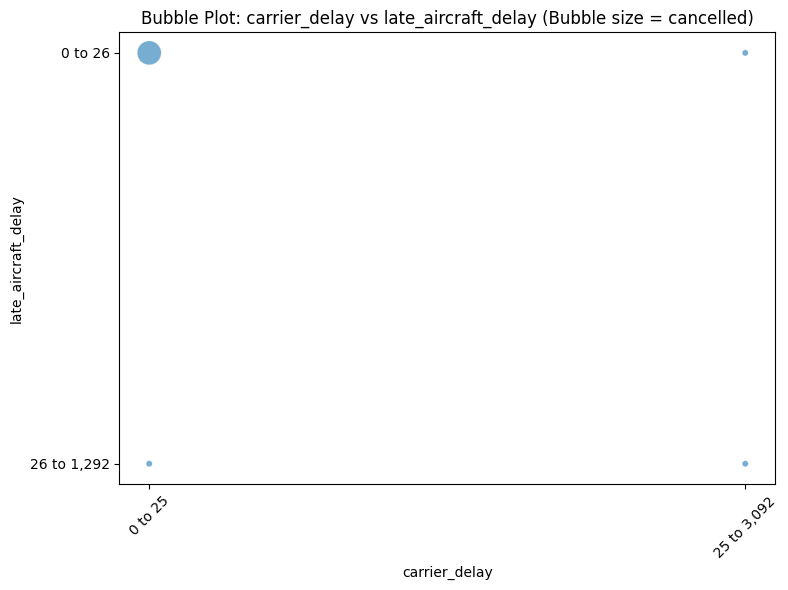

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


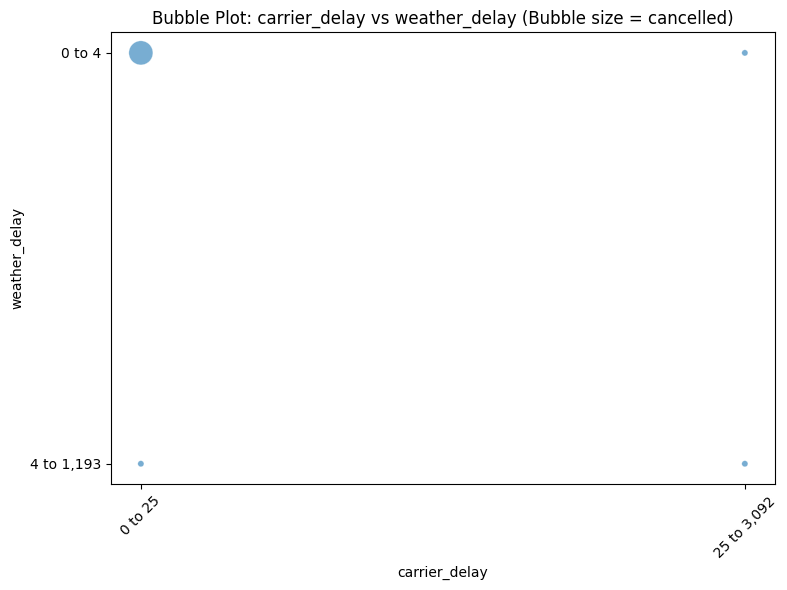

C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:130: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = temp_df.groupby(['x_binned', 'y_binned'])[target_variable].mean().reset_index()
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:160: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(x_order, rotation=45)
C:\Users\tyler.brantingham\AppData\Local\Temp\ipykernel_14932\2749043317.py:161: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(y_order)


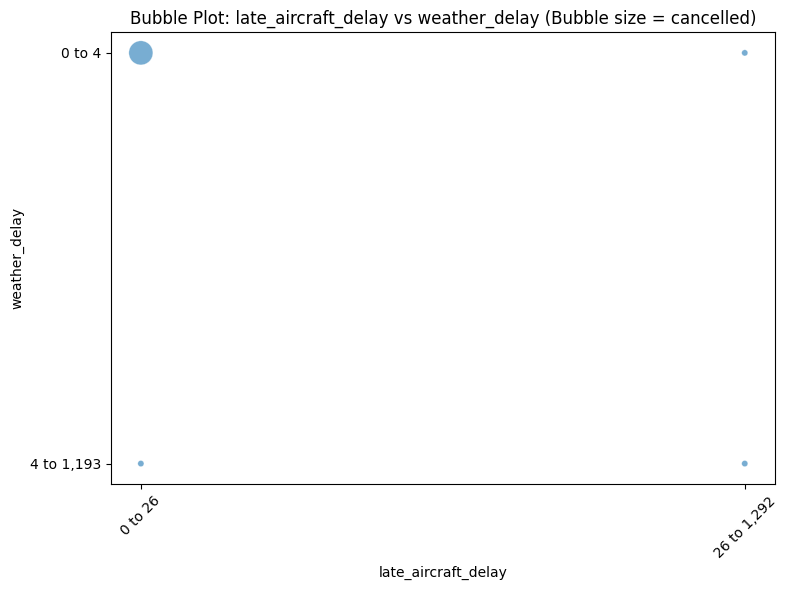

In [24]:
generate_top_binned_bubble_plots(
    df_usdot_clean,
    target_variable="cancelled",
    bin_method="quantile",  # or "uniform"
    bins=10,
    top_n=10,
    unique_threshold=10  # adjust if needed
)
